In [3]:
import os
import glob

import cv2
import numpy as np
from imgaug import augmenters as iaa
from matplotlib import pyplot as plt

In [4]:
def show_image_plt(image):
    plt.figure(figsize=(8, 8))
    if image.ndim == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image[...,::-1])
        plt.imshow(image)

    plt.xticks([])
    plt.yticks([])
    plt.show()

In [5]:
def _get_bag_patch_aug_pipeline():
    pipeline = iaa.Sequential(
        [
#             iaa.Fliplr(0.5),
#             iaa.Flipud(0.5),
            iaa.Sometimes(0.5, iaa.Affine(scale={"x": (0.8, 1.0), "y": (0.8, 1.2)}, fit_output=True)),
            iaa.Sometimes(0.5, iaa.PiecewiseAffine(scale=0.01)),
            iaa.Sometimes(0.8, iaa.OneOf([
                iaa.Affine(rotate=180, fit_output=True),
                iaa.Affine(rotate=(-20, 20), fit_output=True)
                ])),
            iaa.Sometimes(0.35, iaa.Emboss(alpha=(0.0, 1.0), strength=(0.1, 1.))),
            iaa.Sometimes(0.2, iaa.AverageBlur(k=(2, 9))),
            iaa.Sometimes(0.5, iaa.Add((-30, 50), per_channel=True)),
            iaa.Sometimes(0.5, iaa.Add((-10, 10), per_channel=False)),
            iaa.Sometimes(0.99, iaa.Grayscale())

        ])
    return pipeline

In [24]:
img_path = '/home/inna/datasets/forgotten_items/synthesis_props/transparent/grozi_373.png'

In [25]:
image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

In [26]:
image.shape

(315, 420, 4)

In [55]:
base_path = '/home/inna/datasets/forgotten_items/grozi_png/'

In [56]:
base_path_new = '/home/inna/datasets/forgotten_items/grozi_png_edit/'

In [53]:
def _cut_empty_transparent_border(image: np.array) -> np.array:
    assert image.ndim == 3 and image.shape[-1] == 4
    non_zero_alpha = np.argwhere(image[:, :, 3] != 0)
    try:
        ymin, xmin = non_zero_alpha.min(axis=0)
        ymax, xmax = non_zero_alpha.max(axis=0)
        image = image[ymin:ymax + 1, xmin:xmax + 1, :]
    except Exception as e:
        # Some small images becomes fully transparent after aug
        pass
    return image

/home/inna/datasets/forgotten_items/grozi_png/grozi_377.png


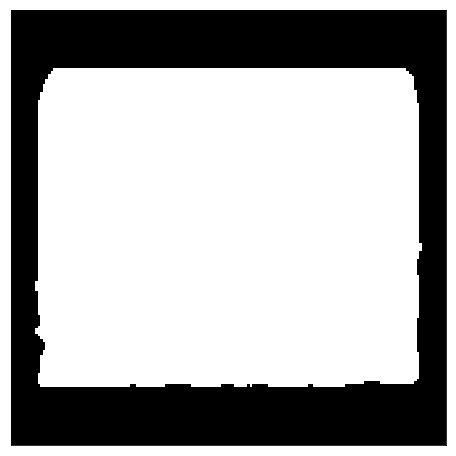

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_377.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_289.png


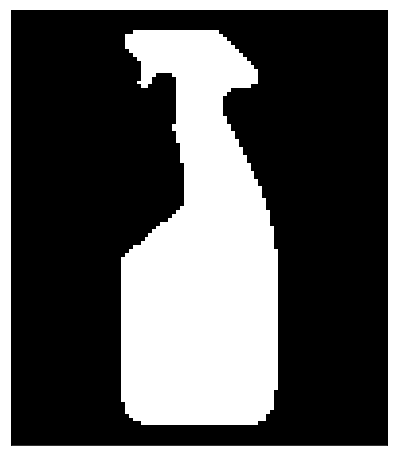

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_289.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_380.png


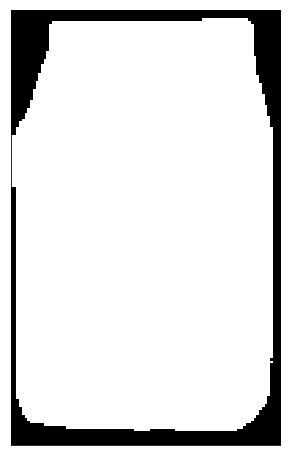

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_380.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_369.png


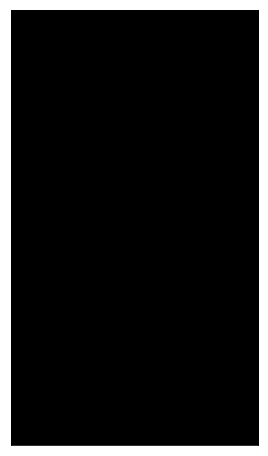

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_369.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_461.png


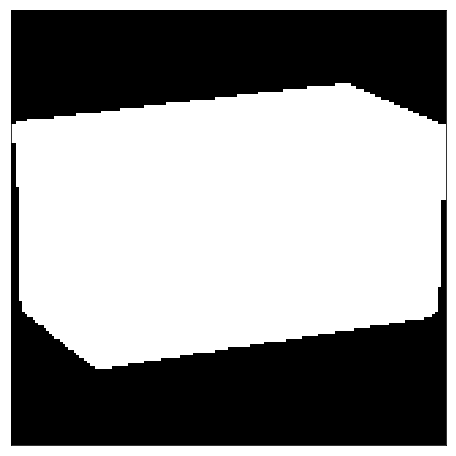

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_461.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_096.png


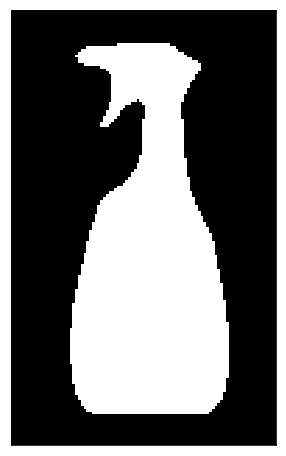

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_096.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_463.png


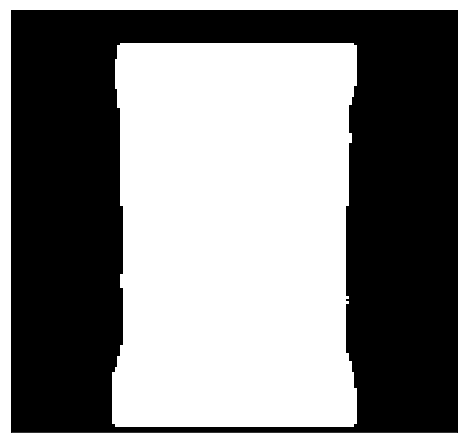

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_463.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_113.png


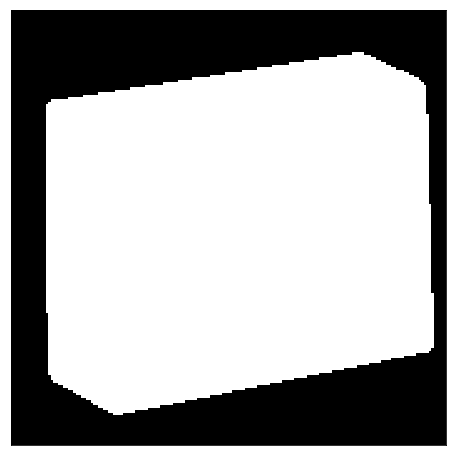

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_113.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_272.png


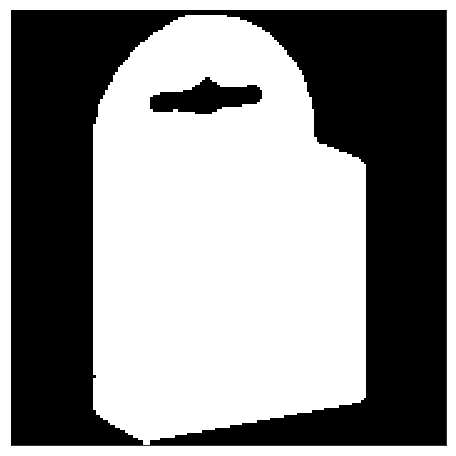

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_272.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_435.png


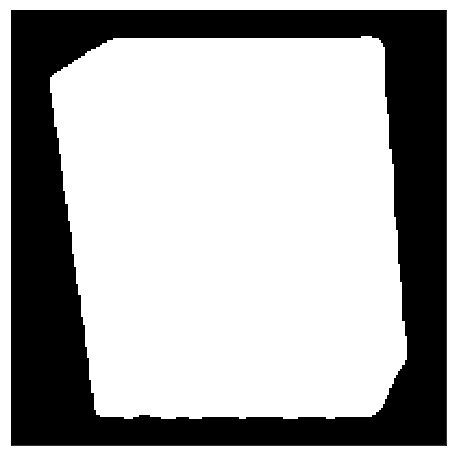

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_435.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_268.png


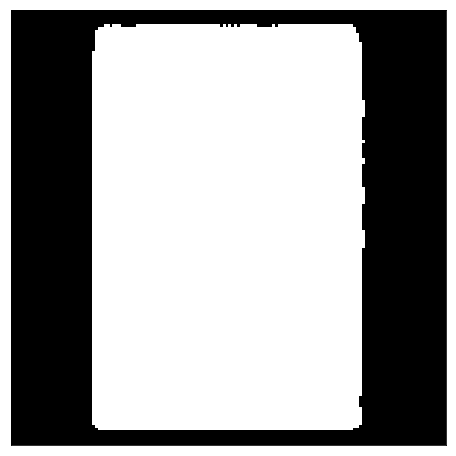

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_268.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_263.png


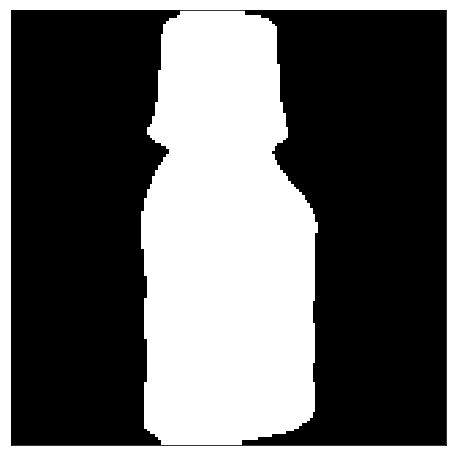

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_263.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_254.png


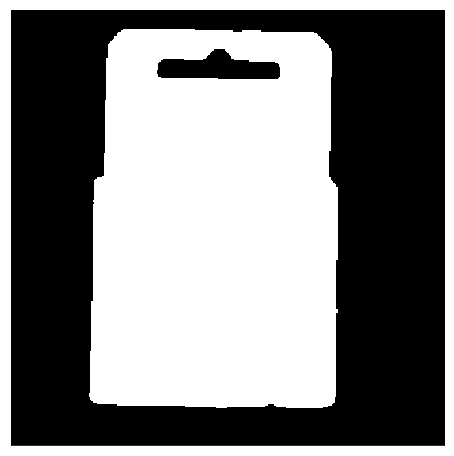

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_254.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_172.png


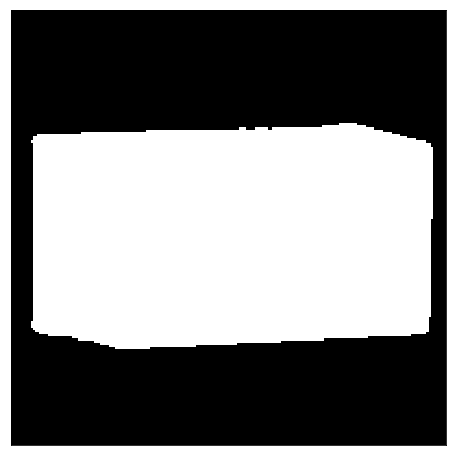

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_172.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_044.png


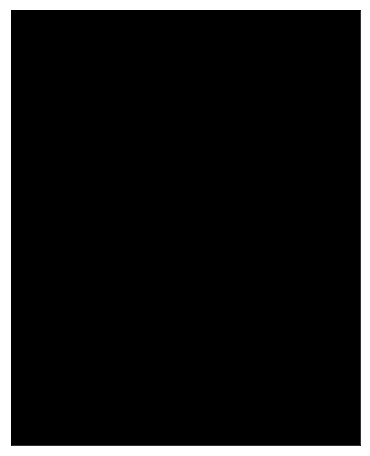

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_044.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_045.png


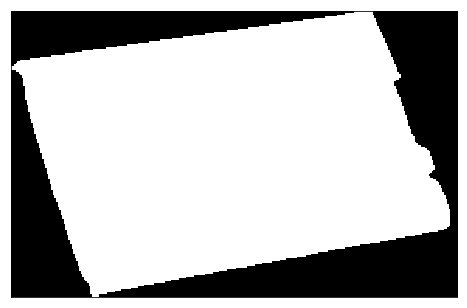

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_045.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_274.png


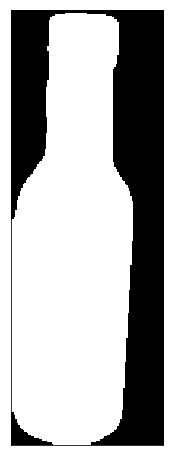

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_274.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_366.png


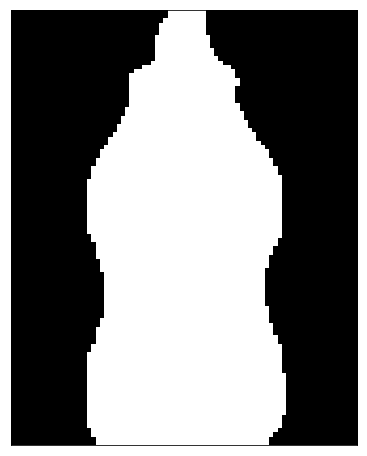

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_366.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_114.png


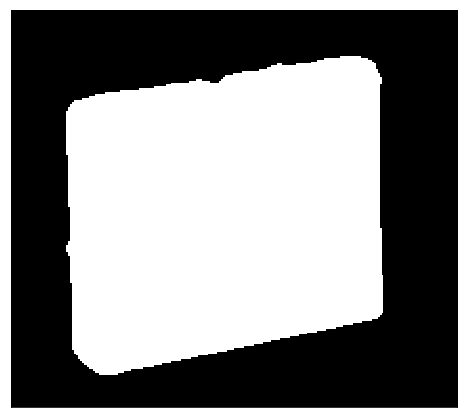

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_114.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_023.png


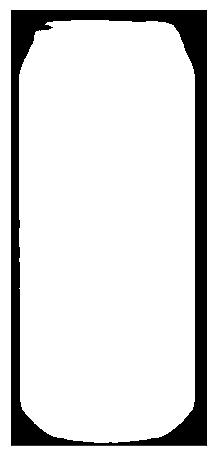

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_023.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_106.png


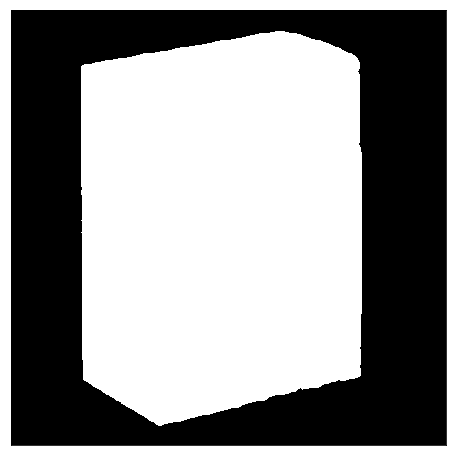

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_106.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_187.png


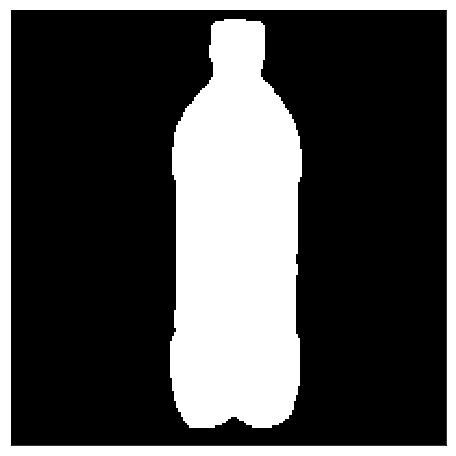

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_187.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_061.png


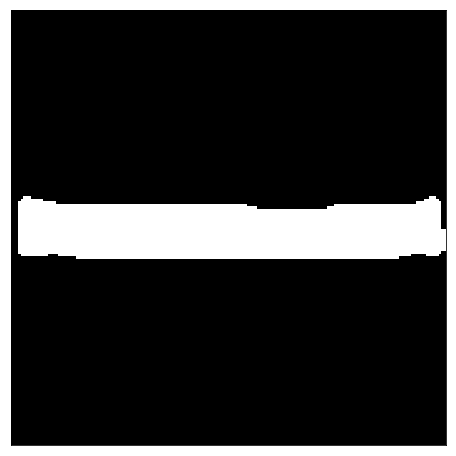

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_061.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_247.png


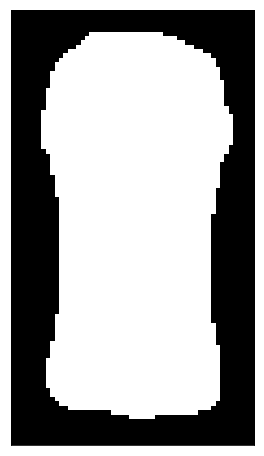

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_247.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_392.png


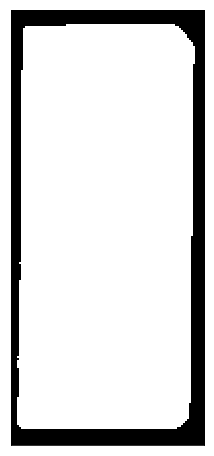

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_392.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_073.png


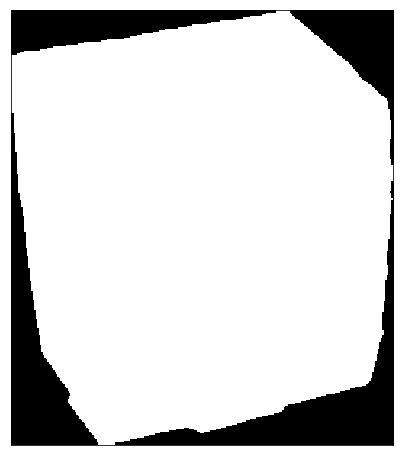

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_073.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_436.png


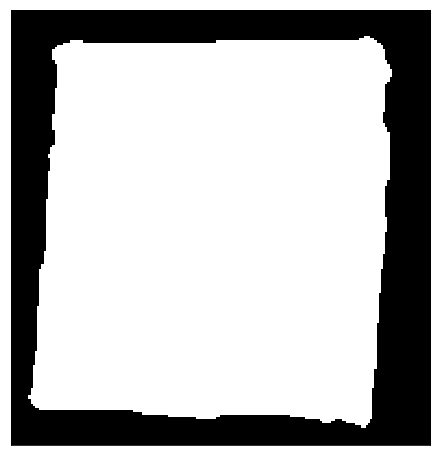

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_436.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_223.png


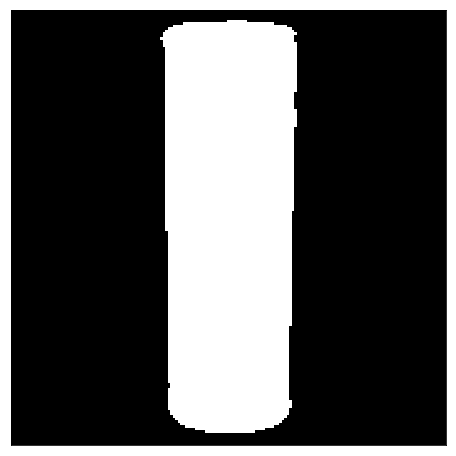

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_223.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_026.png


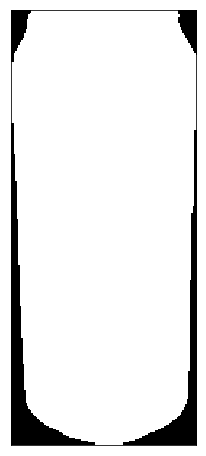

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_026.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_367.png


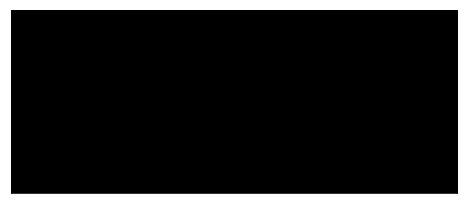

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_367.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_472.png


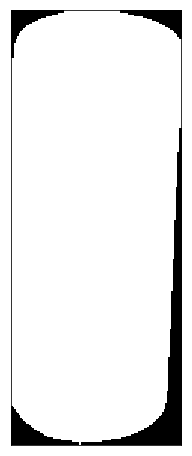

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_472.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_147.png


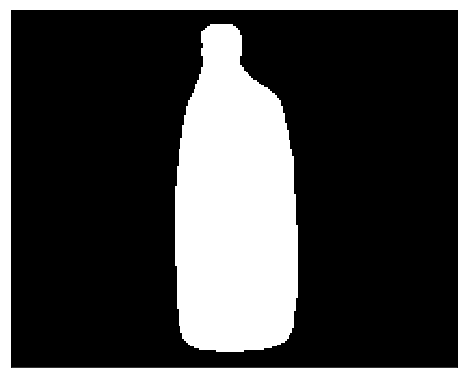

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_147.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_343.png


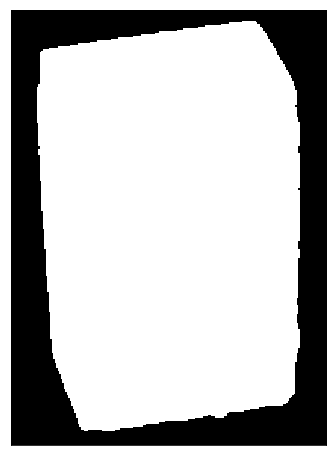

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_343.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_398.png


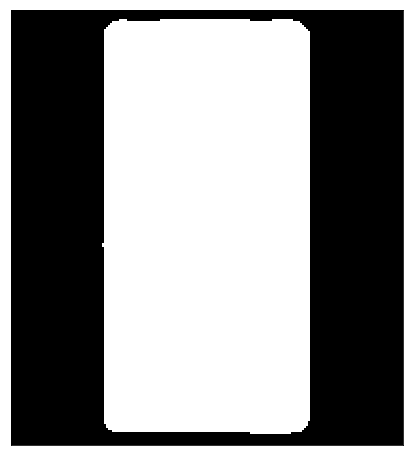

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_398.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_035.png


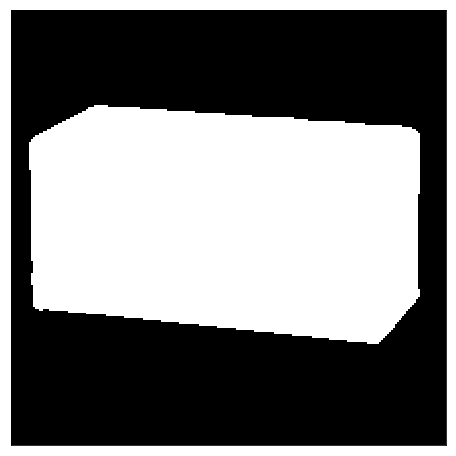

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_035.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_085.png


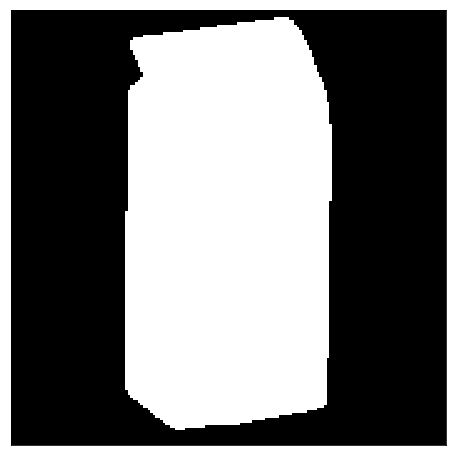

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_085.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_364.png


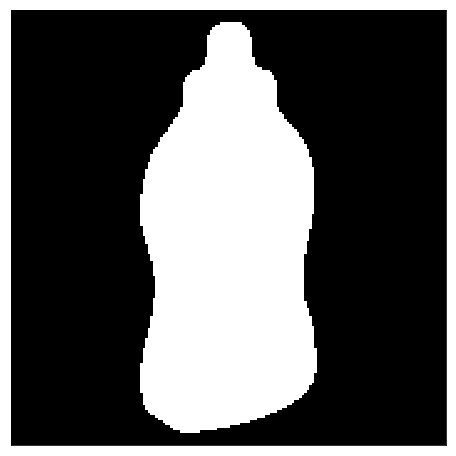

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_364.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_183.png


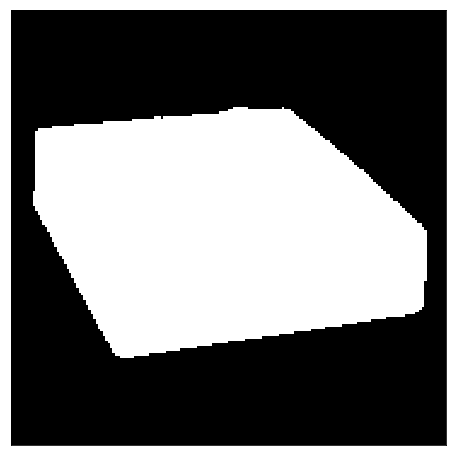

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_183.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_050.png


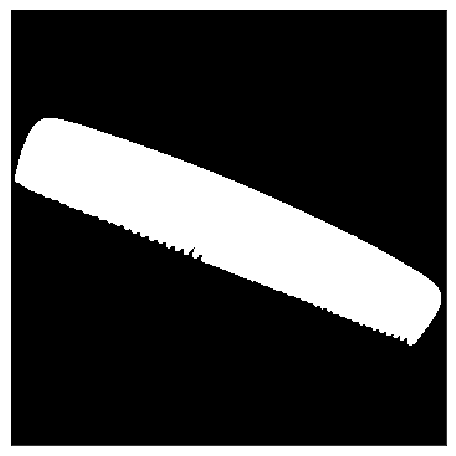

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_050.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_154.png


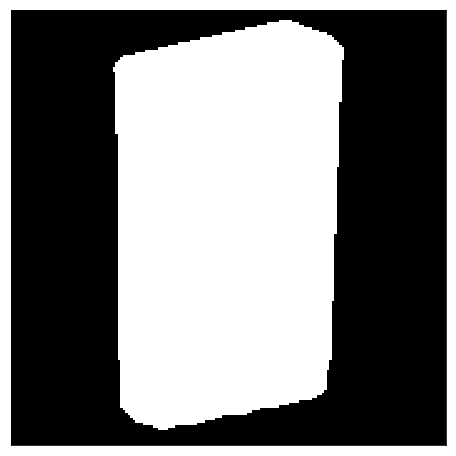

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_154.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_265.png


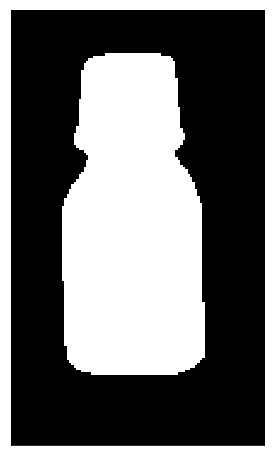

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_265.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_209.png


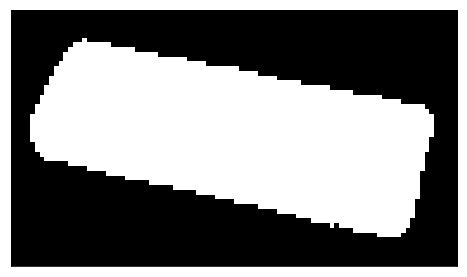

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_209.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_134.png


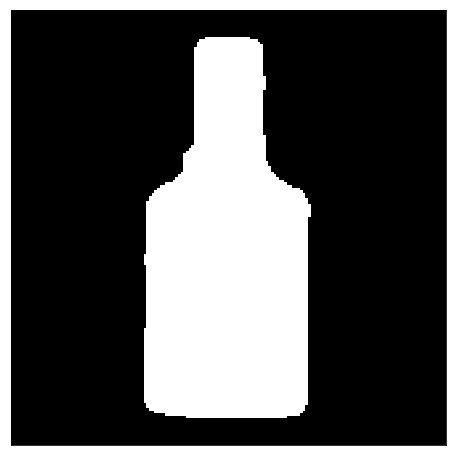

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_134.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_244.png


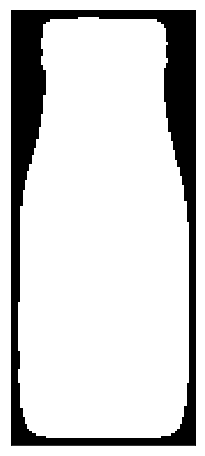

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_244.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_168.png


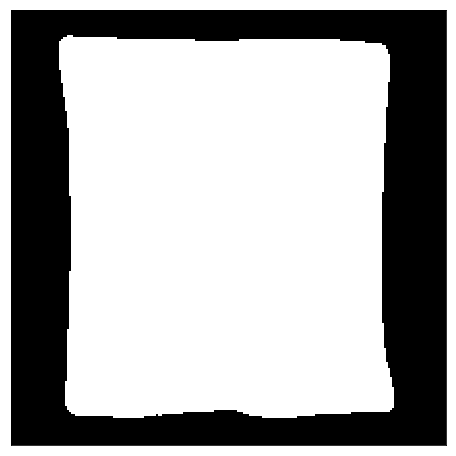

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_168.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_094.png


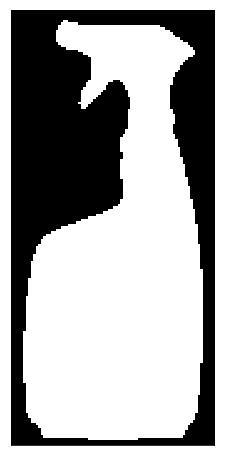

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_094.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_267.png


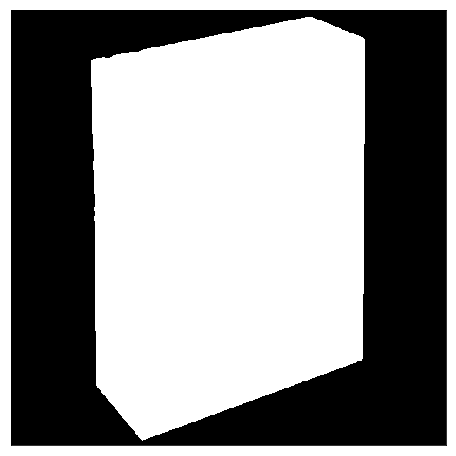

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_267.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_409.png


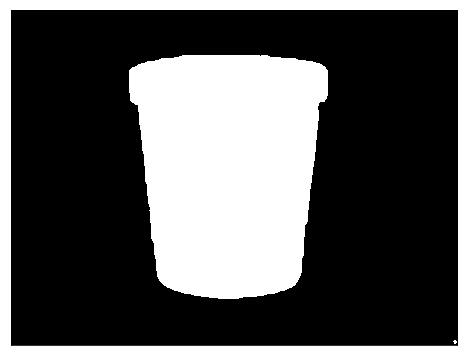

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_409.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_176.png


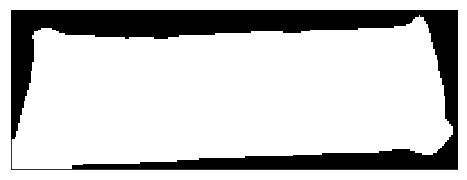

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_176.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_258.png


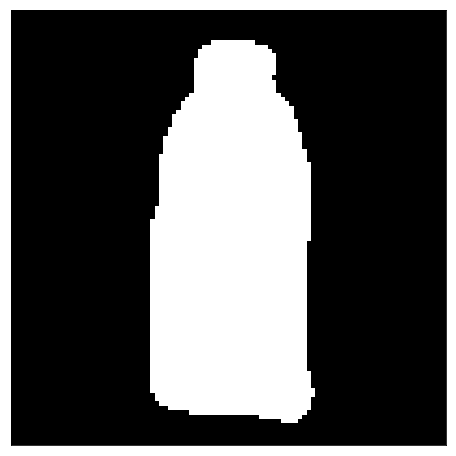

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_258.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_433.png


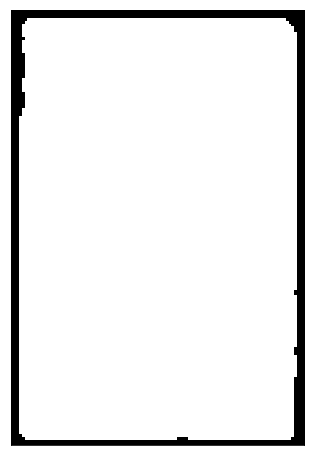

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_433.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_467.png


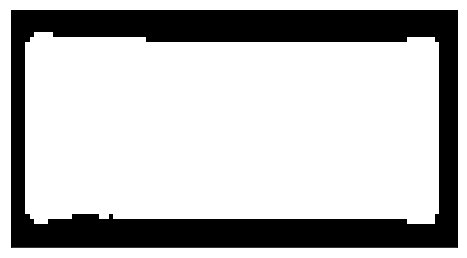

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_467.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_262.png


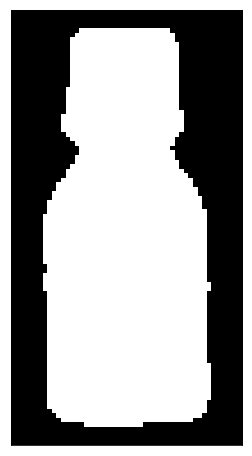

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_262.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_326.png


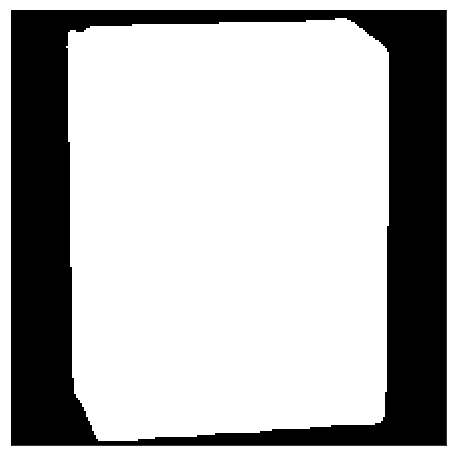

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_326.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_231.png


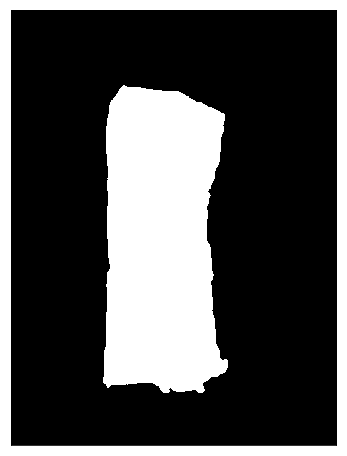

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_231.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_323.png


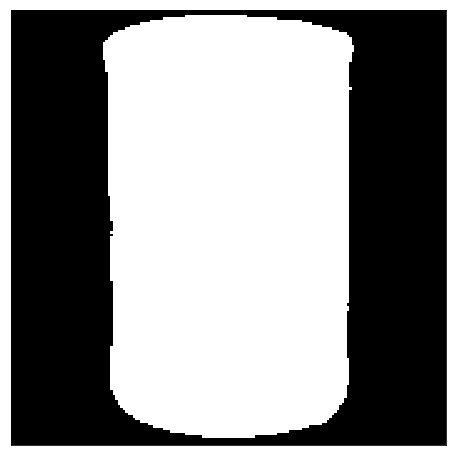

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_323.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_059.png


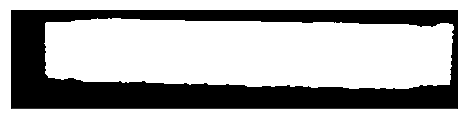

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_059.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_319.png


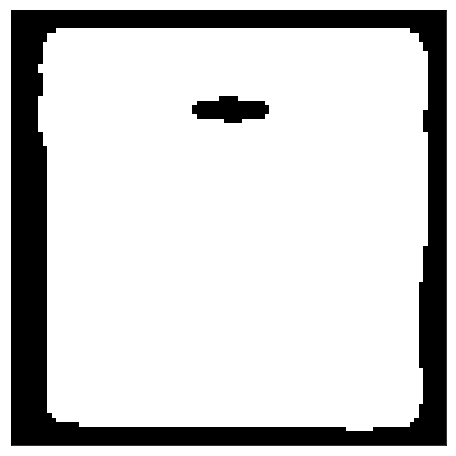

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_319.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_304.png


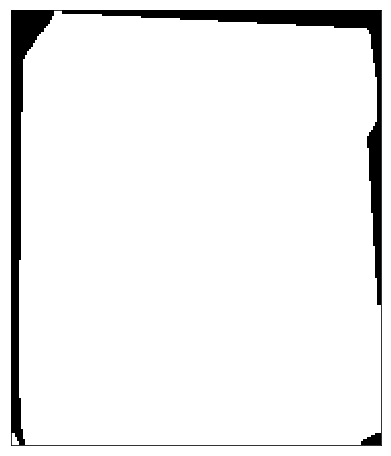

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_304.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_322.png


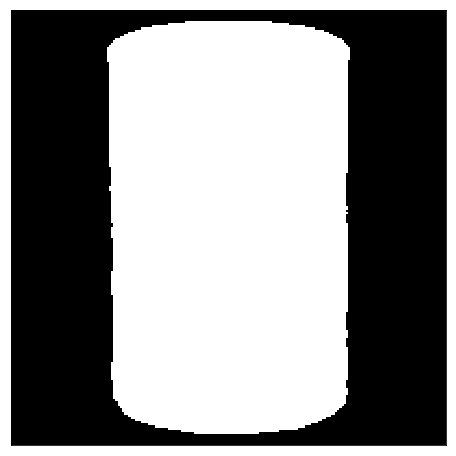

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_322.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_393.png


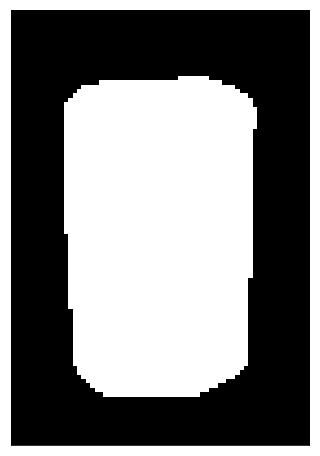

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_393.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_033.png


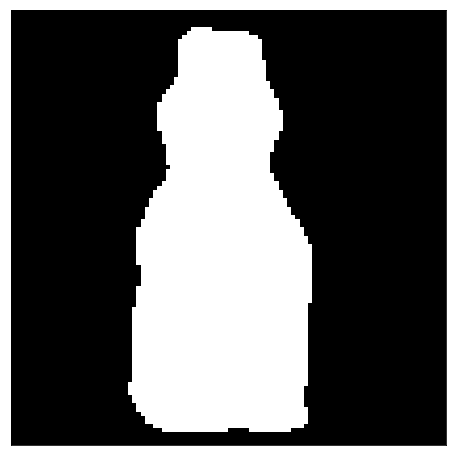

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_033.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_226.png


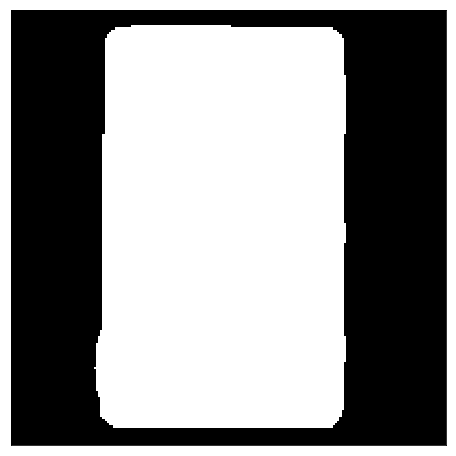

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_226.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_132.png


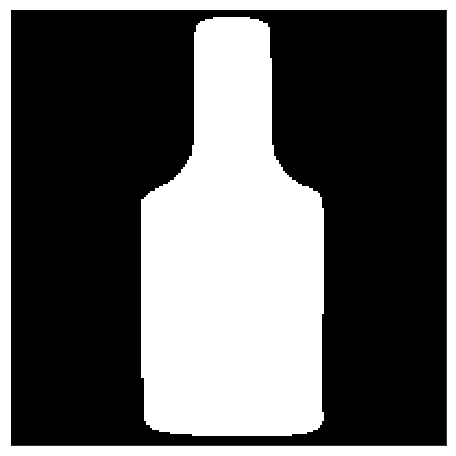

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_132.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_318.png


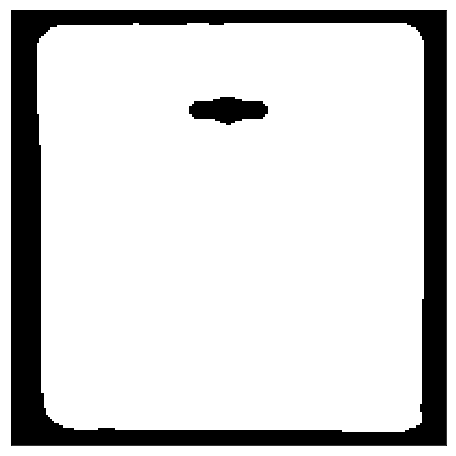

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_318.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_218.png


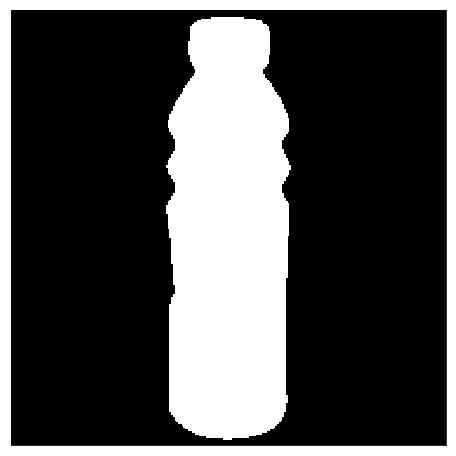

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_218.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_446.png


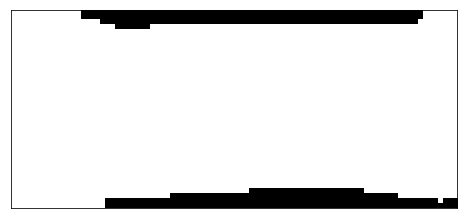

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_446.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_053.png


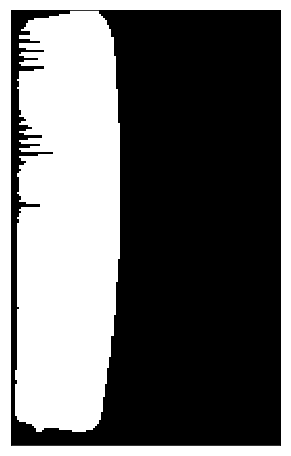

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_053.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_344.png


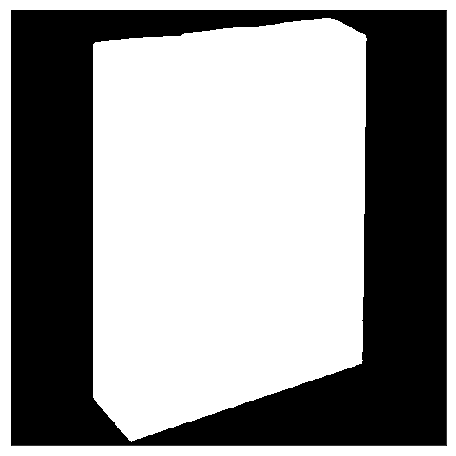

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_344.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_374.png


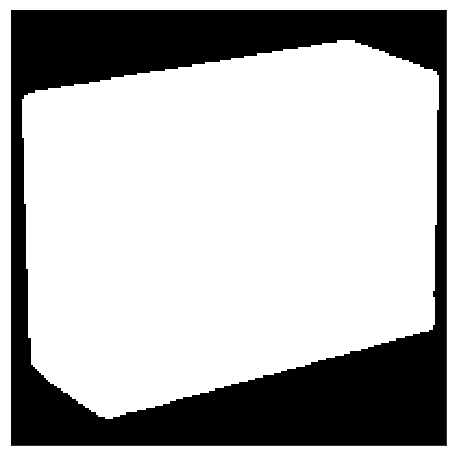

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_374.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_400.png


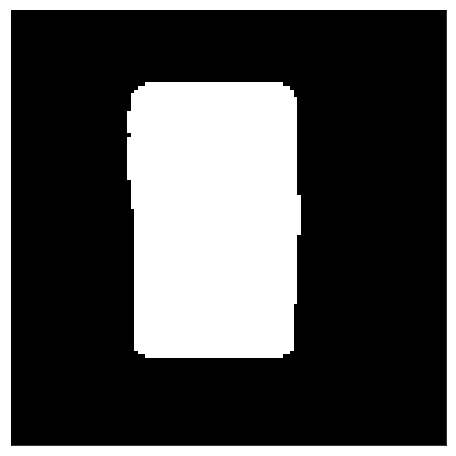

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_400.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_455.png


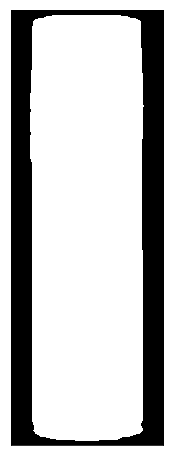

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_455.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_198.png


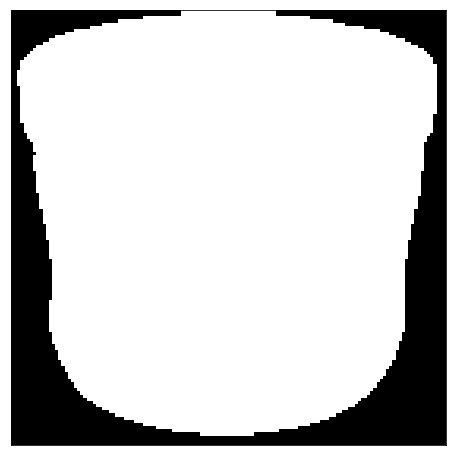

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_198.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_312.png


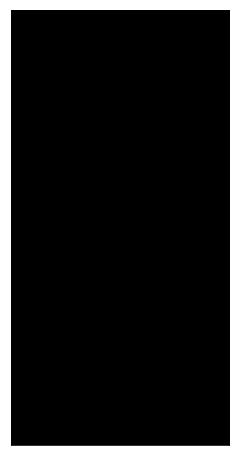

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_312.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_194.png


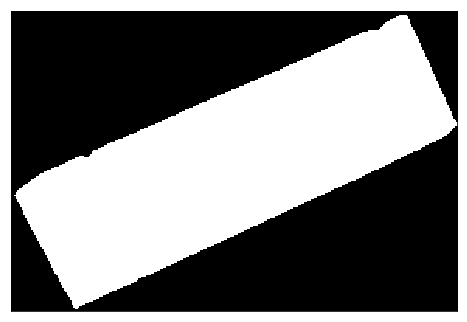

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_194.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_442.png


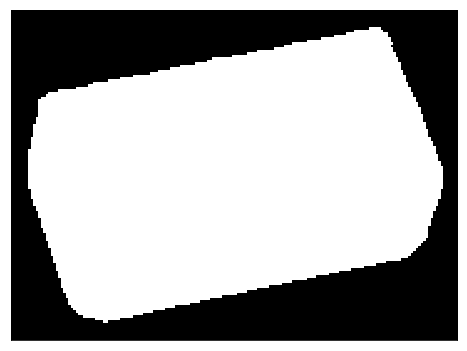

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_442.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_115.png


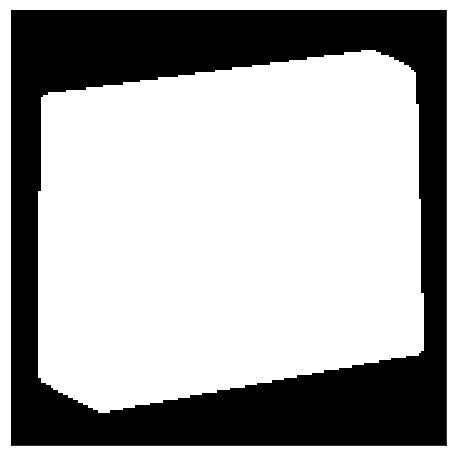

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_115.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_126.png


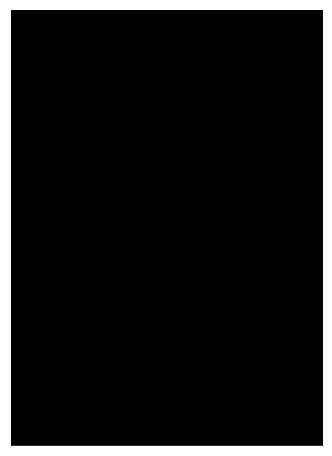

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_126.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_464.png


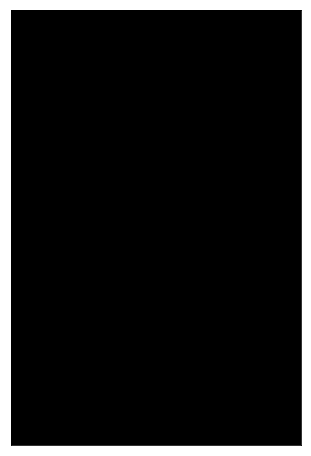

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_464.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_264.png


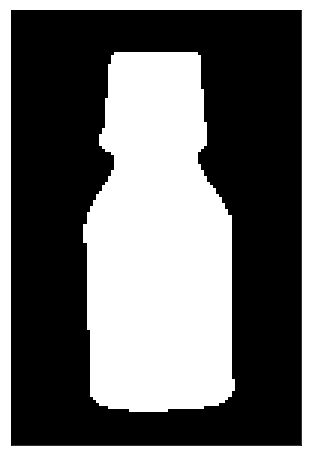

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_264.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_384.png


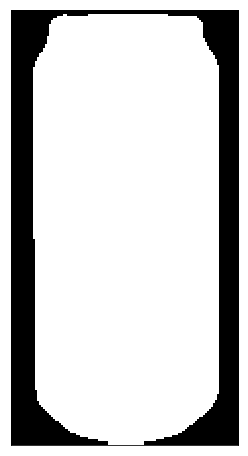

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_384.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_057.png


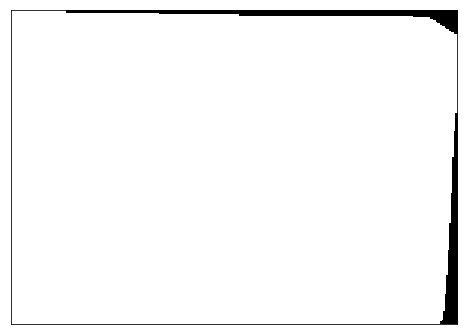

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_057.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_331.png


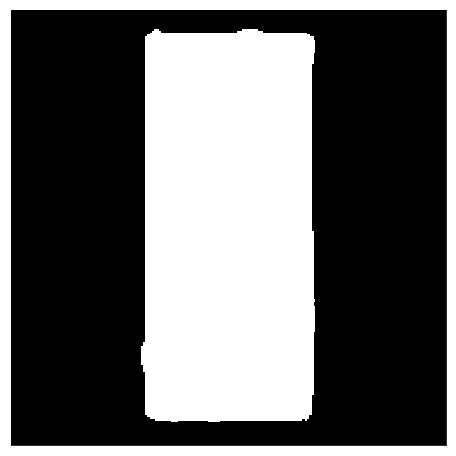

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_331.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_046.png


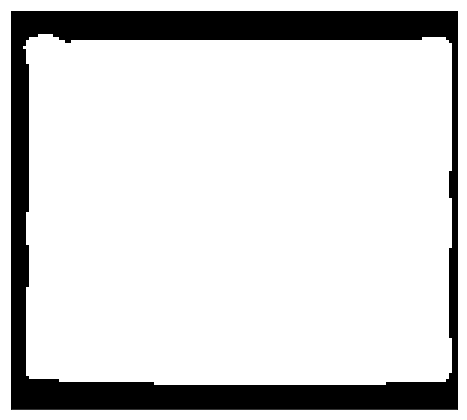

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_046.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_178.png


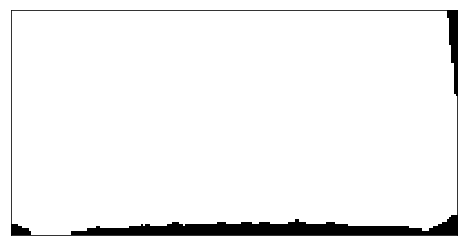

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_178.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_277.png


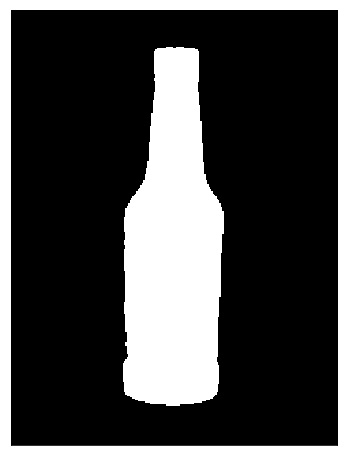

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_277.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_248.png


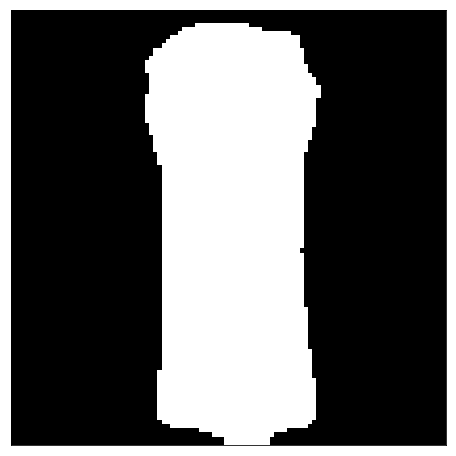

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_248.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_457.png


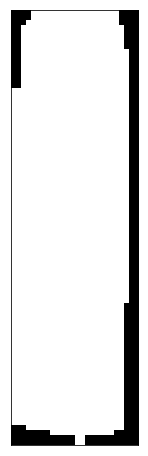

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_457.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_049.png


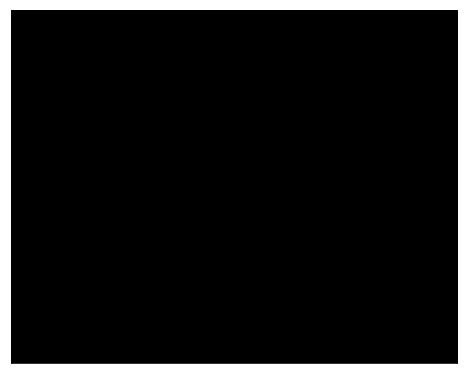

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_049.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_381.png


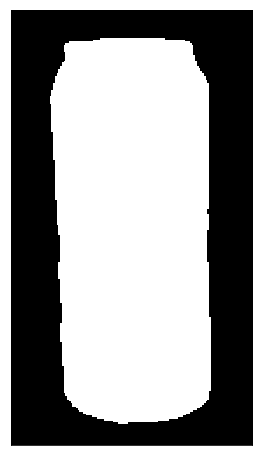

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_381.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_079.png


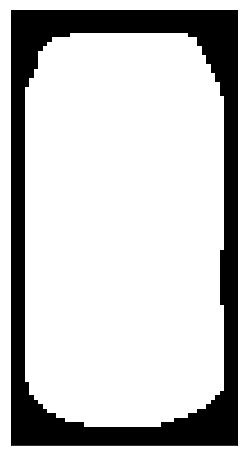

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_079.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_370.png


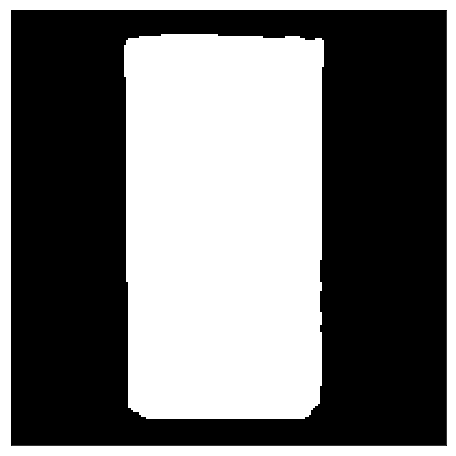

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_370.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_459.png


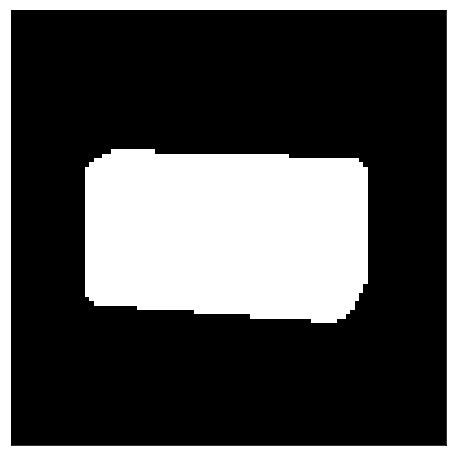

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_459.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_351.png


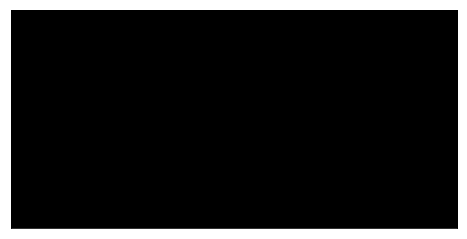

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_351.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_438.png


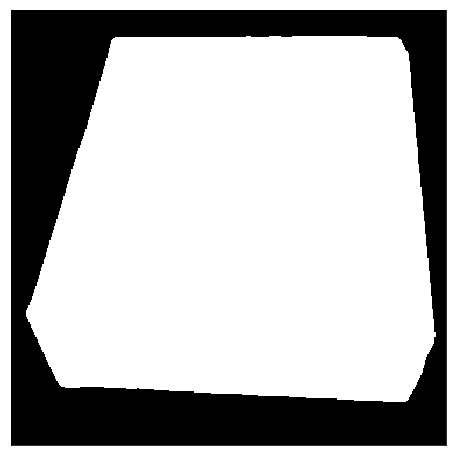

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_438.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_389.png


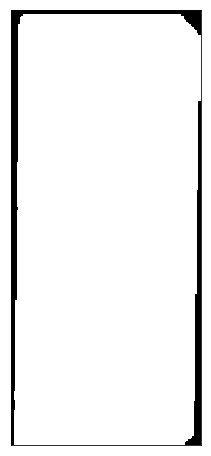

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_389.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_234.png


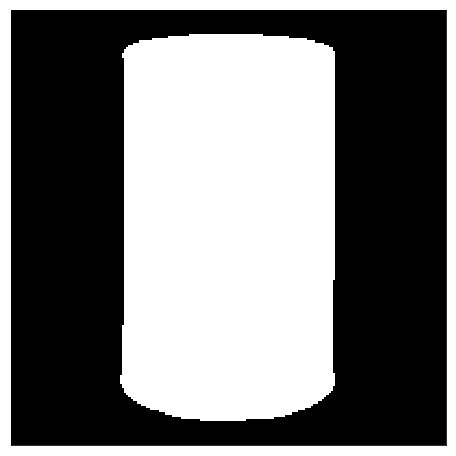

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_234.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_281.png


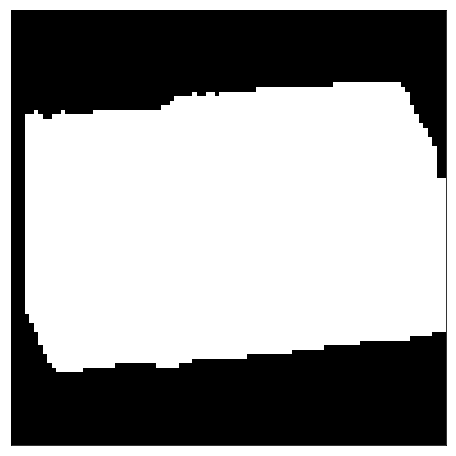

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_281.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_028.png


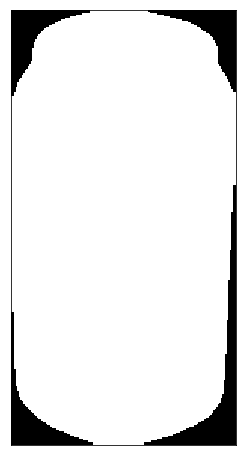

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_028.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_120.png


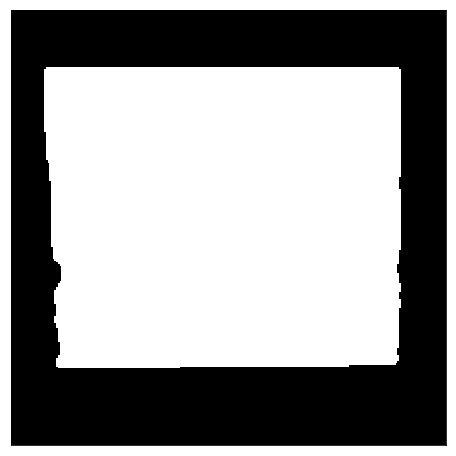

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_120.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_058.png


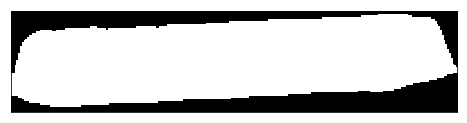

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_058.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_163.png


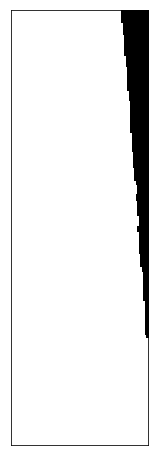

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_163.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_251.png


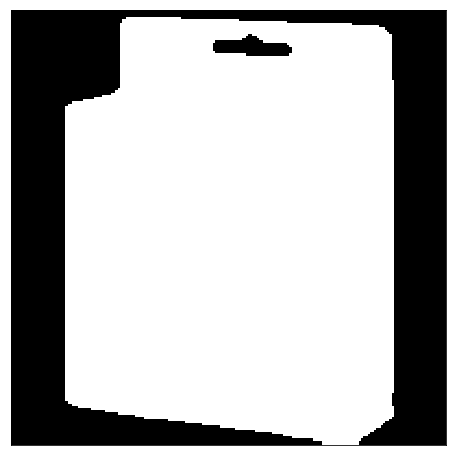

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_251.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_225.png


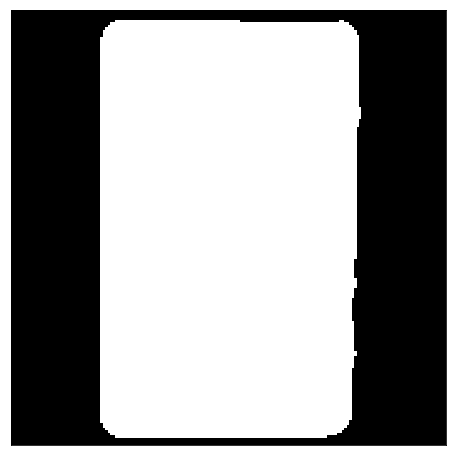

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_225.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_329.png


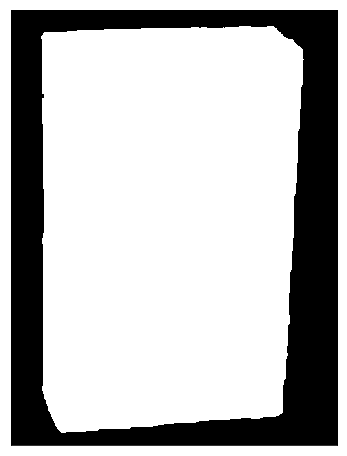

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_329.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_271.png


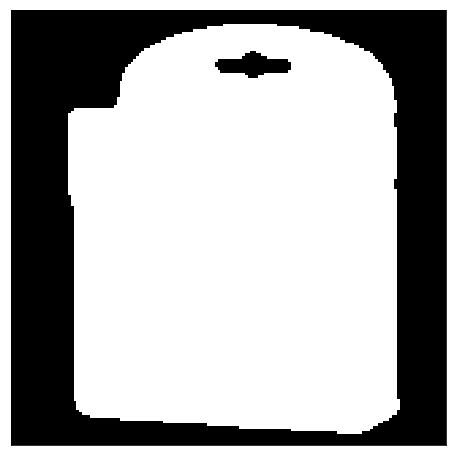

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_271.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_399.png


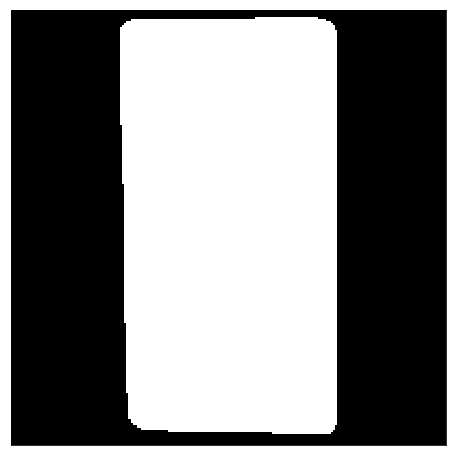

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_399.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_261.png


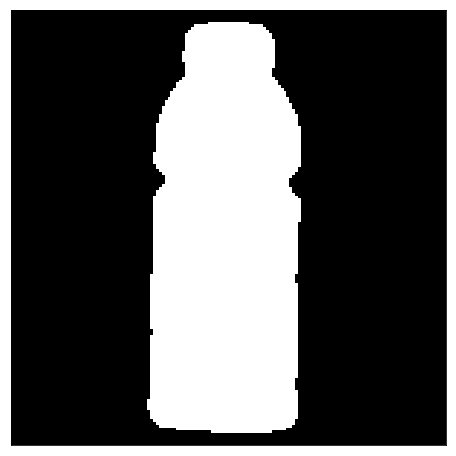

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_261.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_003.png


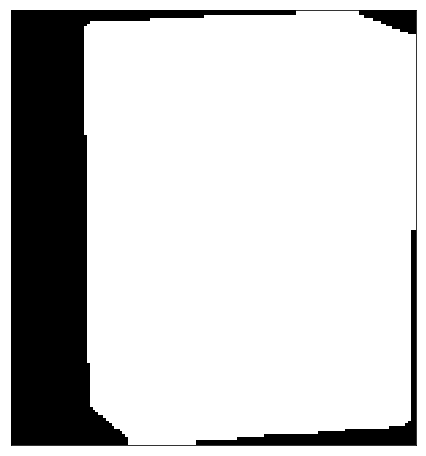

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_003.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_051.png


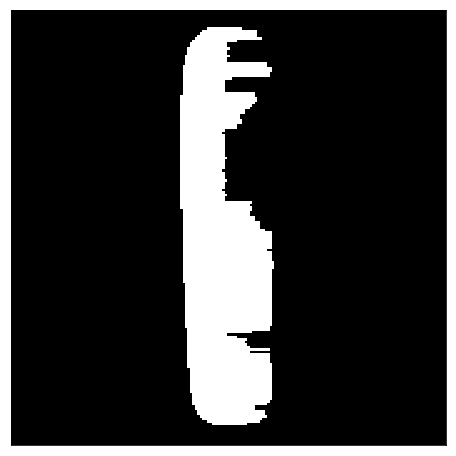

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_051.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_338.png


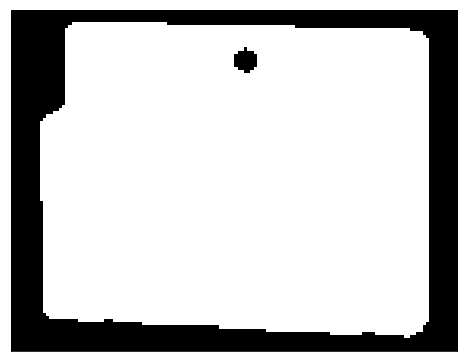

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_338.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_241.png


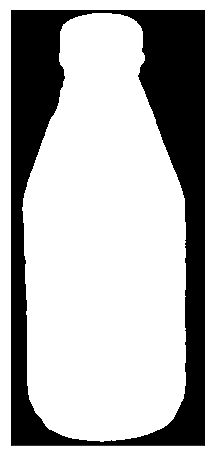

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_241.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_431.png


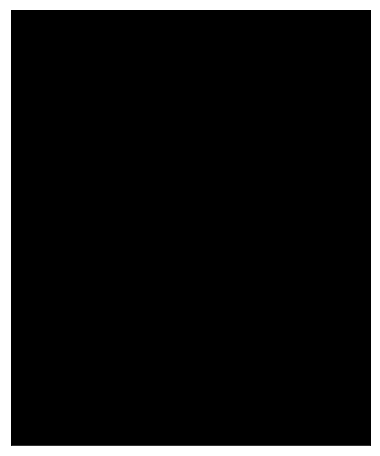

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_431.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_024.png


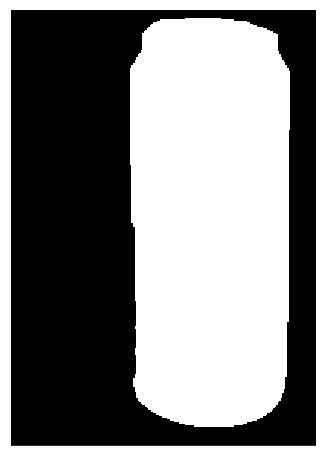

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_024.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_102.png


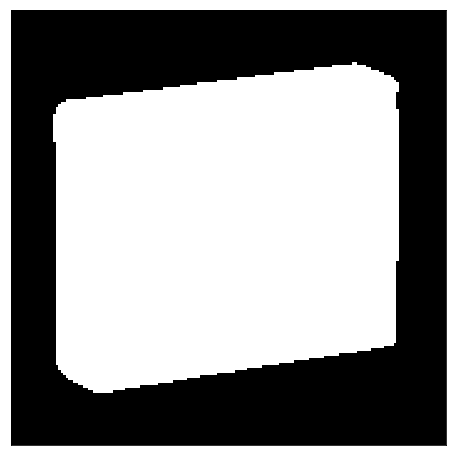

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_102.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_328.png


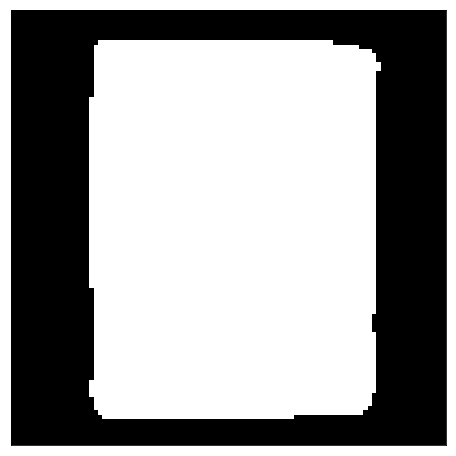

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_328.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_167.png


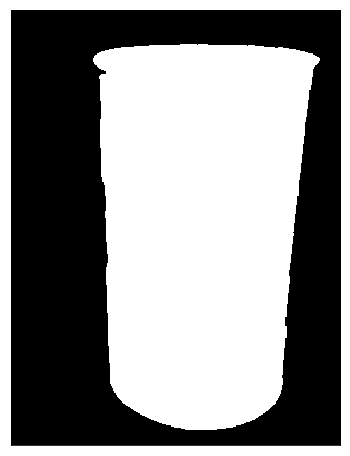

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_167.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_301.png


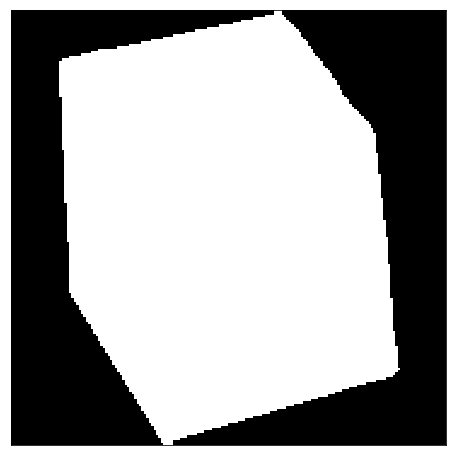

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_301.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_242.png


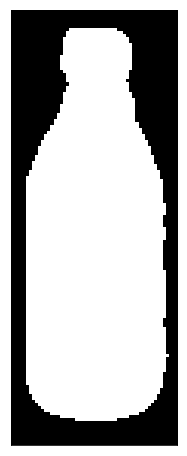

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_242.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_429.png


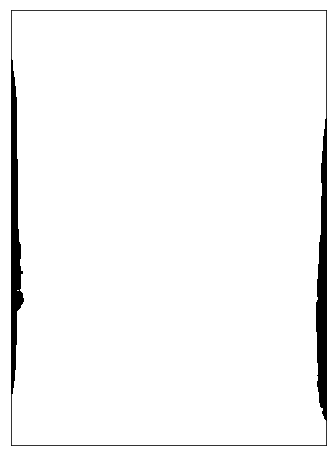

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_429.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_342.png


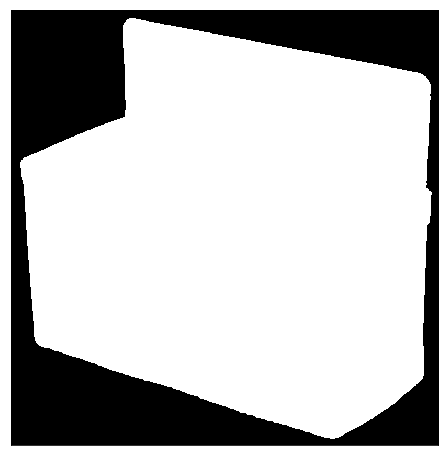

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_342.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_397.png


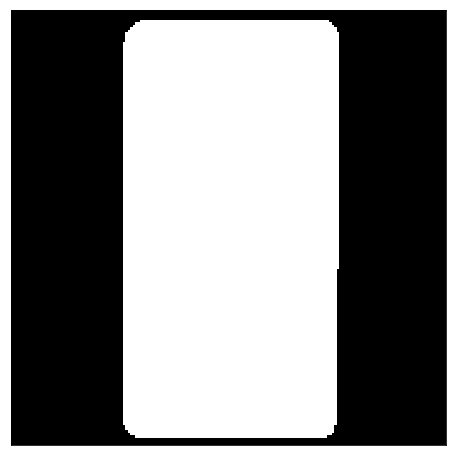

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_397.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_456.png


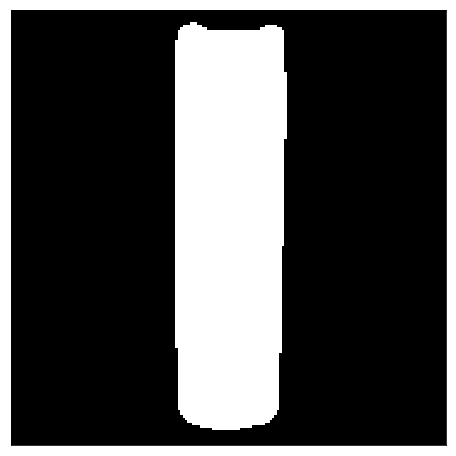

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_456.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_469.png


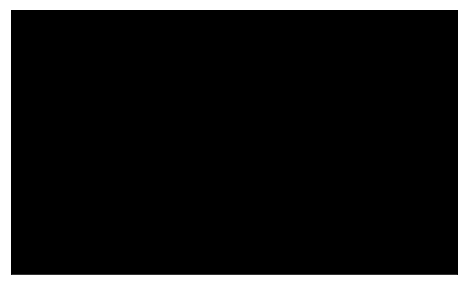

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_469.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_009.png


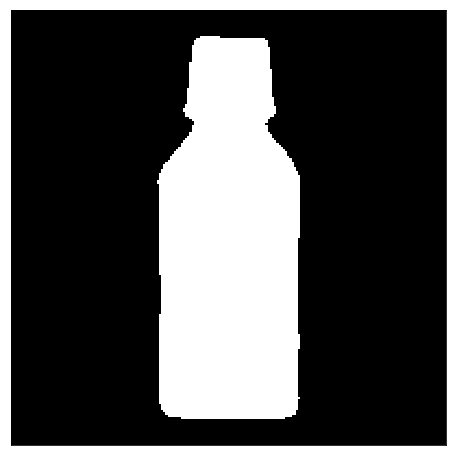

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_009.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_130.png


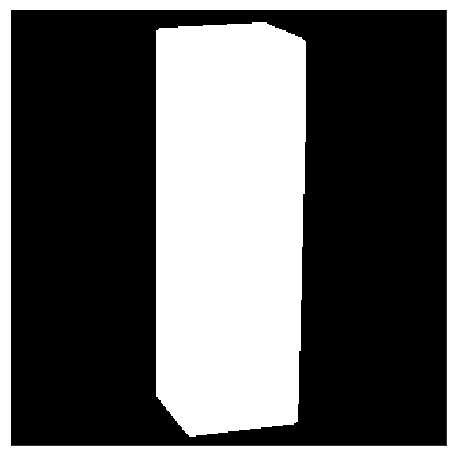

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_130.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_391.png


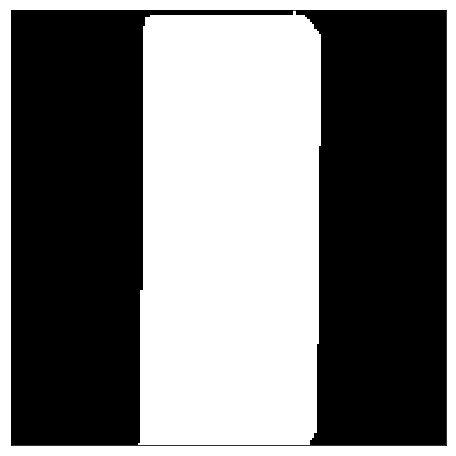

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_391.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_002.png


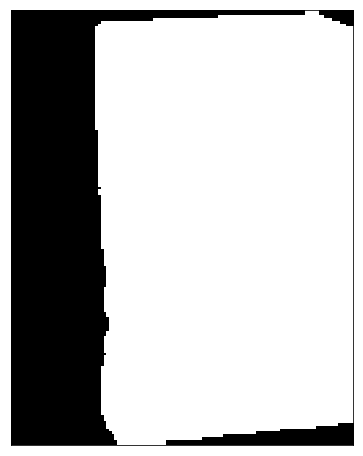

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_002.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_042.png


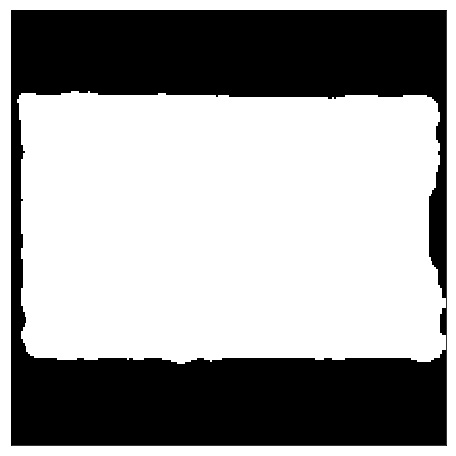

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_042.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_095.png


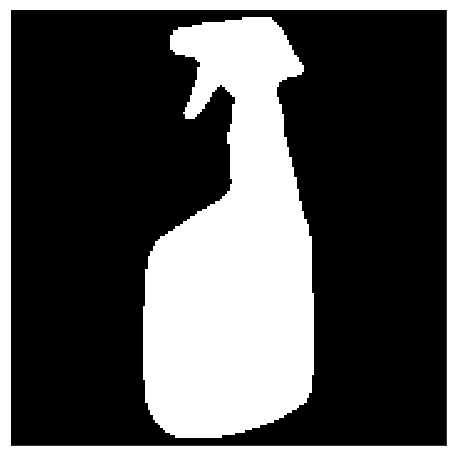

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_095.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_071.png


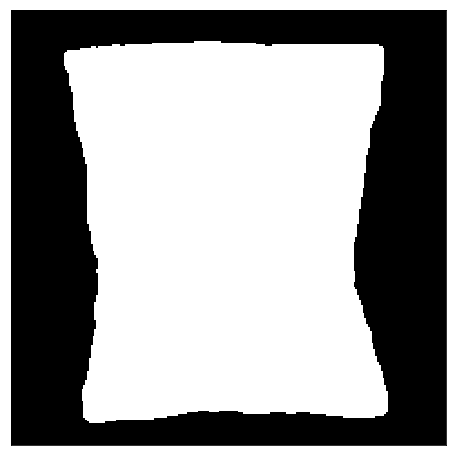

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_071.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_451.png


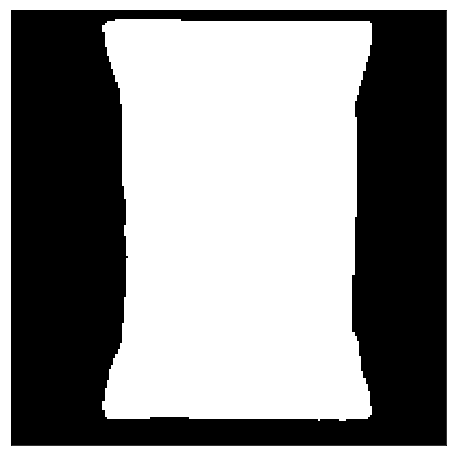

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_451.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_413.png


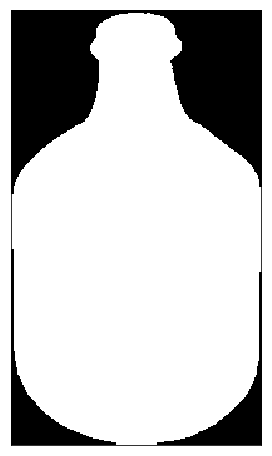

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_413.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_135.png


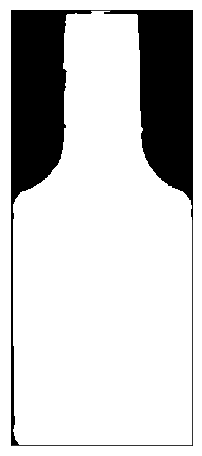

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_135.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_349.png


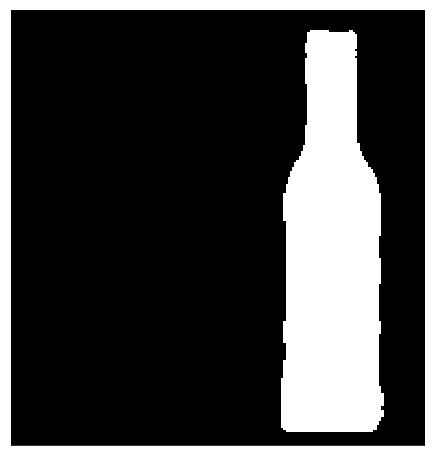

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_349.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_137.png


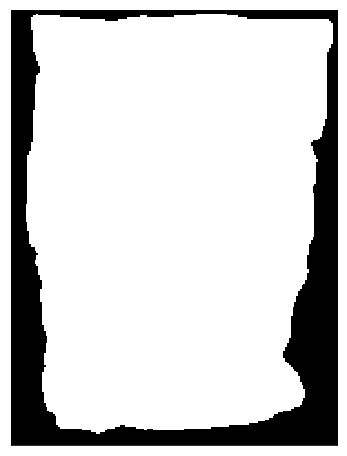

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_137.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_048.png


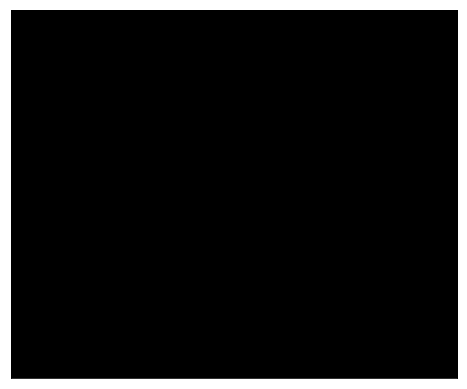

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_048.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_214.png


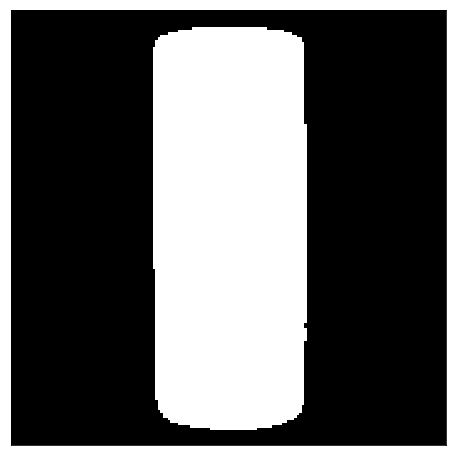

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_214.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_443.png


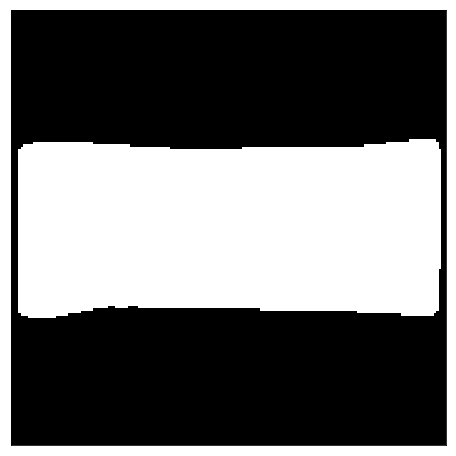

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_443.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_001.png


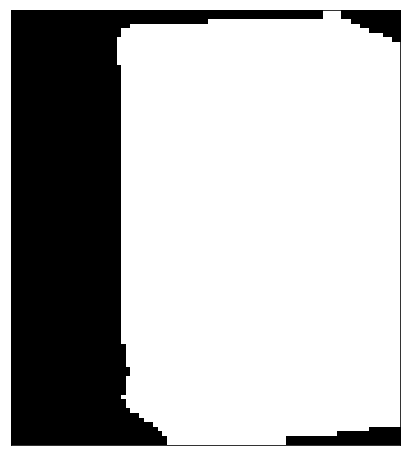

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_001.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_207.png


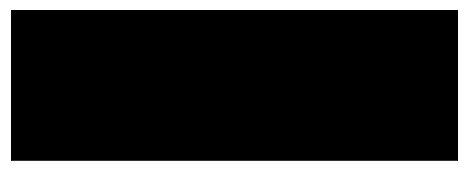

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_207.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_460.png


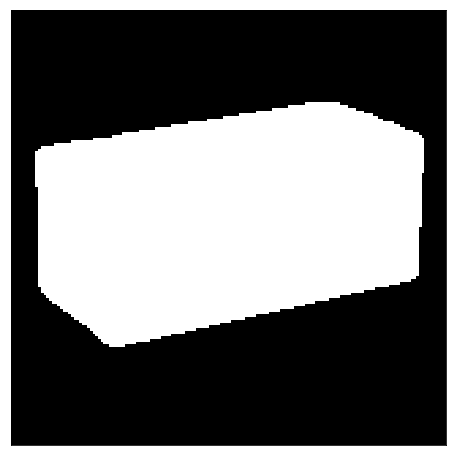

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_460.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_235.png


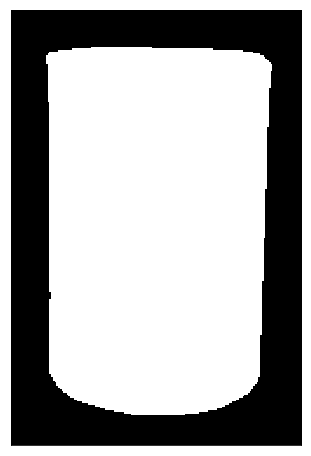

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_235.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_166.png


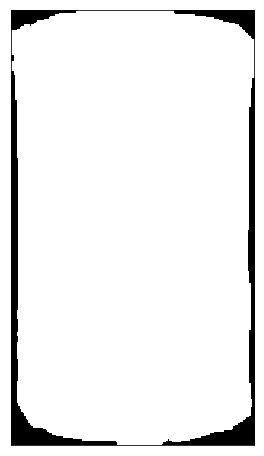

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_166.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_348.png


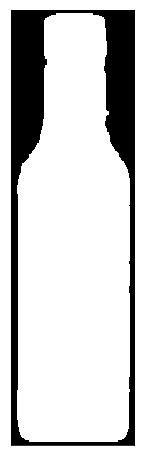

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_348.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_284.png


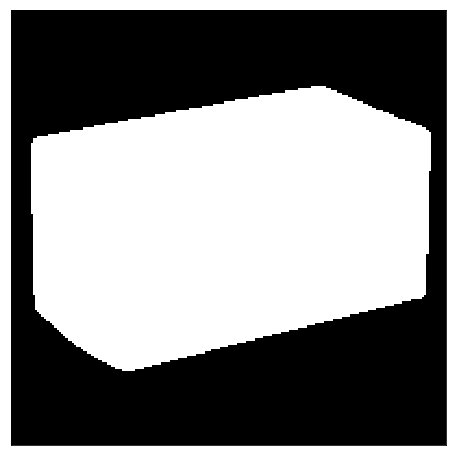

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_284.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_007.png


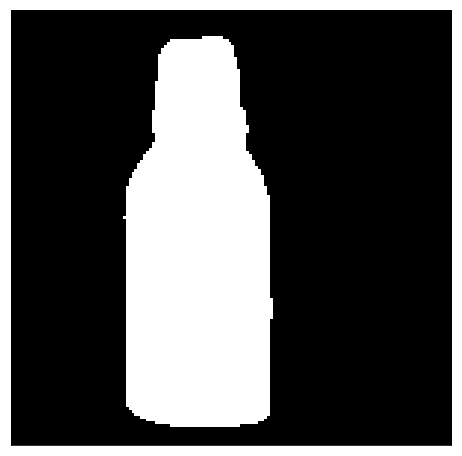

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_007.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_421.png


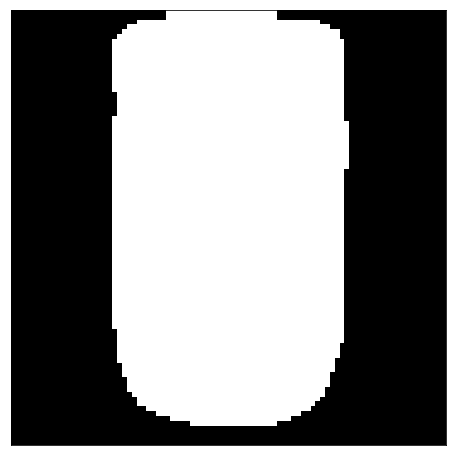

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_421.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_164.png


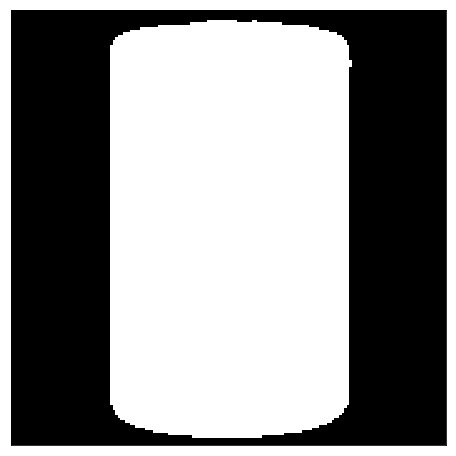

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_164.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_092.png


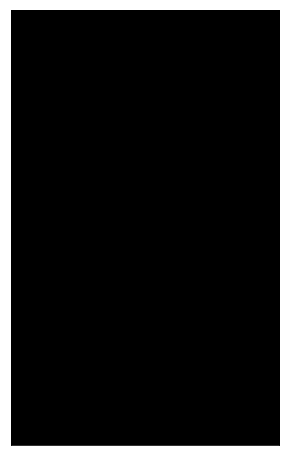

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_092.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_192.png


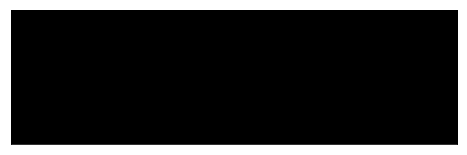

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_192.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_238.png


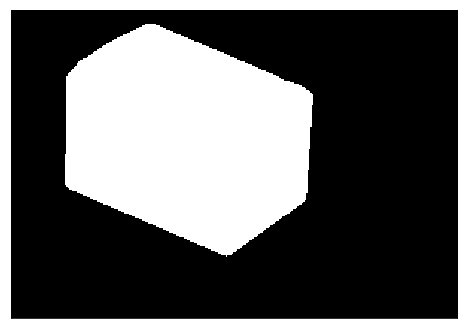

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_238.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_313.png


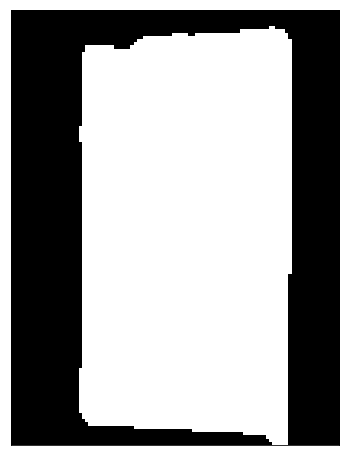

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_313.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_020.png


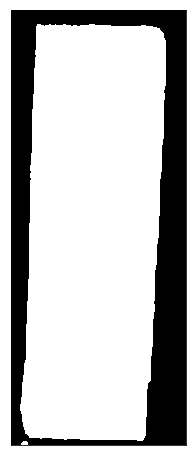

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_020.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_357.png


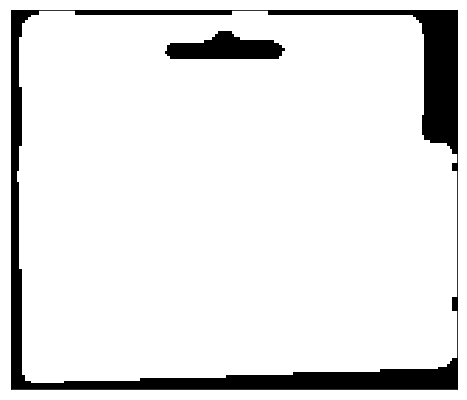

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_357.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_359.png


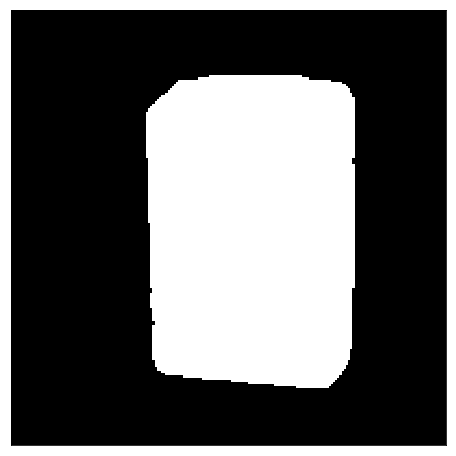

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_359.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_109.png


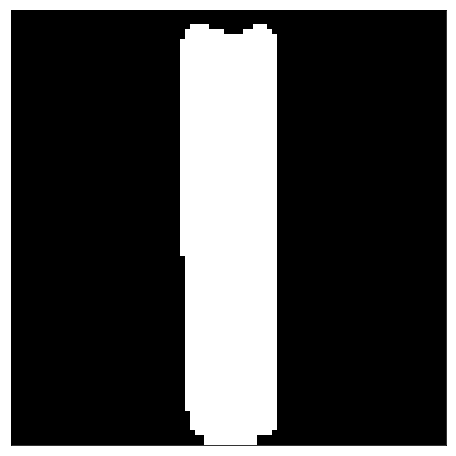

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_109.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_396.png


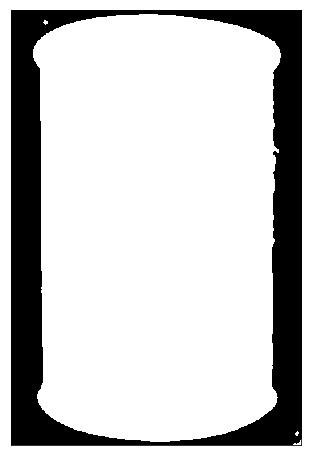

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_396.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_161.png


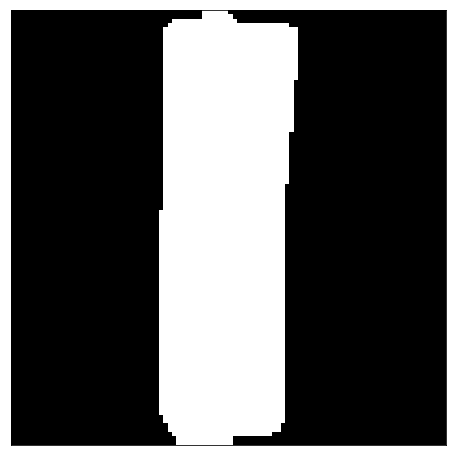

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_161.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_121.png


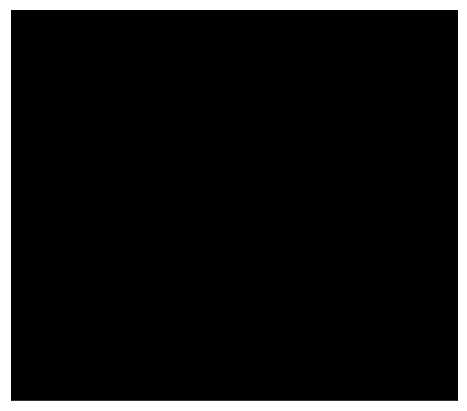

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_121.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_439.png


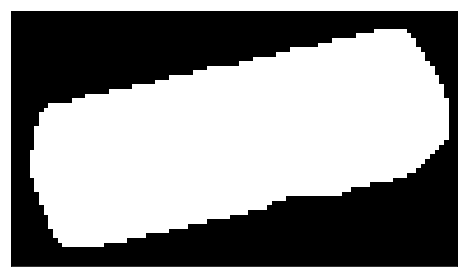

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_439.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_450.png


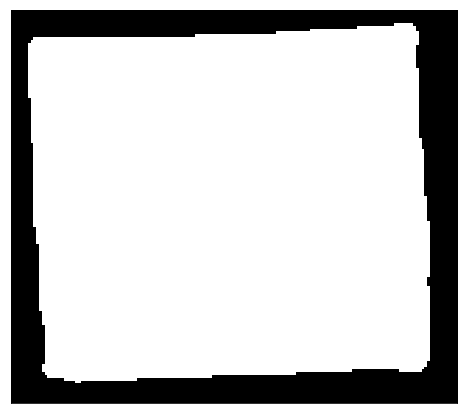

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_450.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_307.png


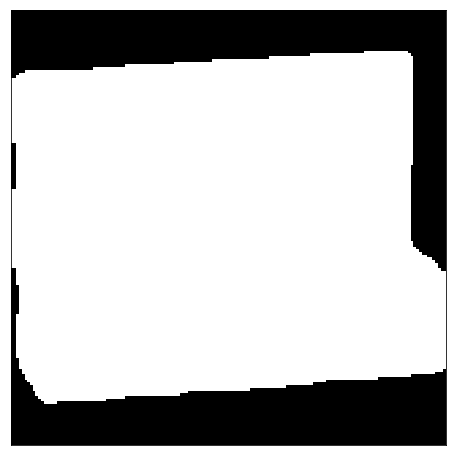

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_307.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_305.png


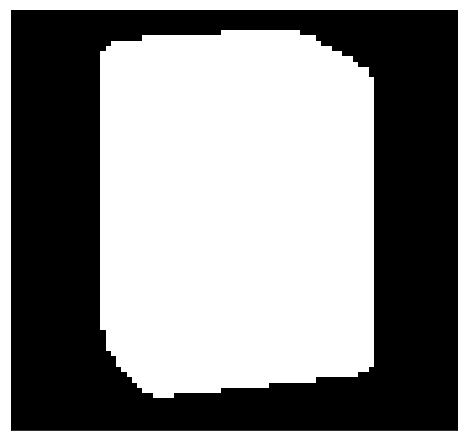

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_305.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_004.png


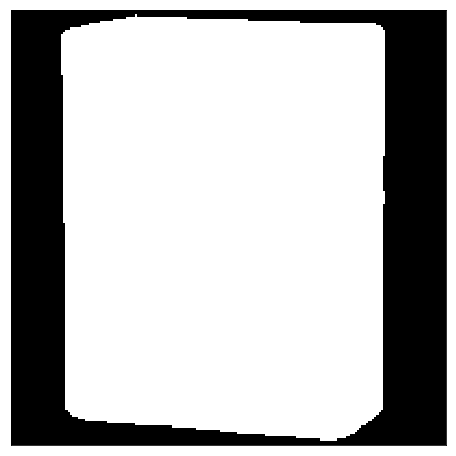

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_004.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_056.png


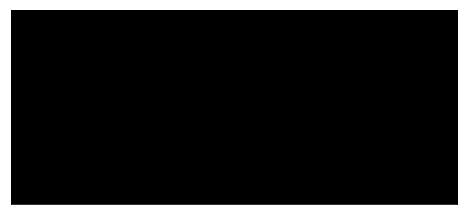

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_056.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_252.png


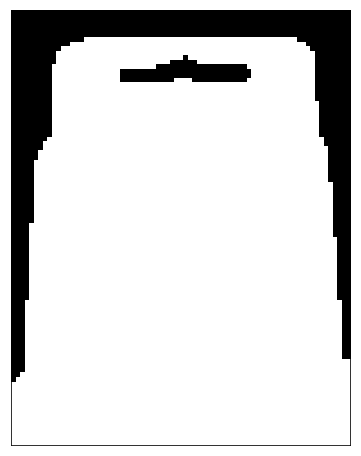

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_252.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_382.png


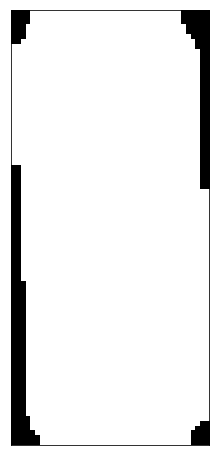

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_382.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_015.png


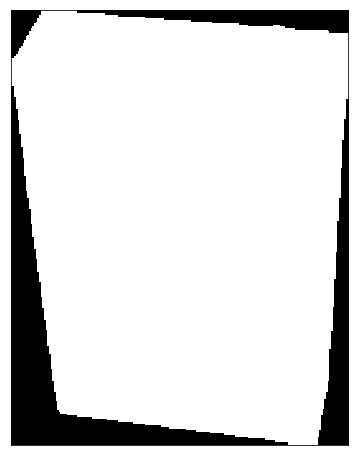

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_015.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_055.png


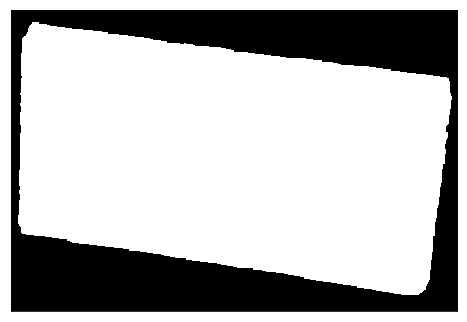

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_055.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_222.png


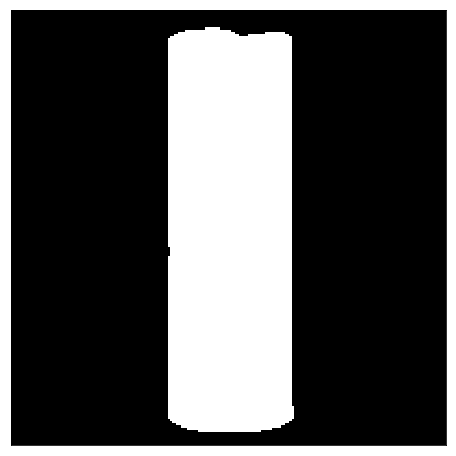

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_222.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_422.png


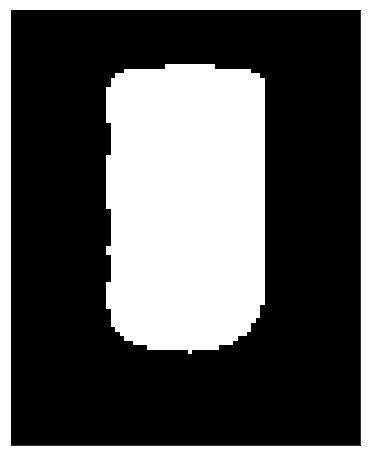

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_422.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_250.png


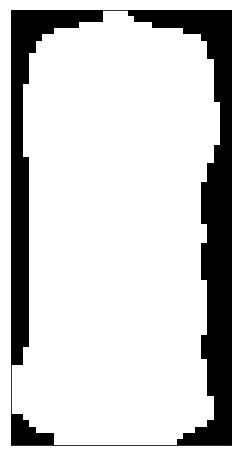

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_250.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_171.png


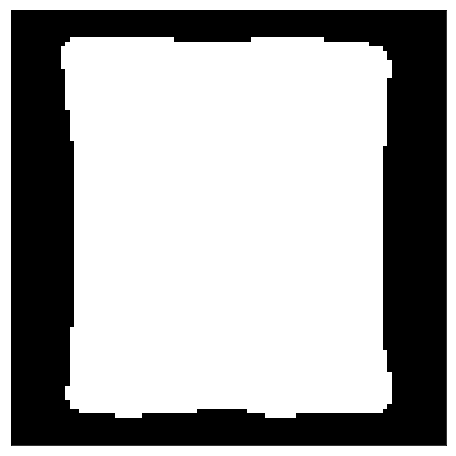

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_171.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_345.png


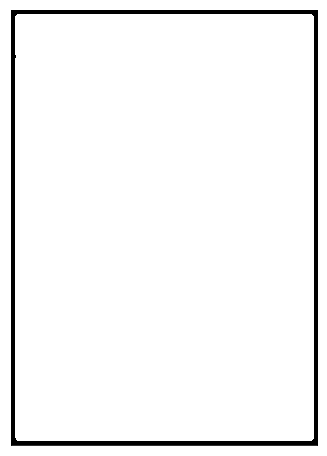

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_345.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_213.png


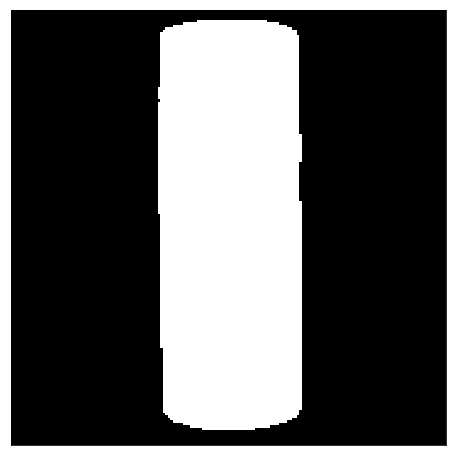

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_213.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_296.png


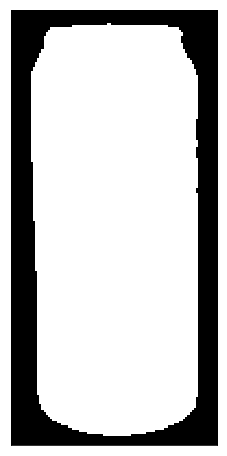

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_296.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_315.png


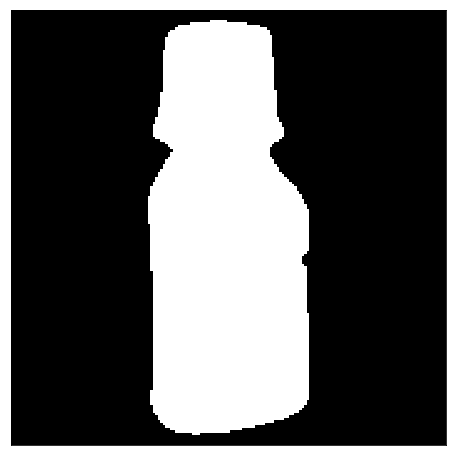

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_315.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_336.png


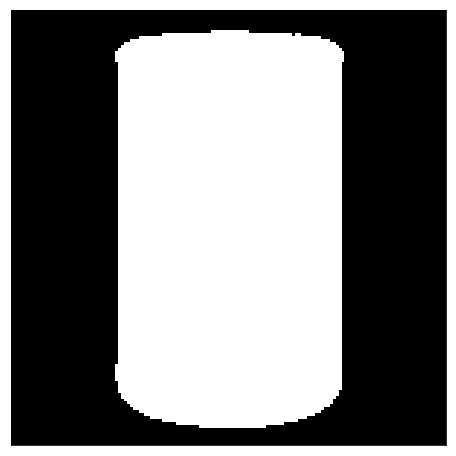

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_336.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_406.png


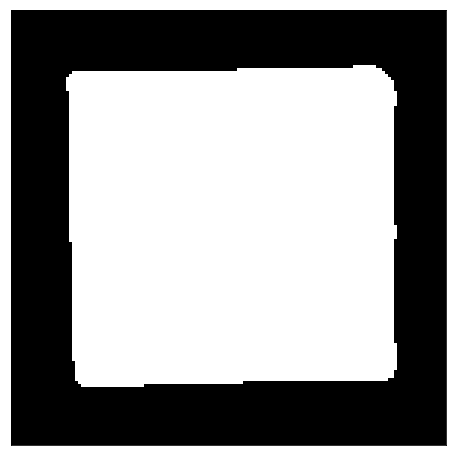

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_406.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_444.png


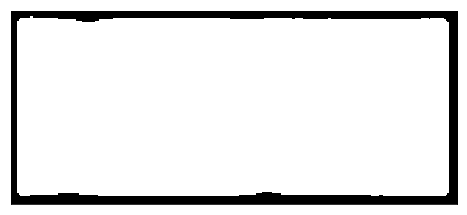

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_444.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_373.png


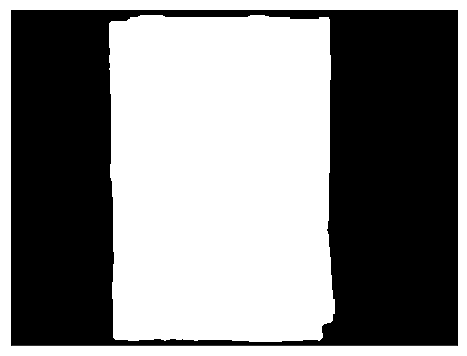

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_373.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_099.png


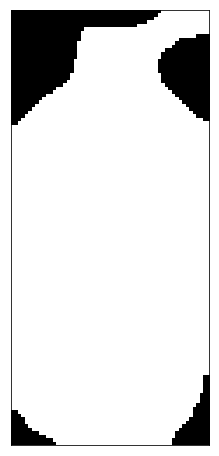

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_099.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_418.png


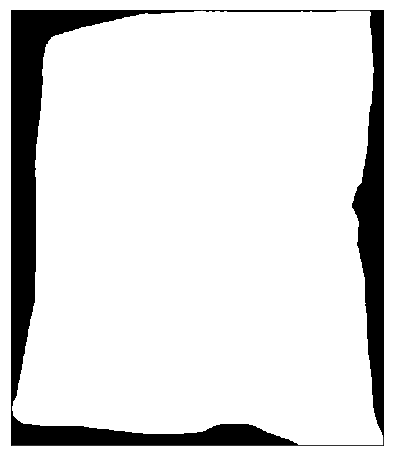

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_418.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_108.png


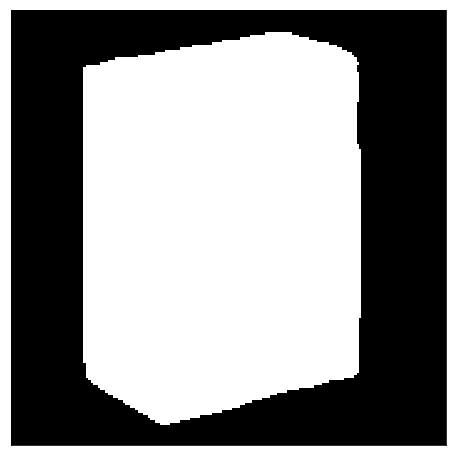

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_108.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_294.png


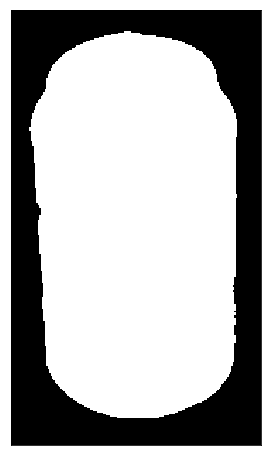

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_294.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_280.png


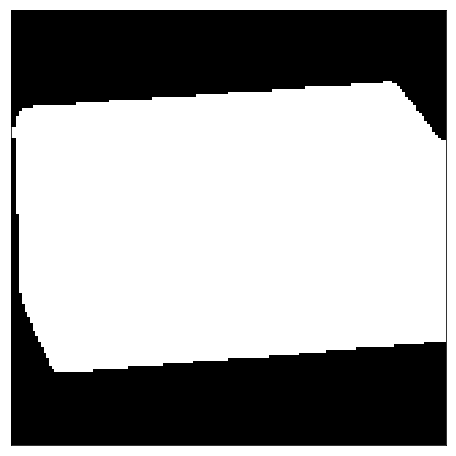

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_280.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_300.png


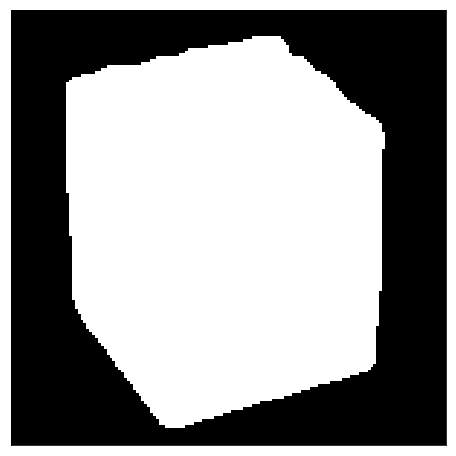

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_300.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_039.png


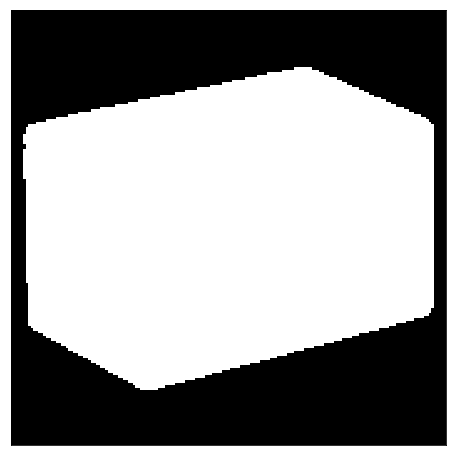

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_039.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_285.png


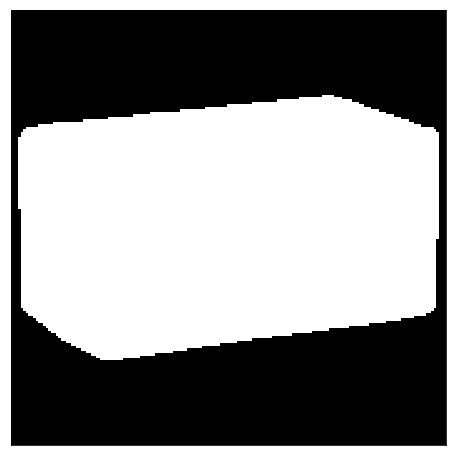

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_285.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_237.png


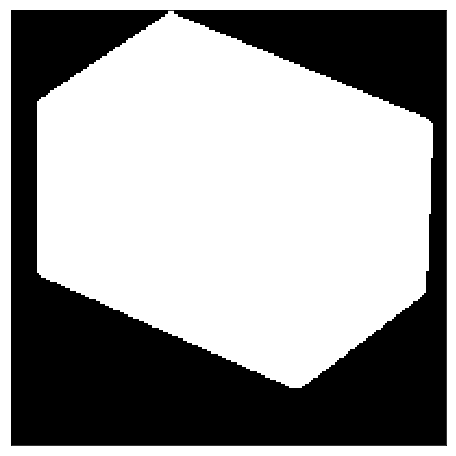

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_237.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_199.png


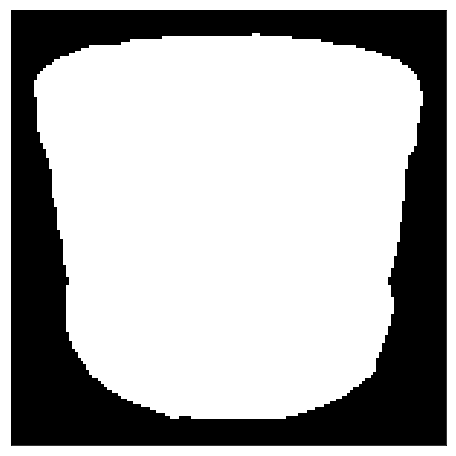

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_199.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_091.png


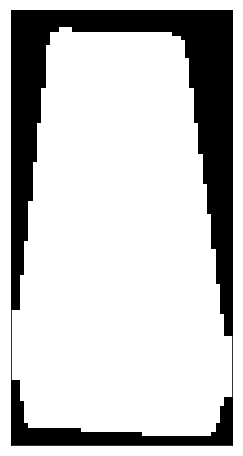

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_091.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_379.png


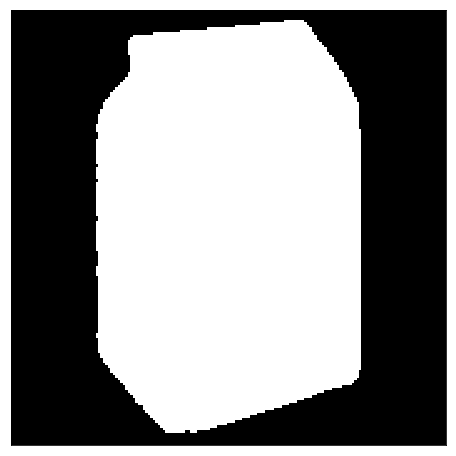

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_379.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_387.png


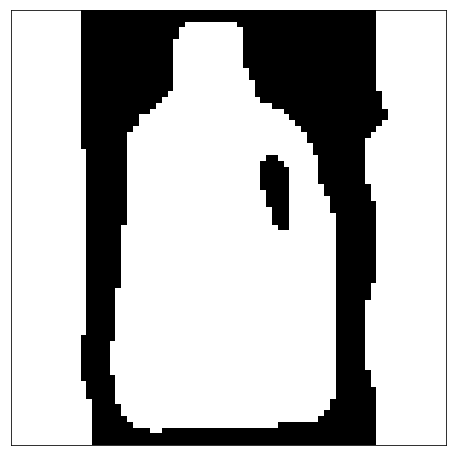

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_387.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_358.png


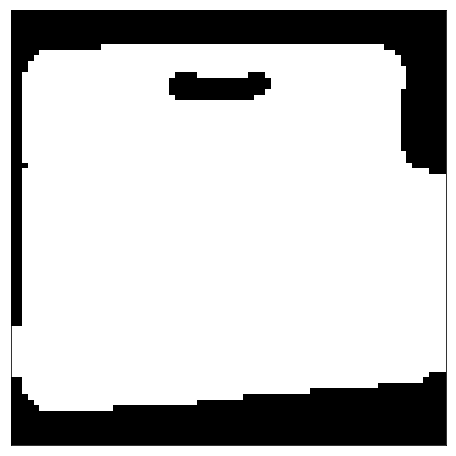

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_358.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_465.png


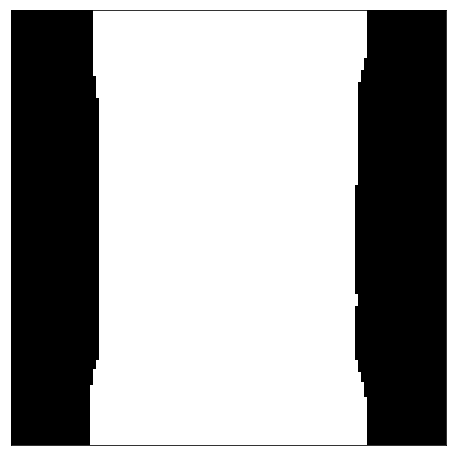

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_465.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_317.png


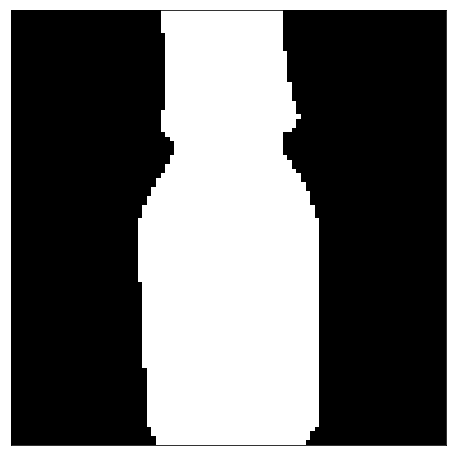

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_317.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_153.png


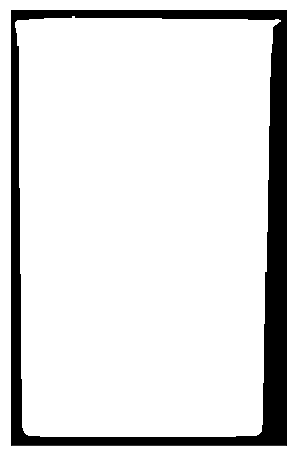

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_153.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_068.png


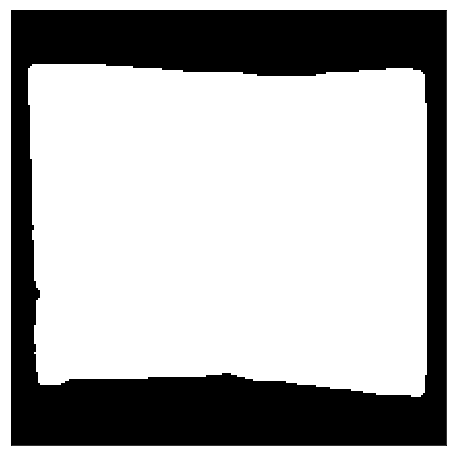

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_068.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_425.png


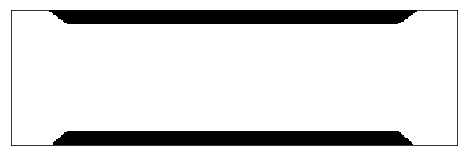

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_425.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_069.png


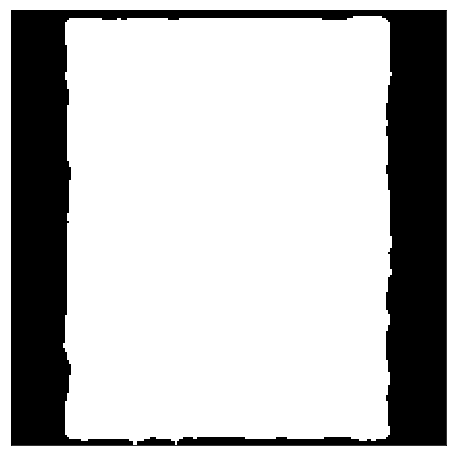

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_069.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_325.png


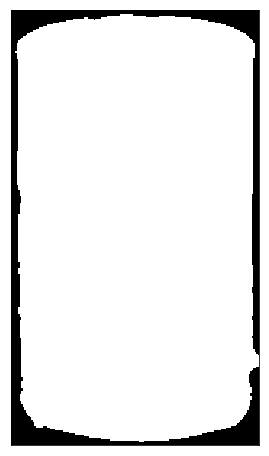

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_325.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_129.png


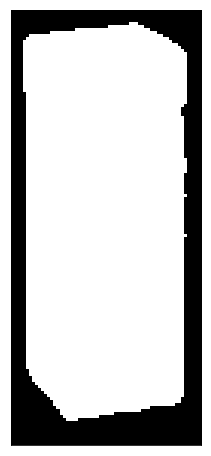

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_129.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_270.png


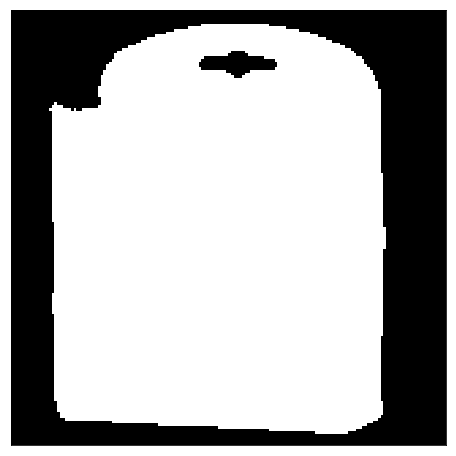

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_270.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_036.png


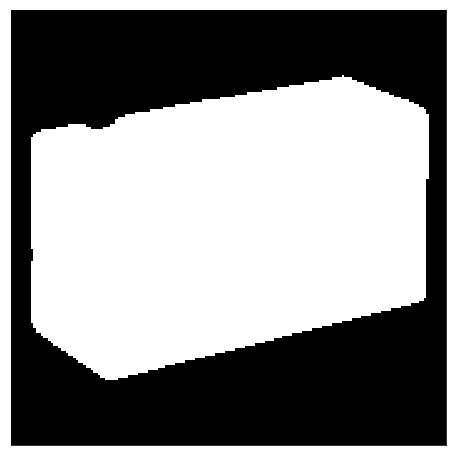

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_036.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_037.png


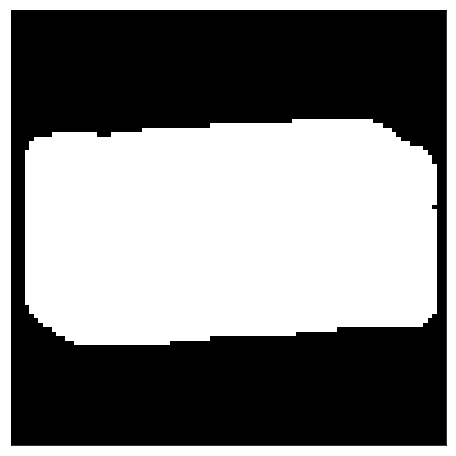

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_037.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_417.png


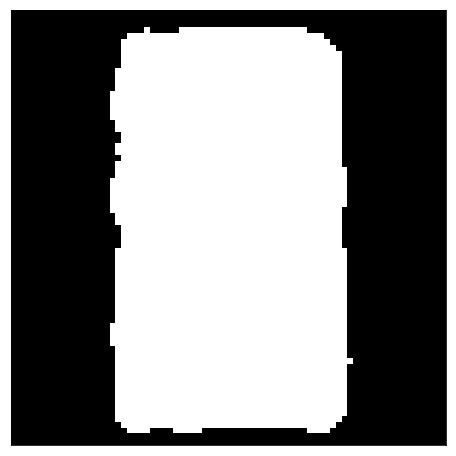

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_417.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_105.png


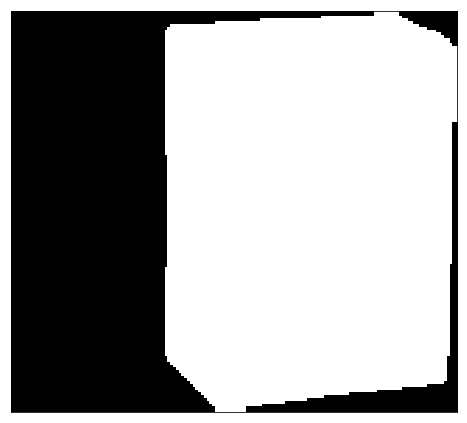

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_105.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_332.png


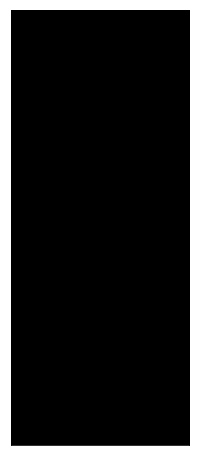

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_332.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_401.png


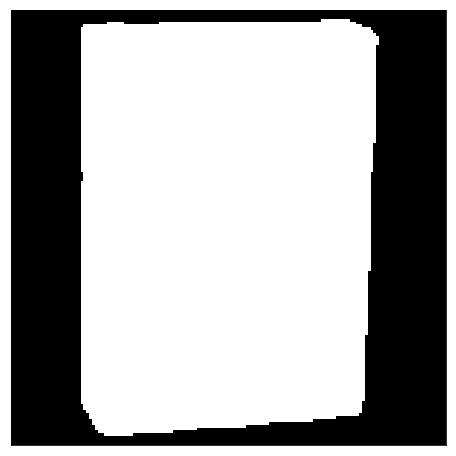

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_401.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_314.png


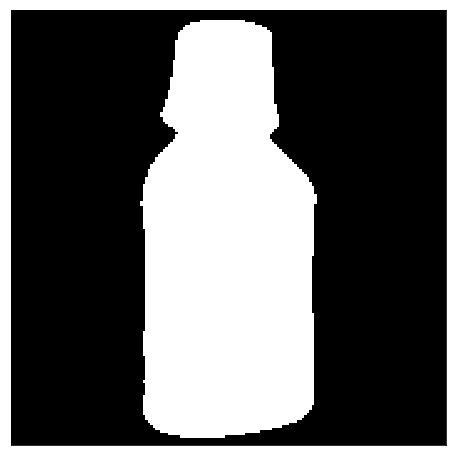

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_314.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_447.png


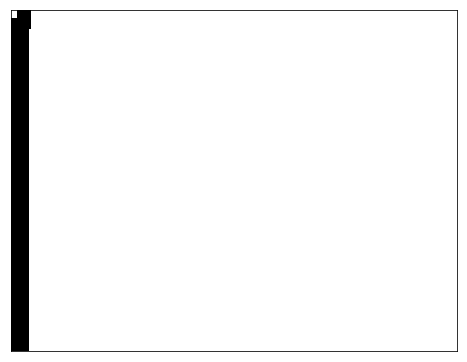

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_447.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_031.png


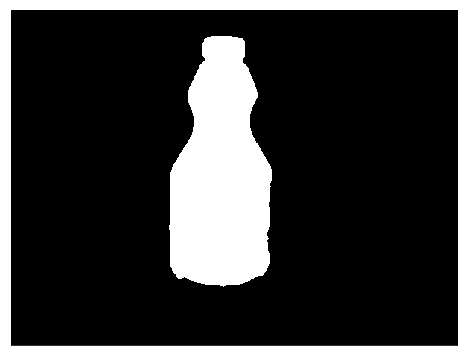

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_031.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_311.png


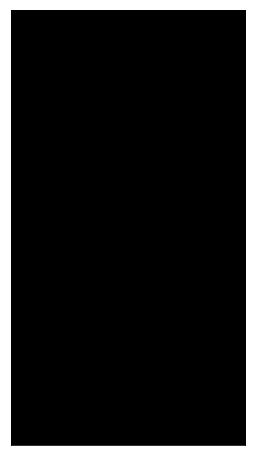

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_311.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_025.png


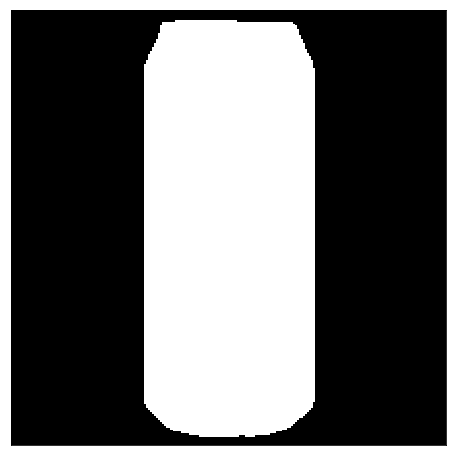

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_025.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_282.png


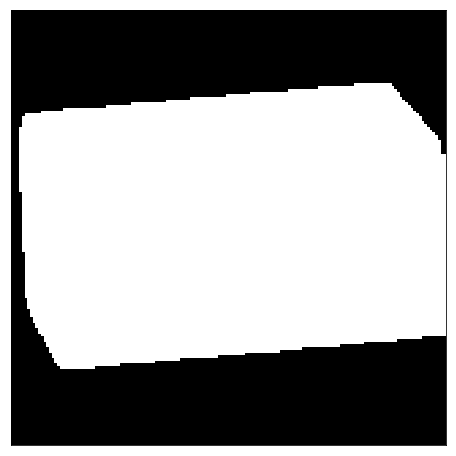

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_282.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_155.png


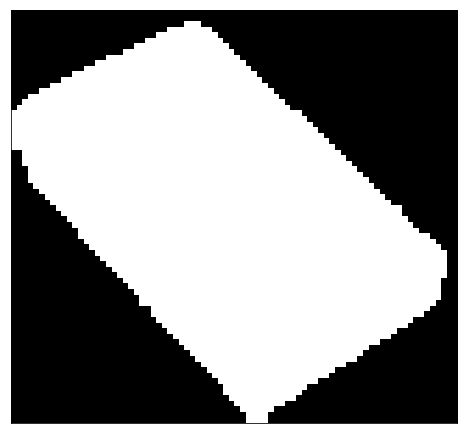

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_155.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_097.png


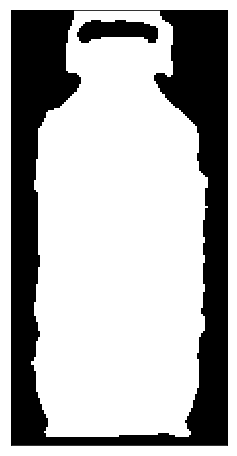

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_097.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_306.png


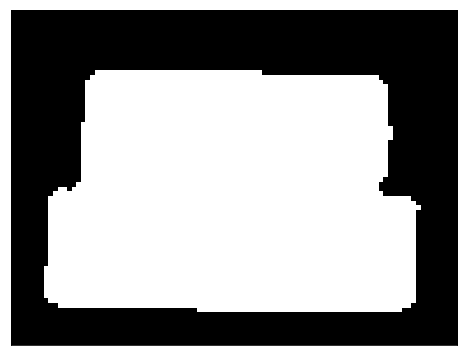

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_306.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_408.png


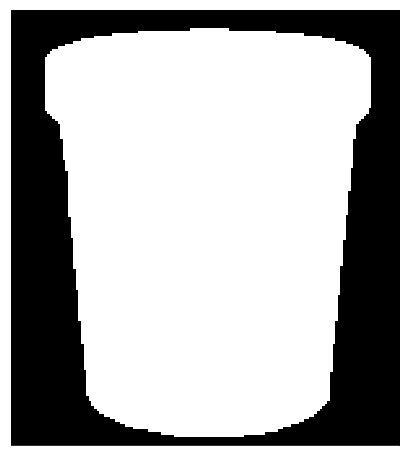

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_408.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_356.png


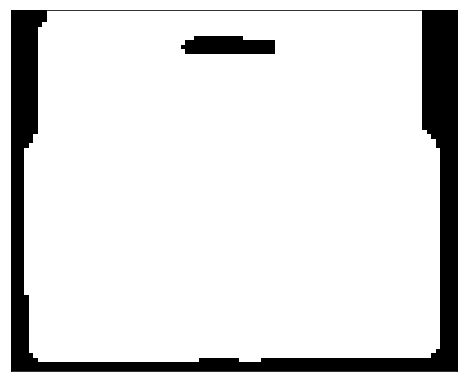

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_356.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_103.png


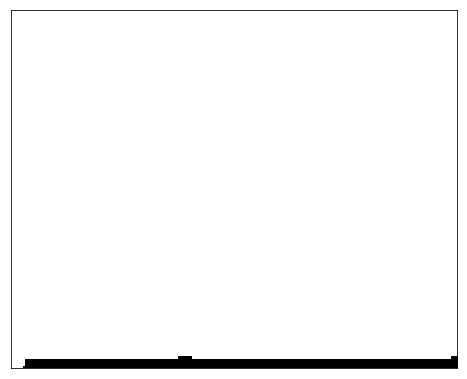

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_103.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_290.png


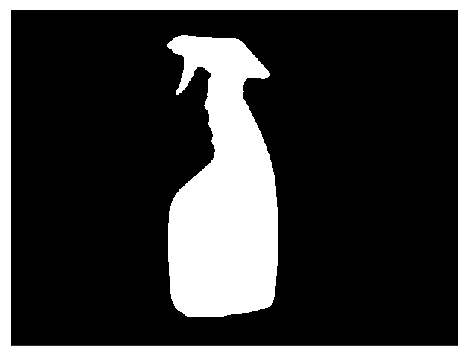

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_290.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_255.png


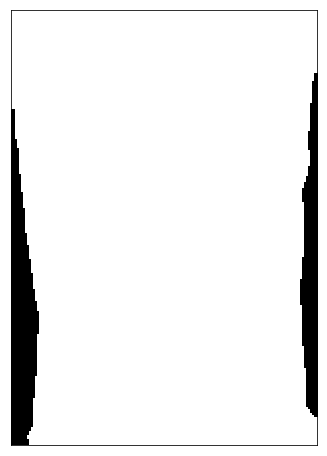

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_255.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_434.png


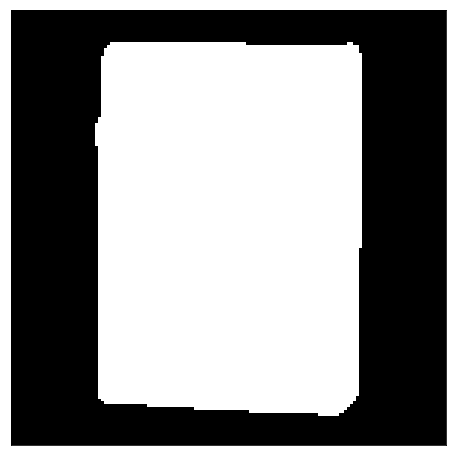

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_434.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_353.png


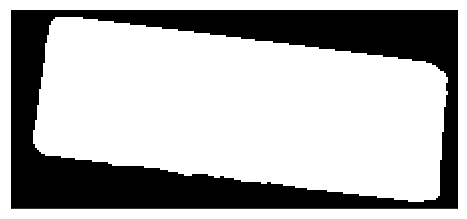

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_353.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_160.png


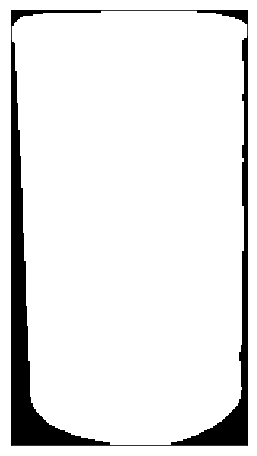

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_160.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_246.png


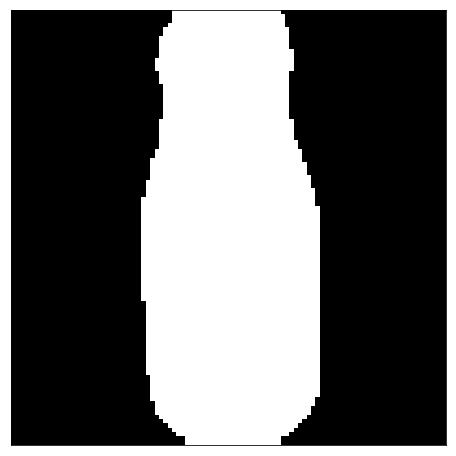

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_246.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_027.png


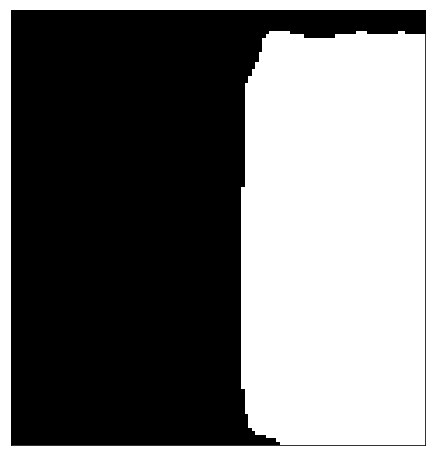

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_027.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_360.png


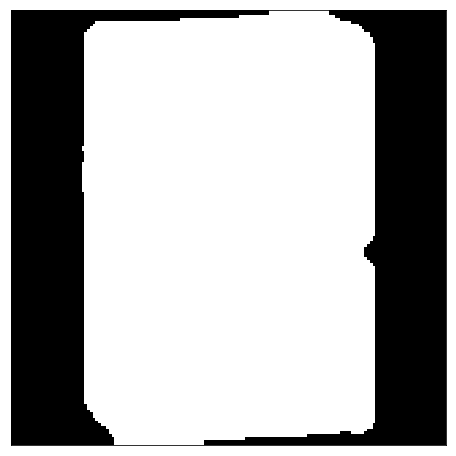

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_360.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_236.png


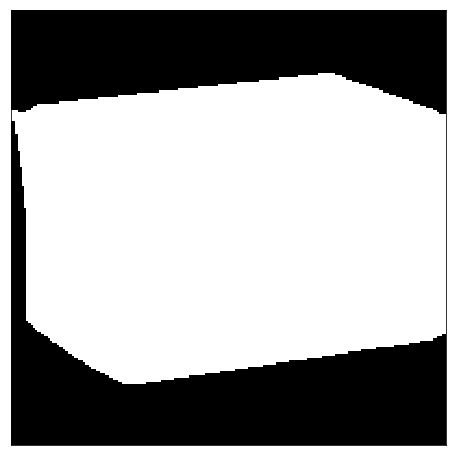

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_236.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_140.png


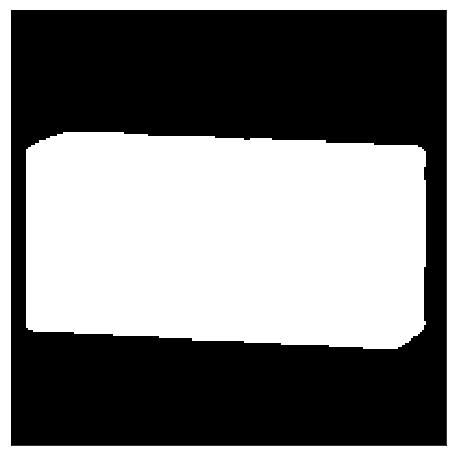

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_140.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_159.png


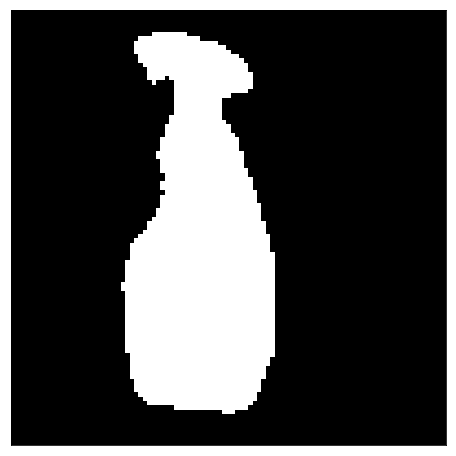

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_159.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_458.png


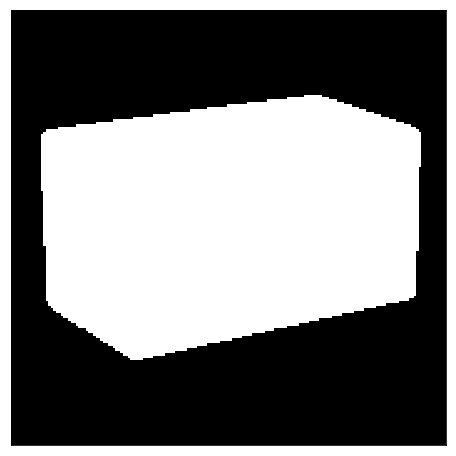

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_458.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_018.png


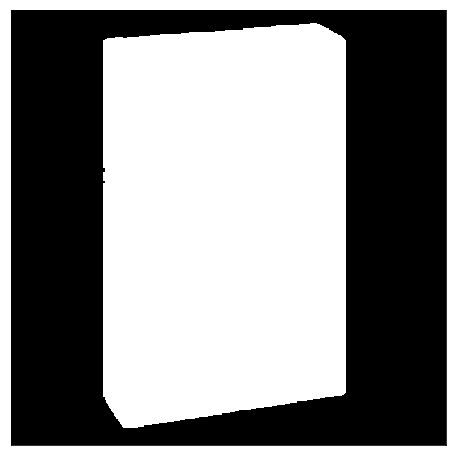

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_018.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_321.png


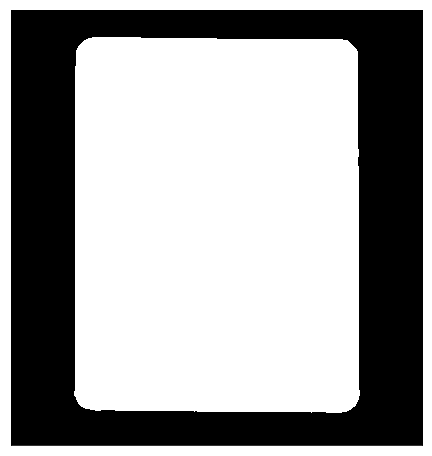

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_321.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_123.png


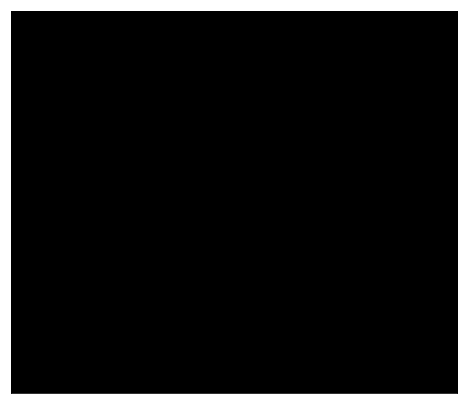

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_123.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_424.png


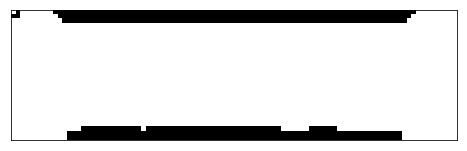

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_424.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_174.png


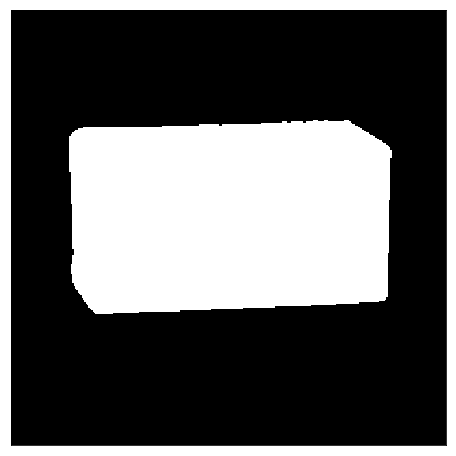

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_174.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_376.png


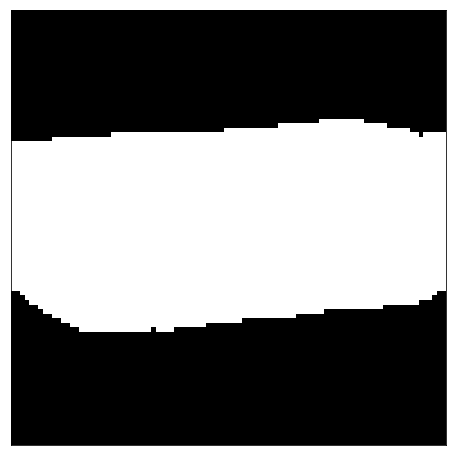

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_376.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_407.png


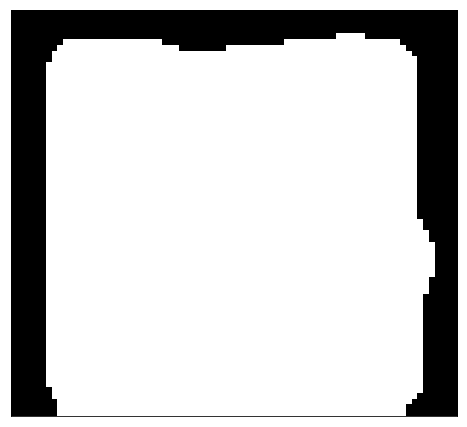

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_407.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_136.png


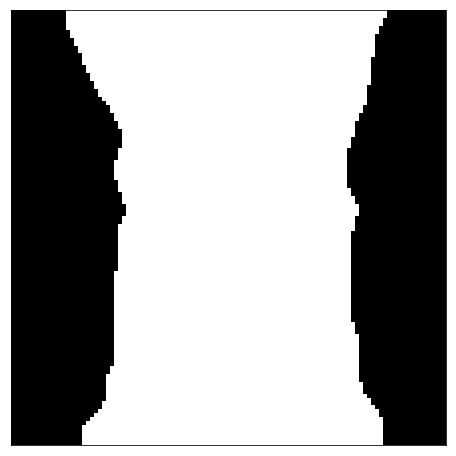

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_136.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_131.png


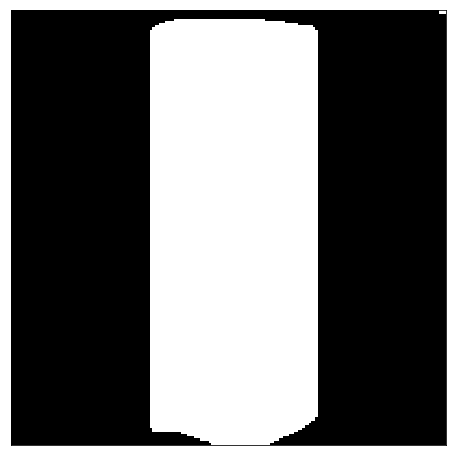

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_131.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_365.png


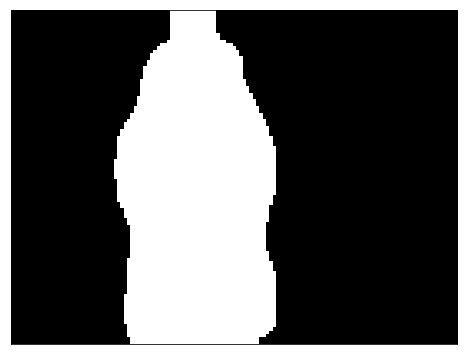

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_365.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_240.png


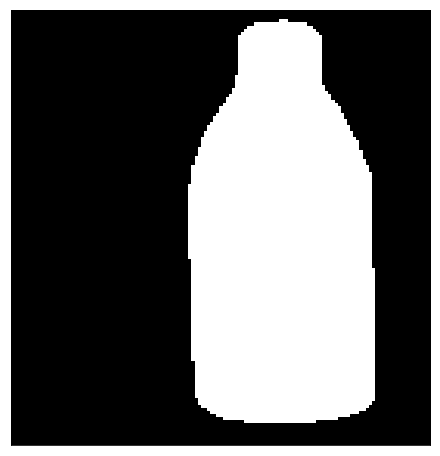

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_240.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_185.png


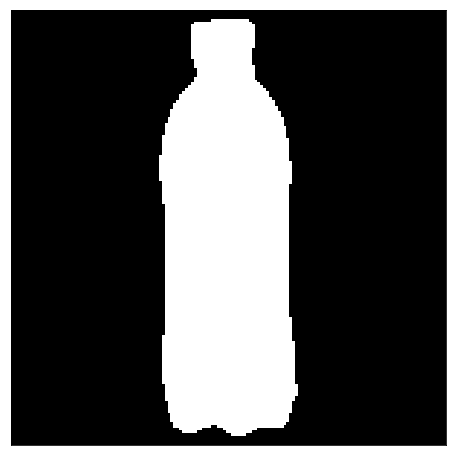

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_185.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_412.png


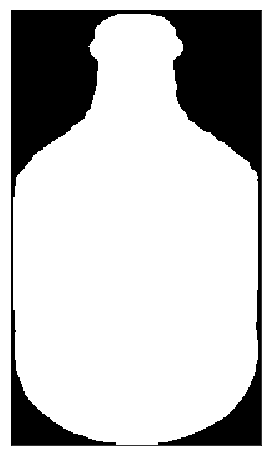

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_412.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_276.png


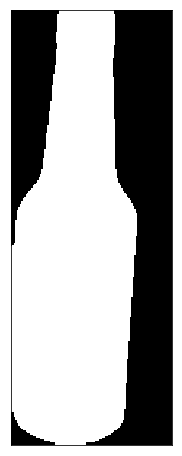

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_276.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_076.png


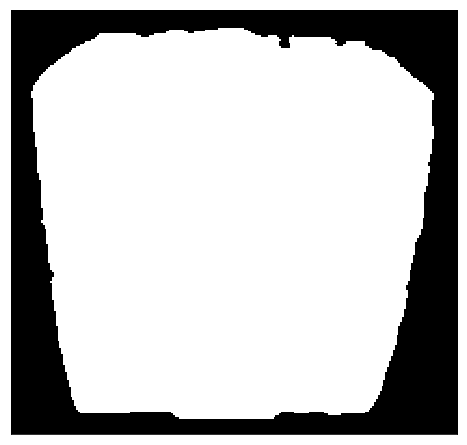

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_076.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_170.png


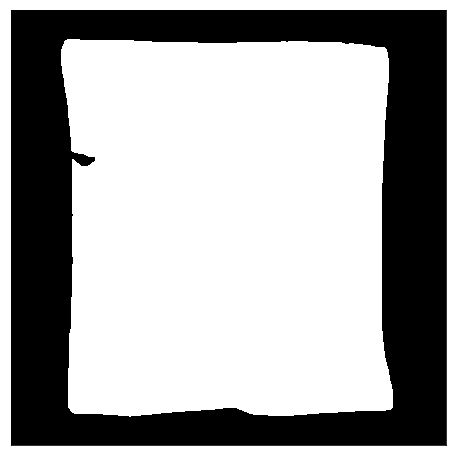

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_170.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_295.png


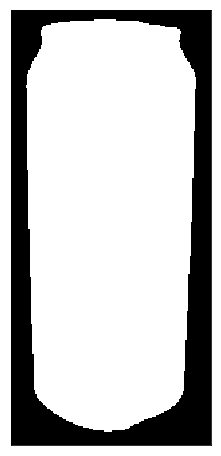

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_295.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_454.png


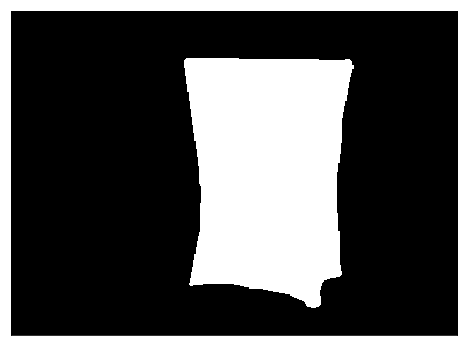

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_454.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_008.png


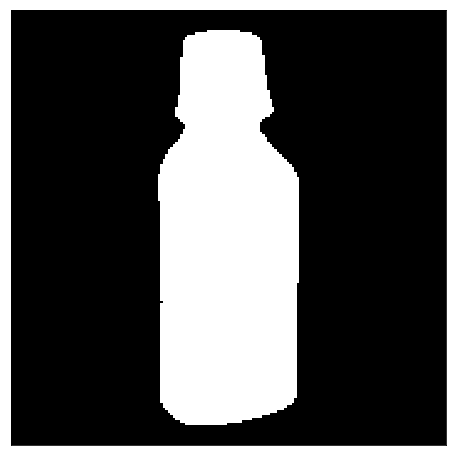

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_008.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_471.png


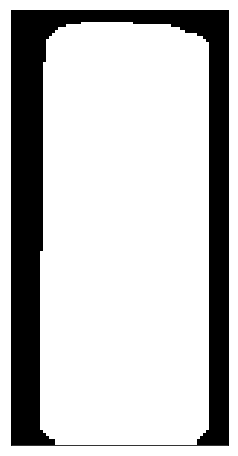

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_471.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_141.png


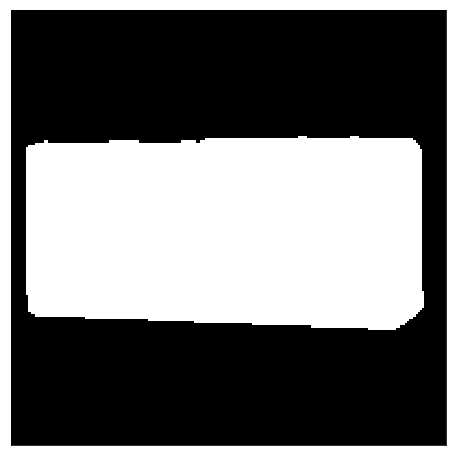

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_141.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_232.png


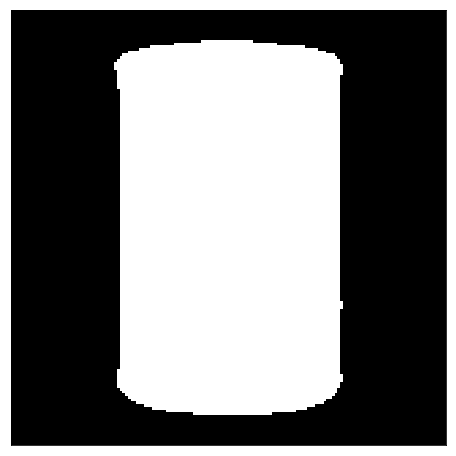

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_232.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_100.png


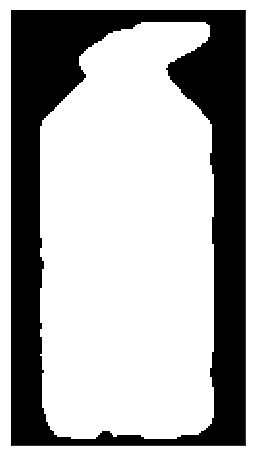

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_100.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_195.png


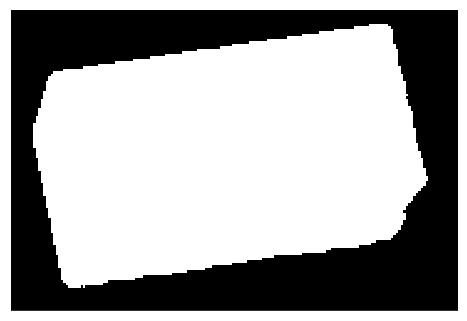

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_195.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_089.png


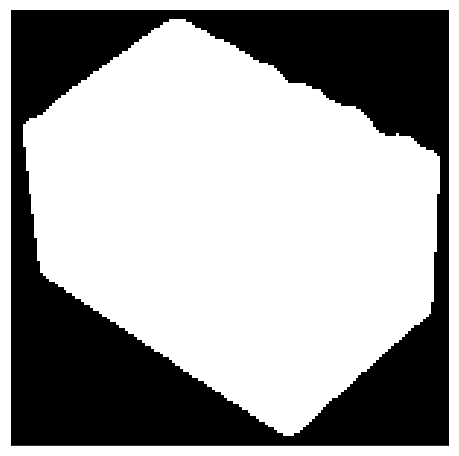

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_089.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_416.png


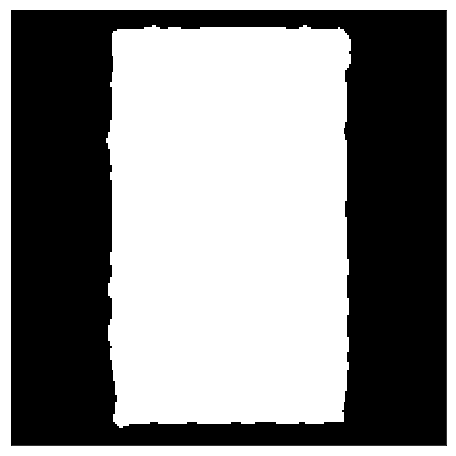

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_416.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_334.png


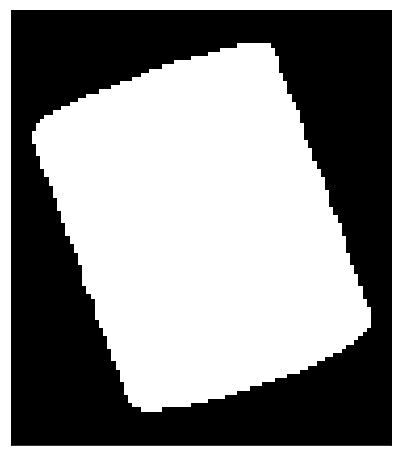

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_334.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_169.png


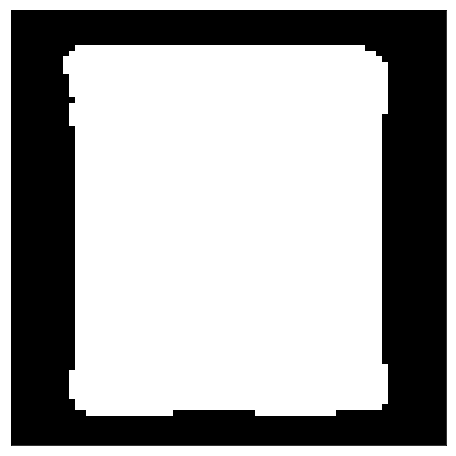

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_169.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_257.png


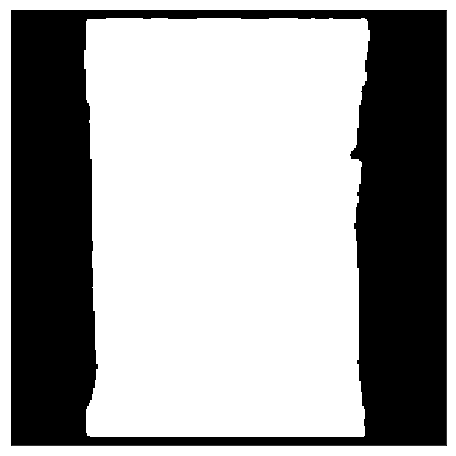

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_257.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_440.png


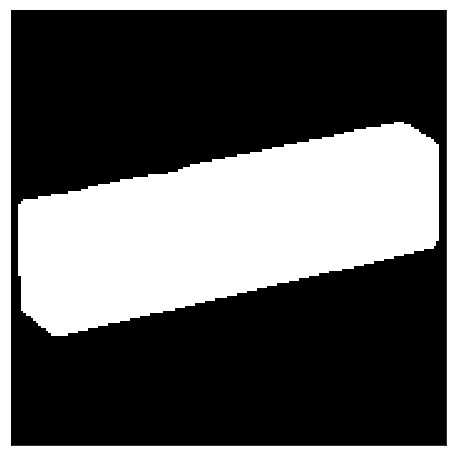

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_440.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_101.png


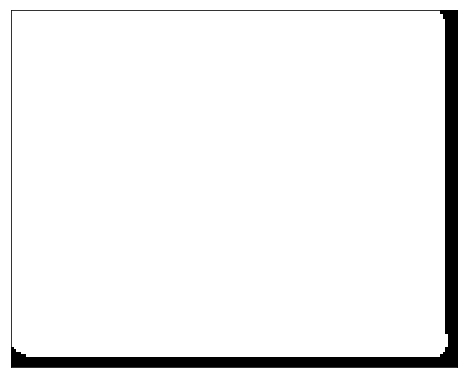

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_101.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_423.png


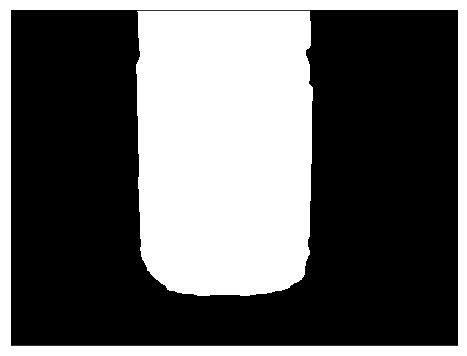

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_423.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_175.png


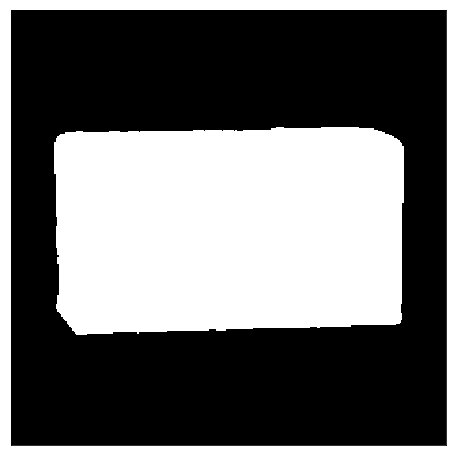

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_175.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_014.png


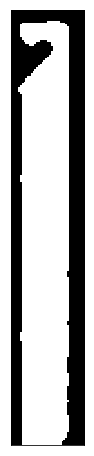

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_014.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_437.png


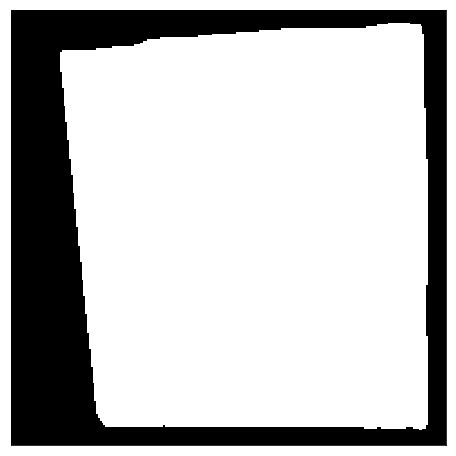

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_437.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_011.png


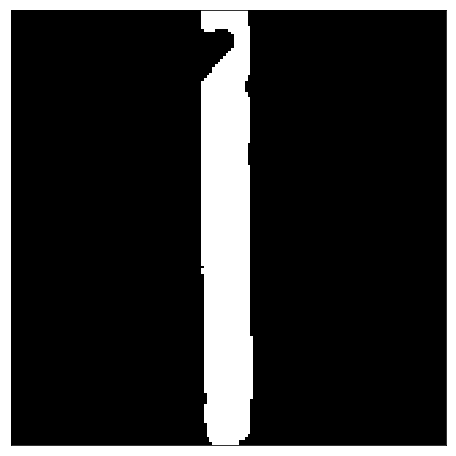

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_011.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_363.png


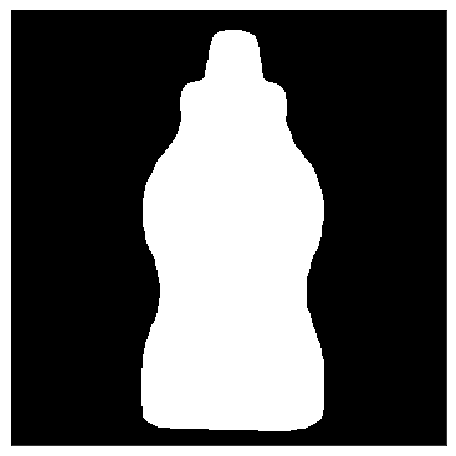

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_363.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_273.png


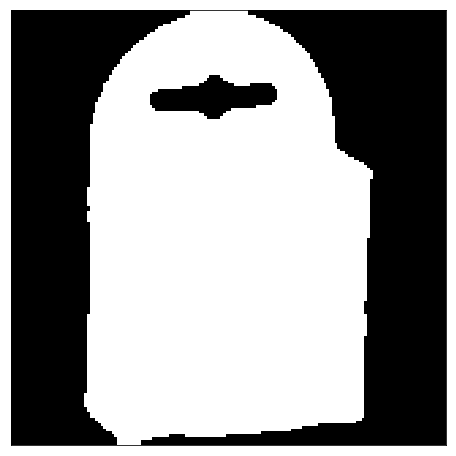

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_273.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_403.png


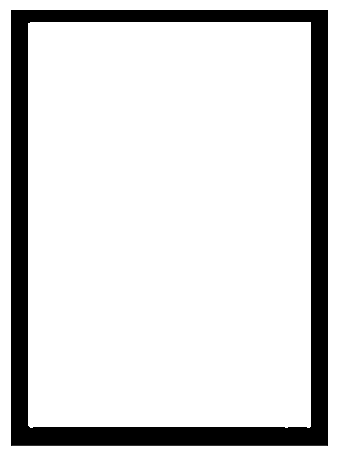

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_403.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_432.png


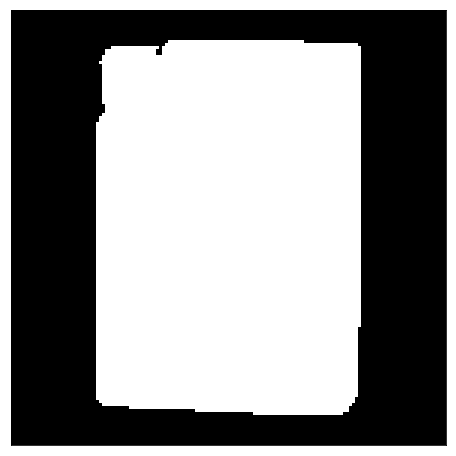

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_432.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_229.png


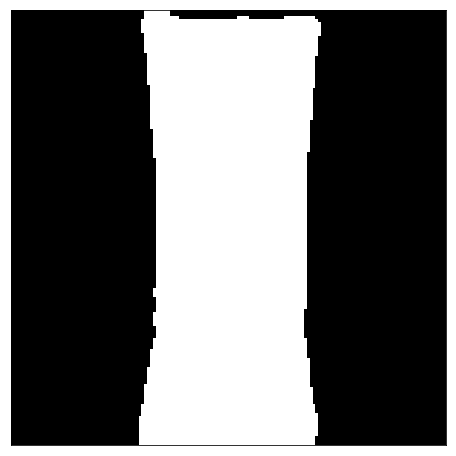

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_229.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_013.png


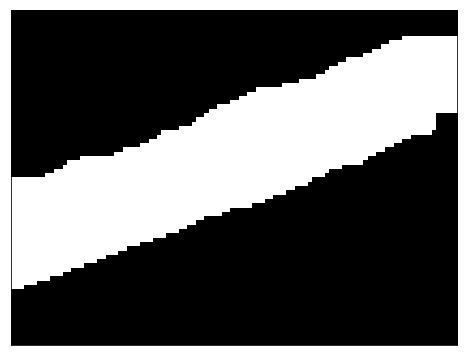

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_013.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_445.png


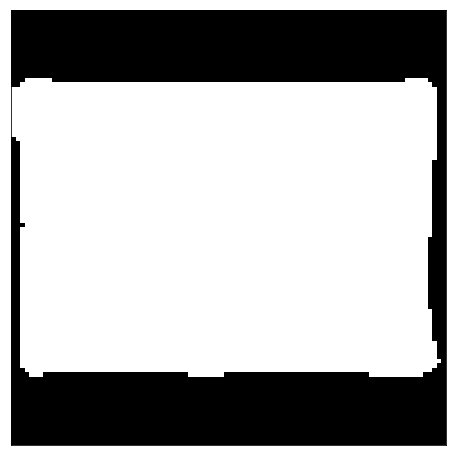

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_445.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_006.png


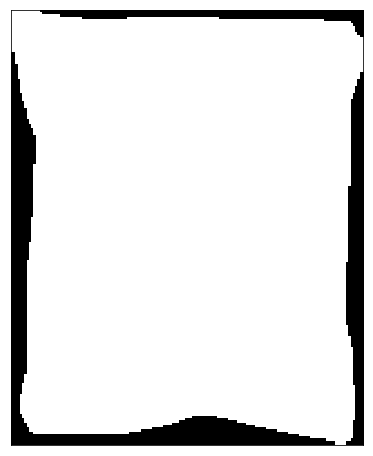

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_006.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_299.png


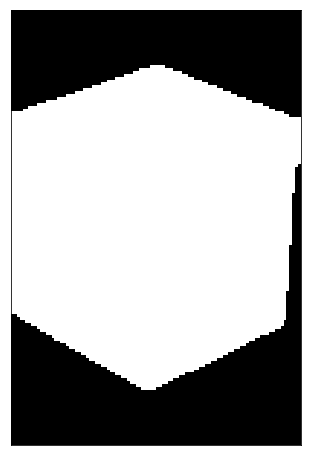

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_299.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_308.png


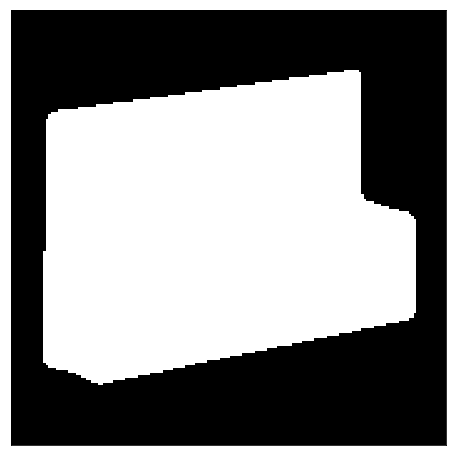

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_308.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_340.png


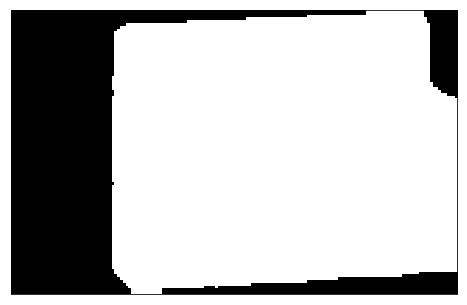

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_340.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_190.png


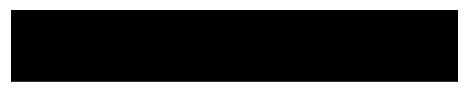

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_190.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_016.png


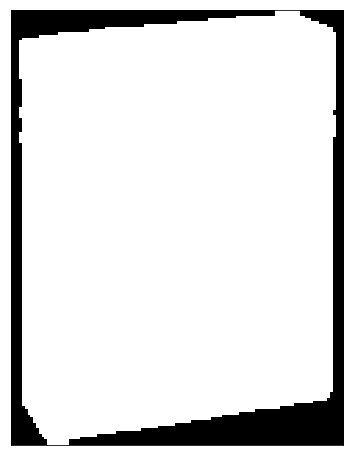

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_016.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_060.png


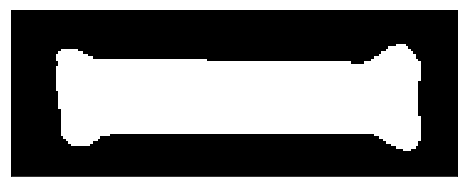

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_060.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_303.png


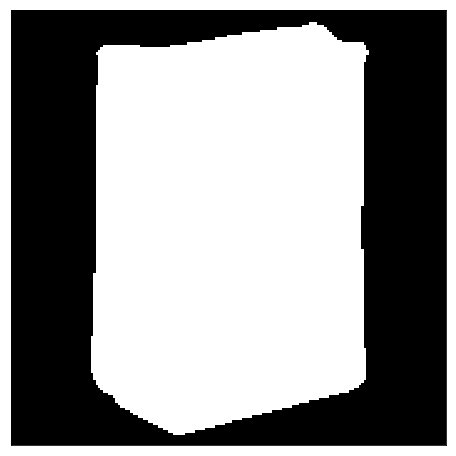

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_303.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_201.png


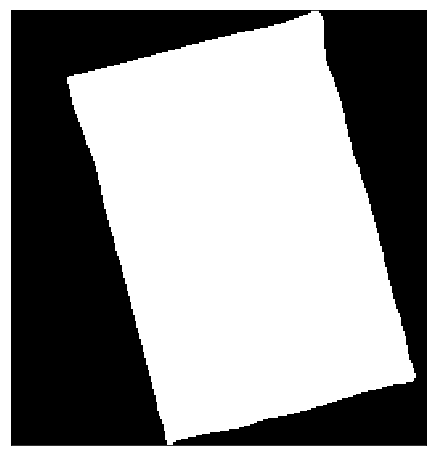

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_201.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_180.png


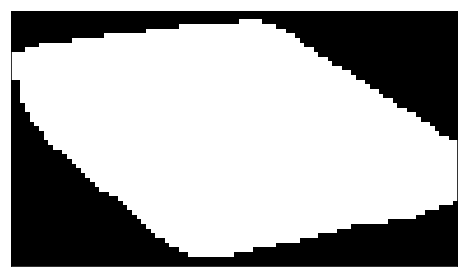

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_180.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_064.png


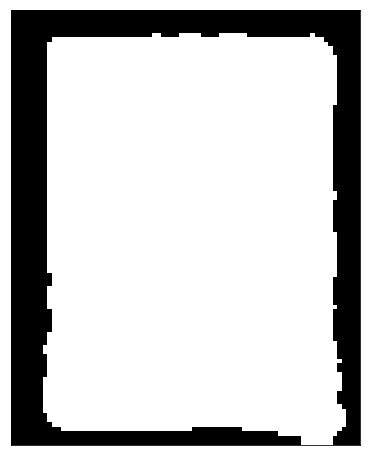

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_064.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_090.png


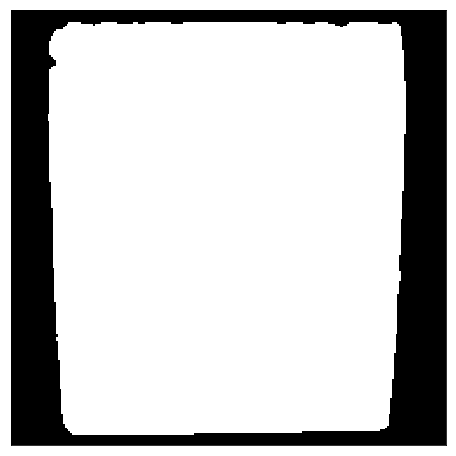

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_090.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_309.png


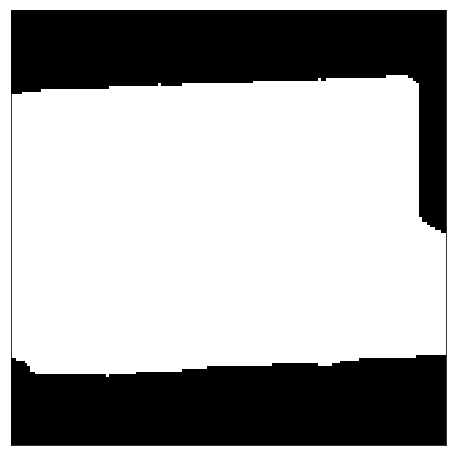

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_309.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_157.png


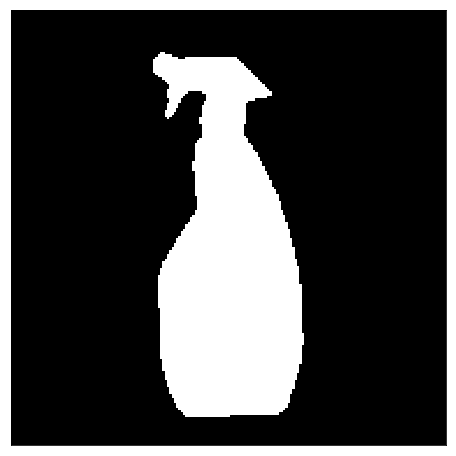

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_157.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_291.png


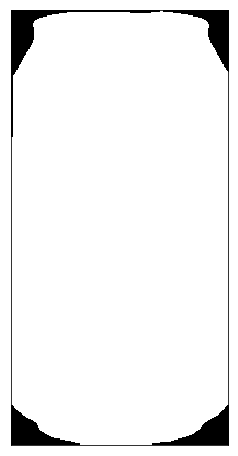

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_291.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_249.png


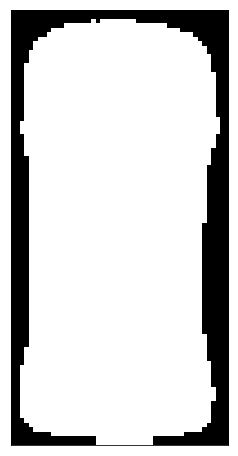

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_249.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_371.png


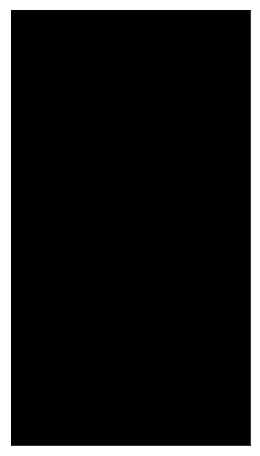

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_371.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_112.png


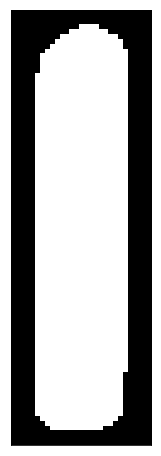

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_112.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_082.png


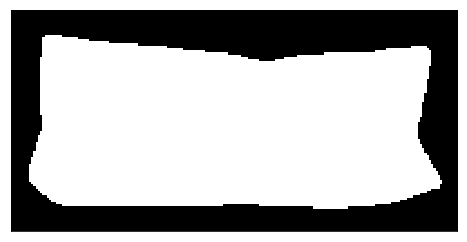

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_082.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_133.png


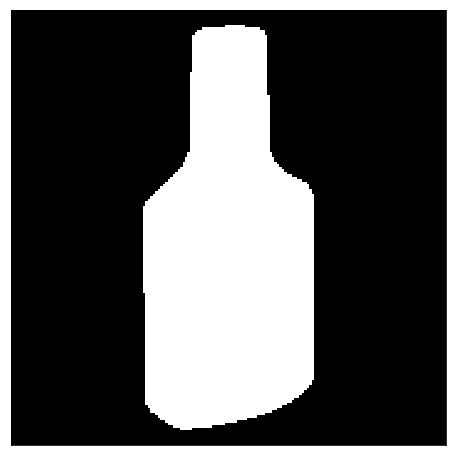

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_133.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_449.png


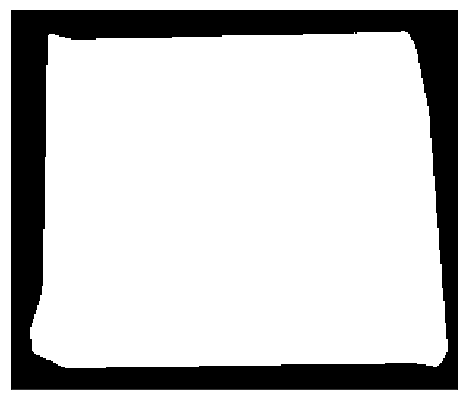

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_449.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_186.png


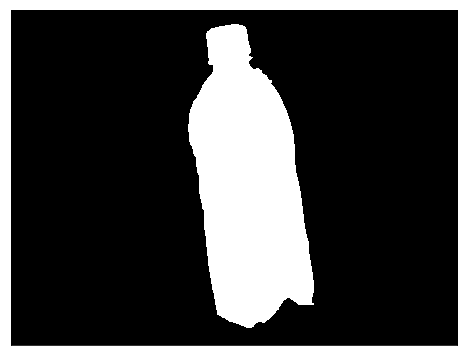

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_186.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_411.png


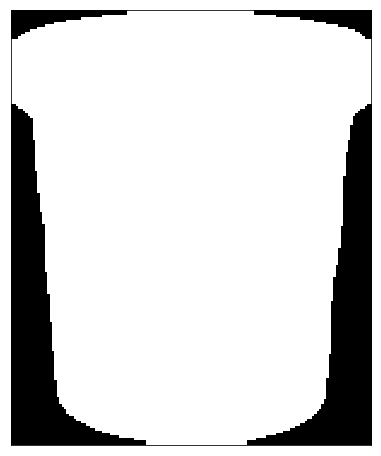

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_411.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_292.png


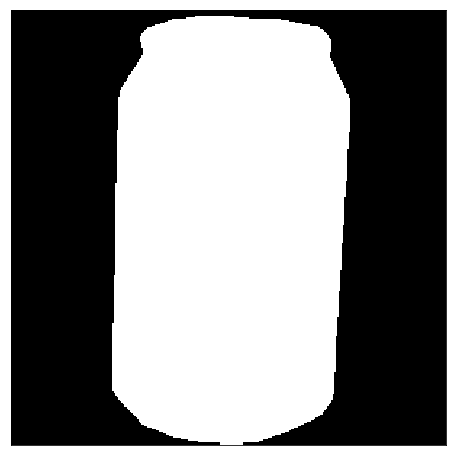

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_292.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_145.png


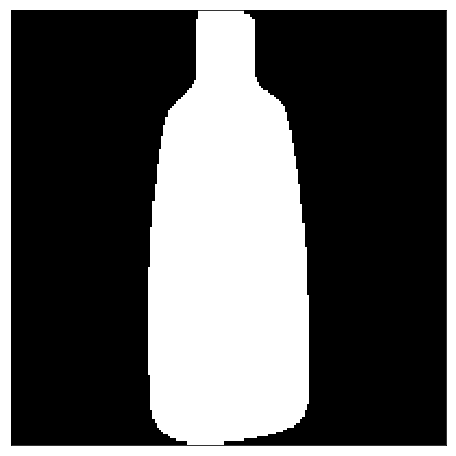

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_145.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_149.png


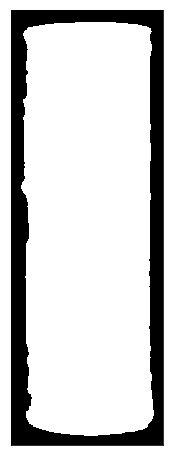

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_149.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_081.png


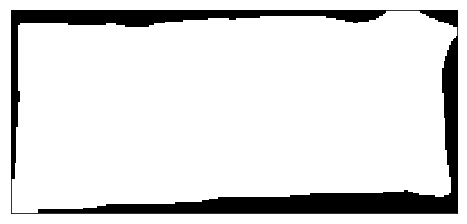

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_081.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_430.png


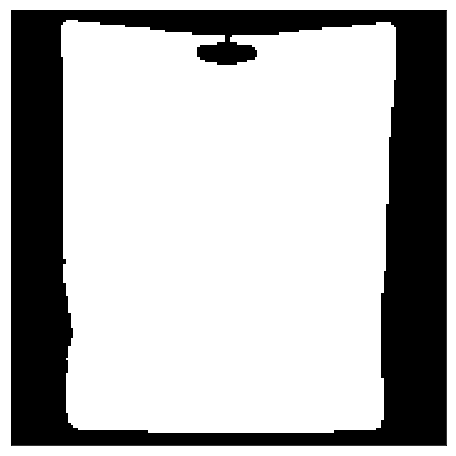

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_430.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_278.png


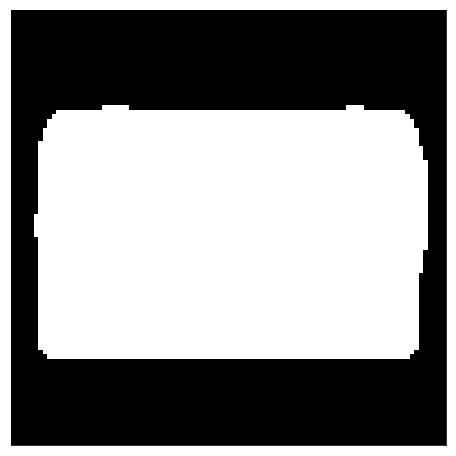

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_278.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_072.png


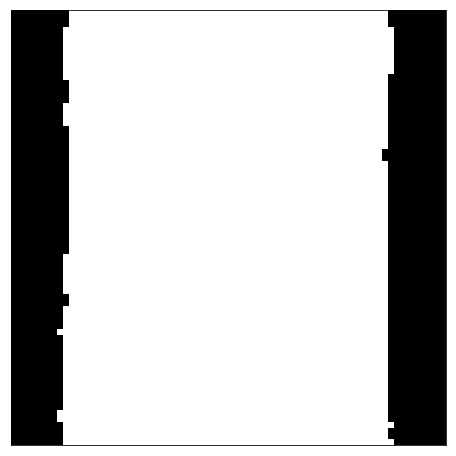

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_072.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_275.png


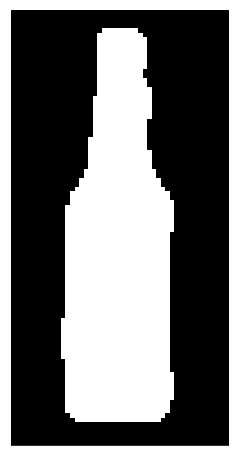

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_275.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_378.png


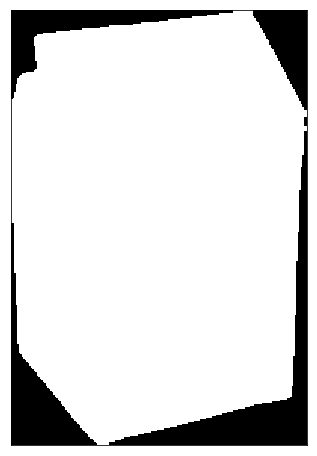

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_378.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_029.png


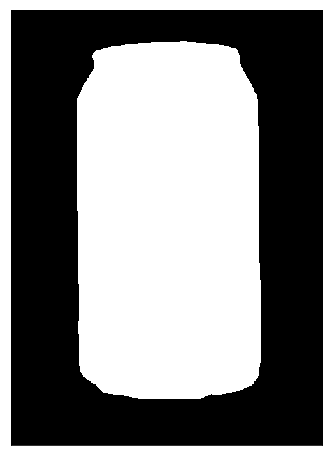

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_029.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_386.png


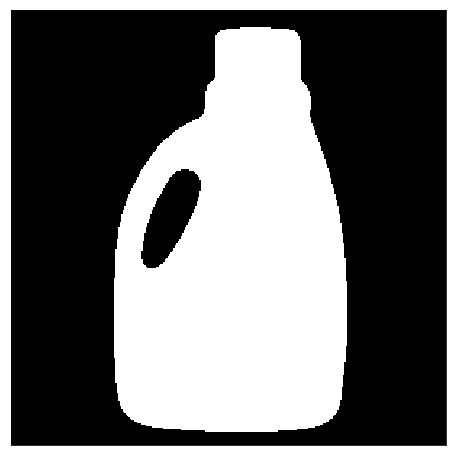

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_386.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_405.png


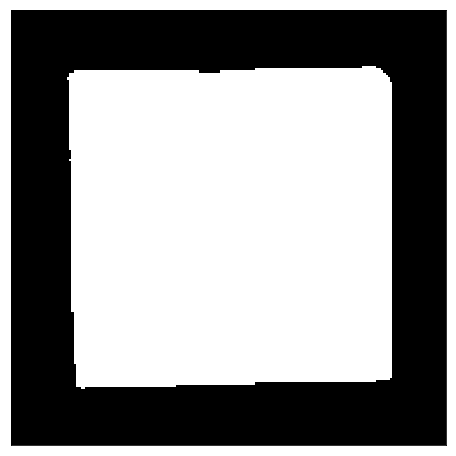

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_405.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_245.png


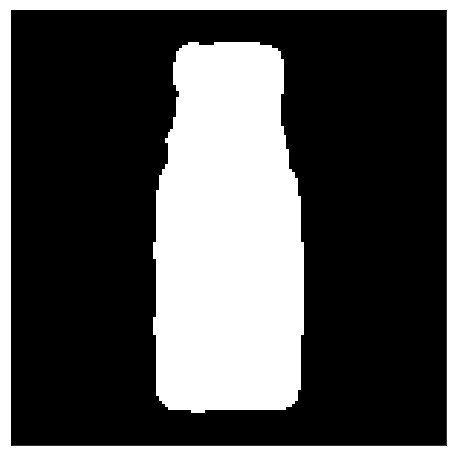

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_245.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_243.png


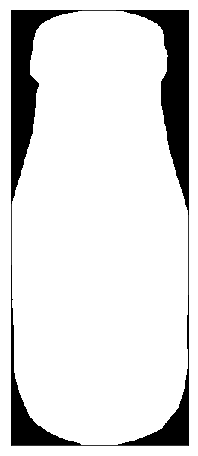

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_243.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_032.png


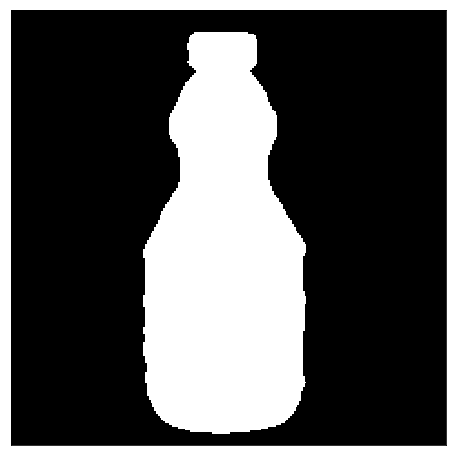

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_032.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_330.png


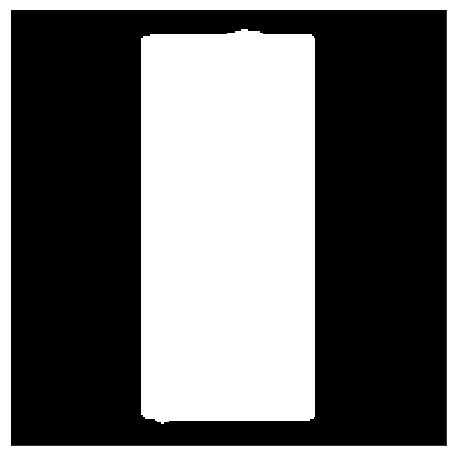

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_330.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_200.png


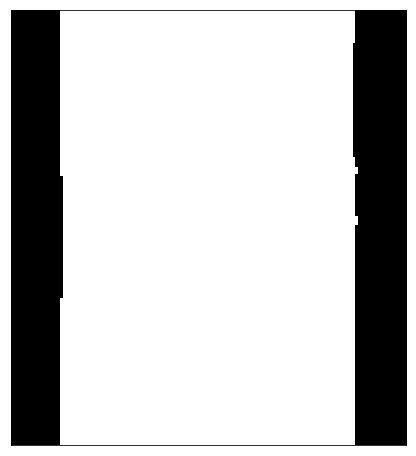

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_200.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_327.png


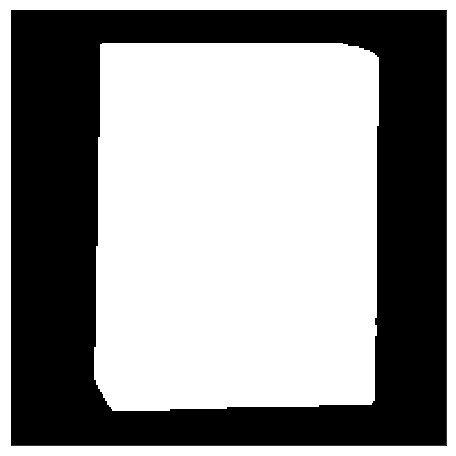

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_327.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_074.png


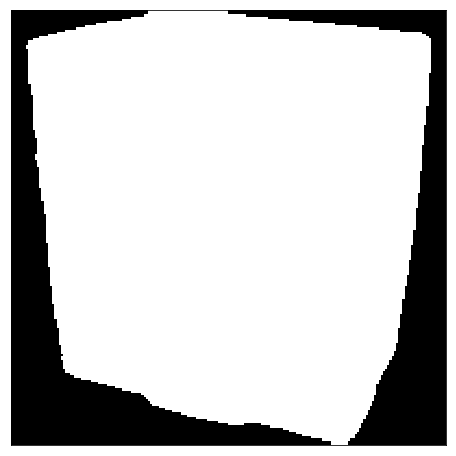

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_074.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_116.png


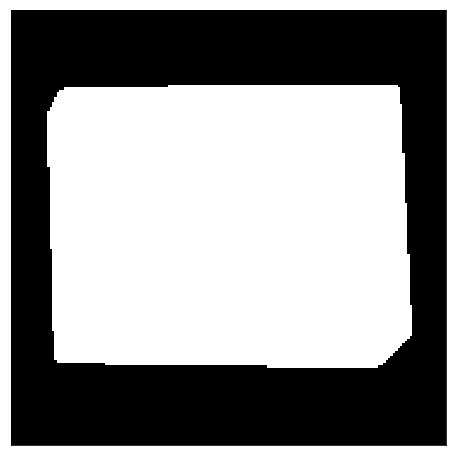

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_116.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_143.png


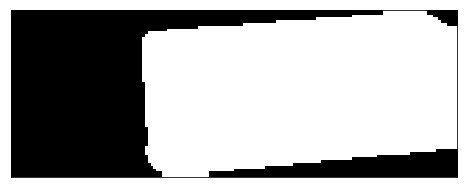

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_143.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_470.png


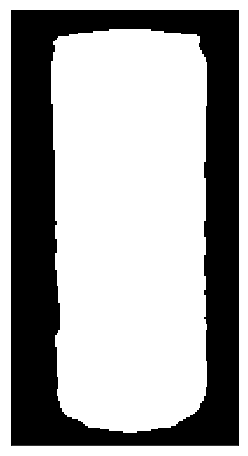

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_470.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_021.png


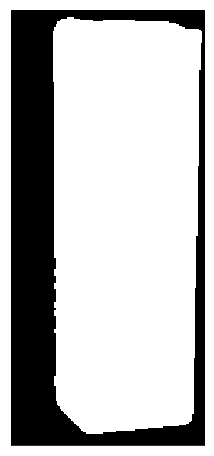

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_021.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_156.png


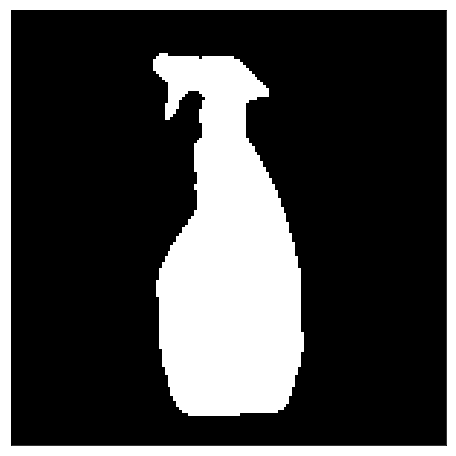

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_156.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_193.png


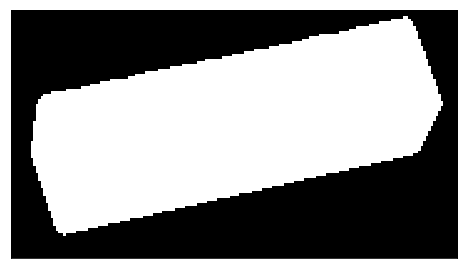

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_193.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_189.png


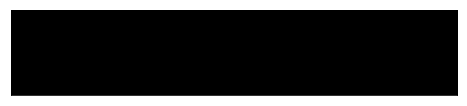

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_189.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_453.png


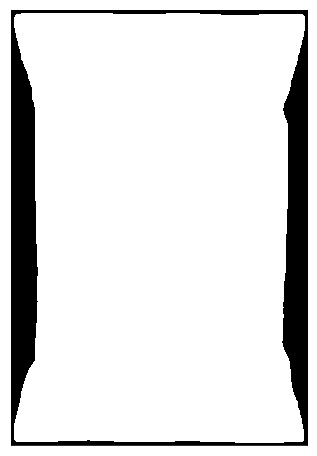

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_453.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_337.png


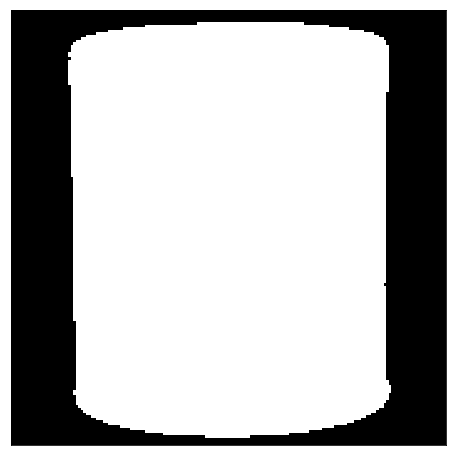

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_337.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_256.png


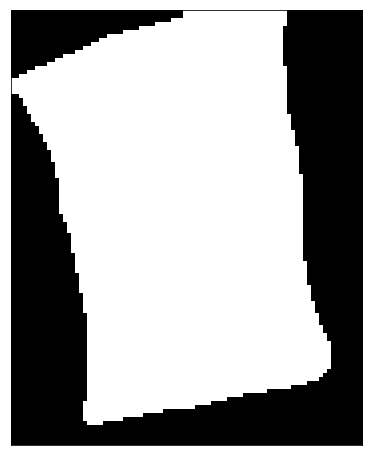

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_256.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_316.png


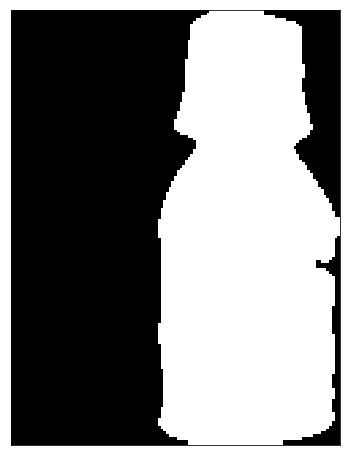

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_316.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_107.png


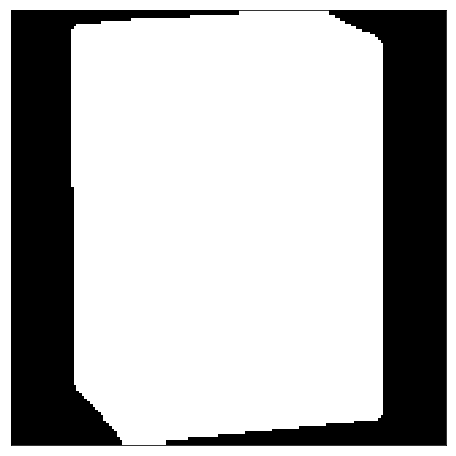

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_107.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_228.png


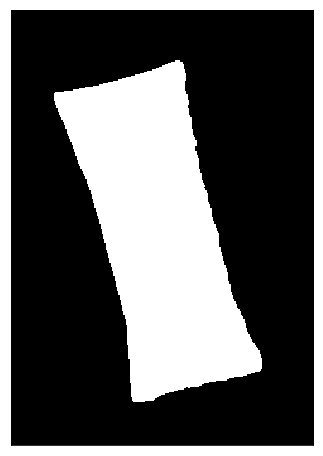

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_228.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_191.png


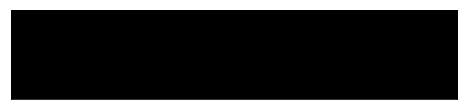

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_191.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_138.png


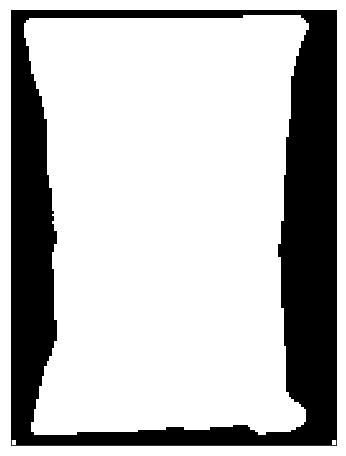

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_138.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_288.png


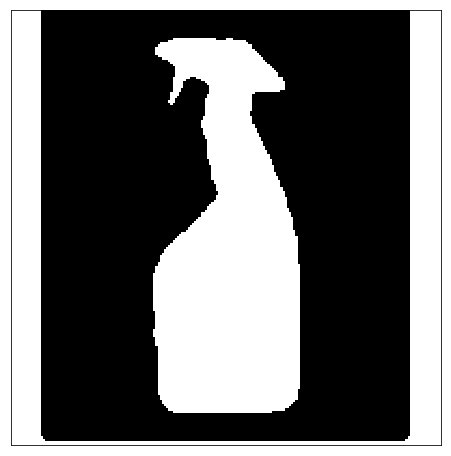

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_288.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_181.png


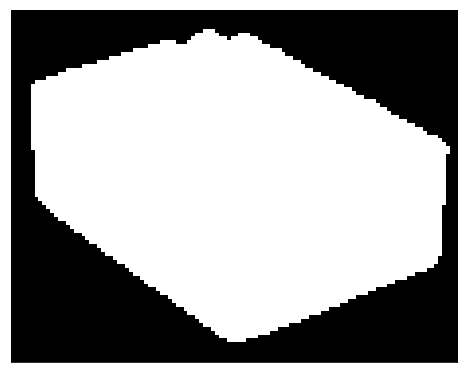

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_181.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_283.png


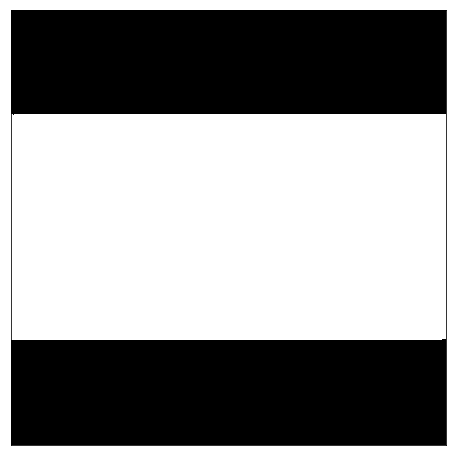

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_283.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_202.png


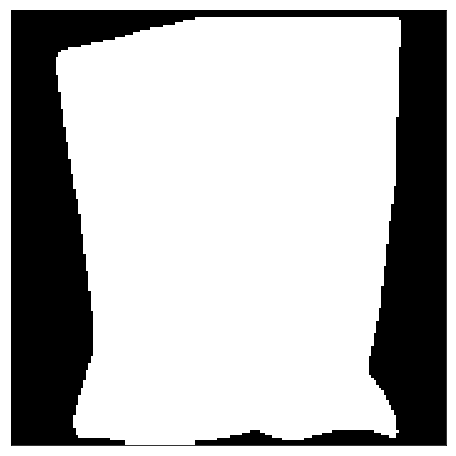

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_202.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_010.png


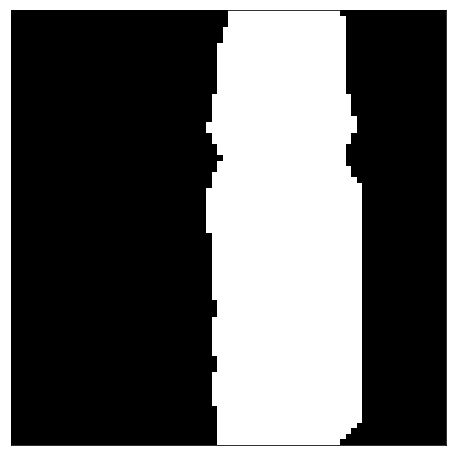

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_010.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_093.png


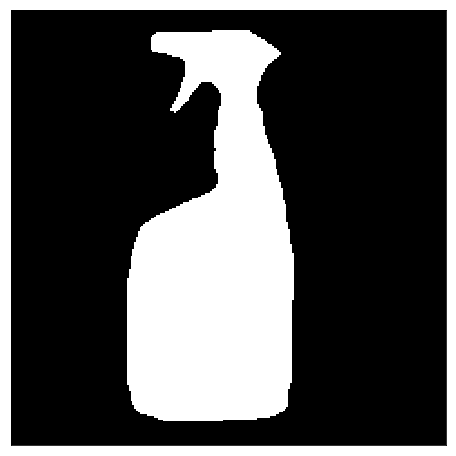

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_093.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_426.png


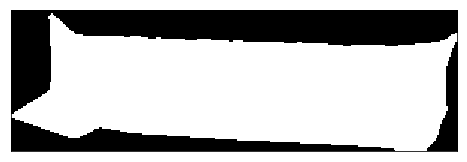

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_426.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_227.png


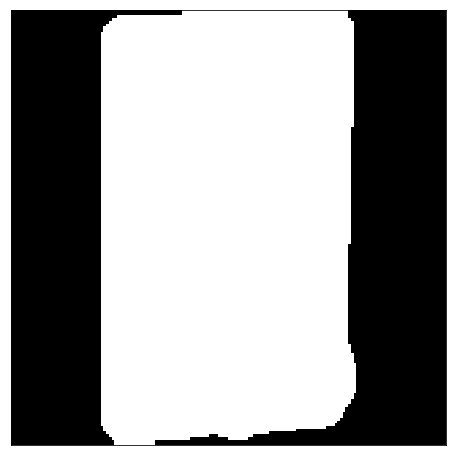

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_227.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_043.png


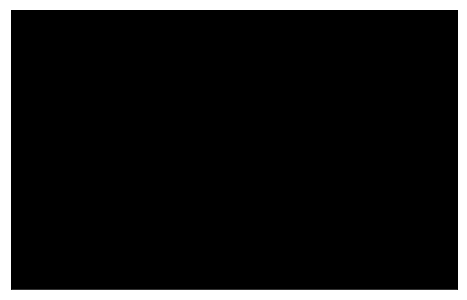

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_043.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_125.png


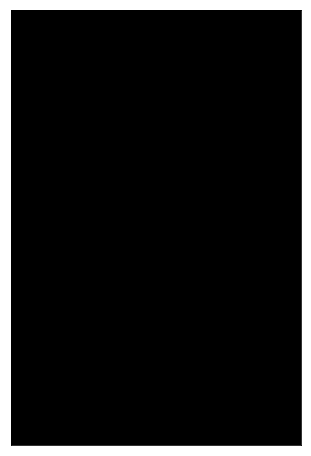

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_125.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_111.png


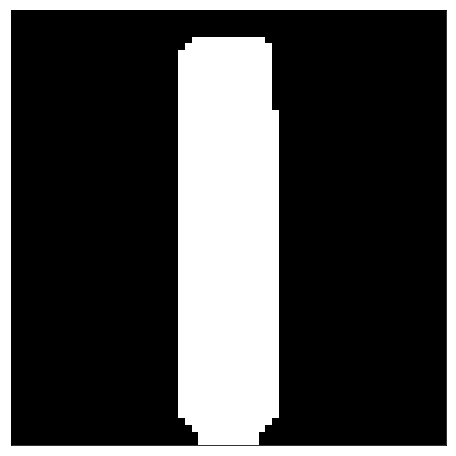

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_111.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_054.png


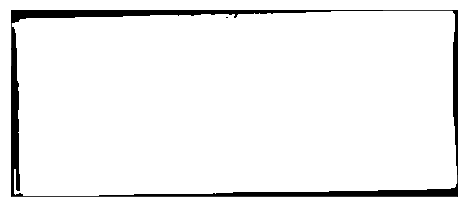

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_054.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_038.png


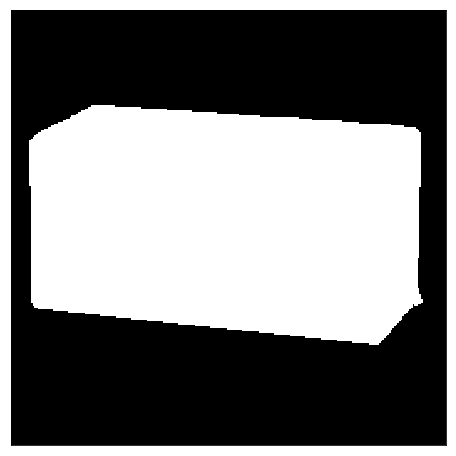

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_038.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_062.png


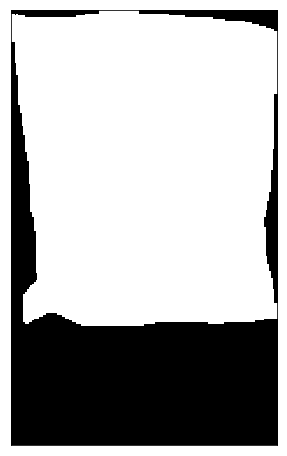

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_062.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_162.png


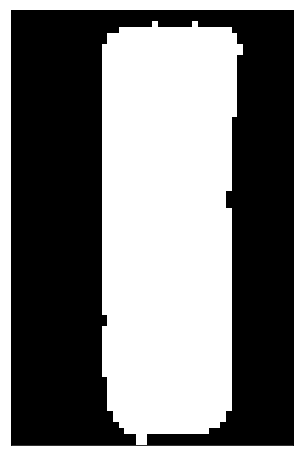

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_162.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_394.png


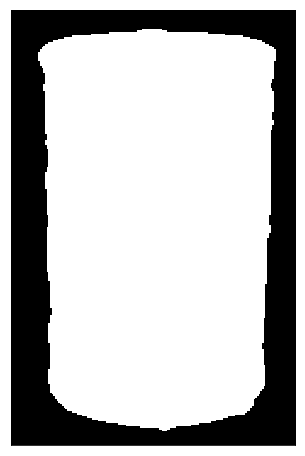

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_394.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_388.png


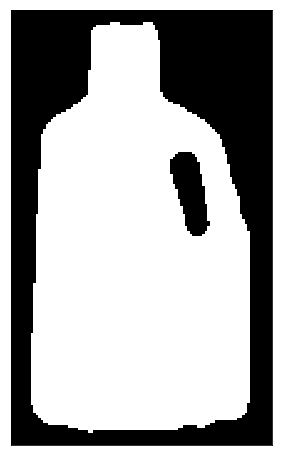

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_388.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_012.png


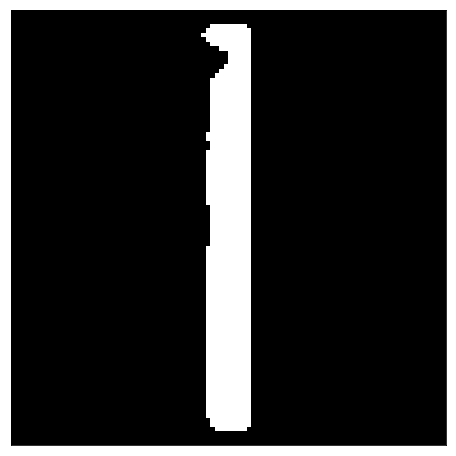

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_012.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_372.png


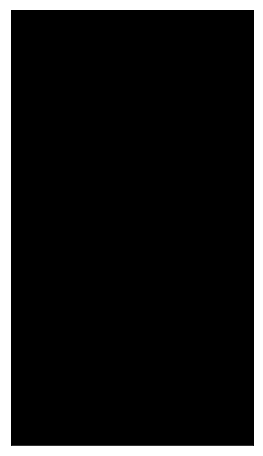

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_372.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_266.png


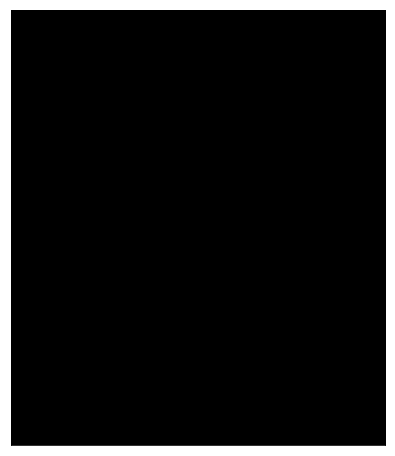

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_266.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_052.png


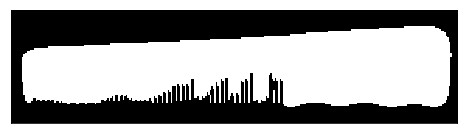

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_052.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_205.png


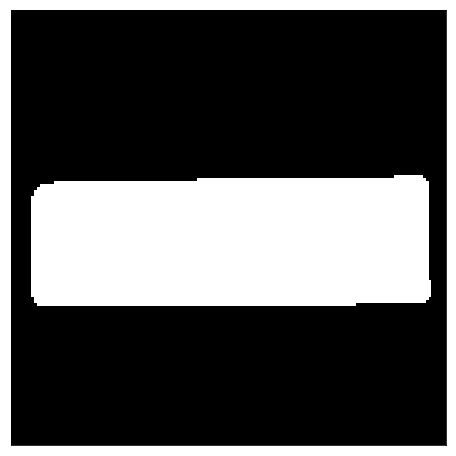

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_205.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_216.png


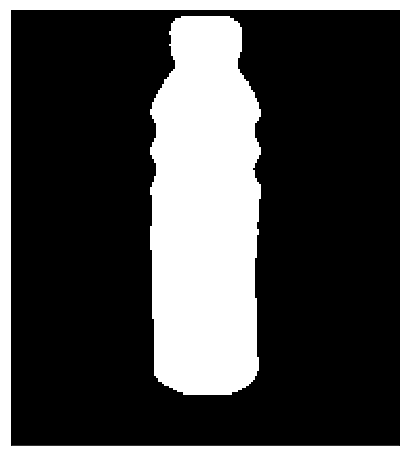

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_216.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_063.png


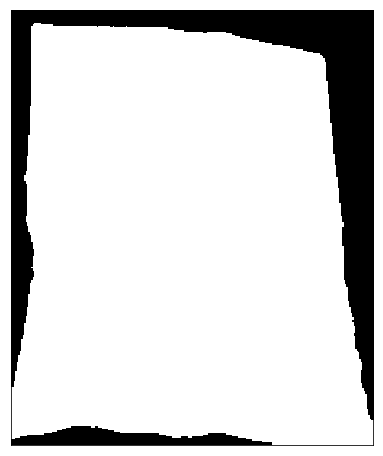

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_063.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_320.png


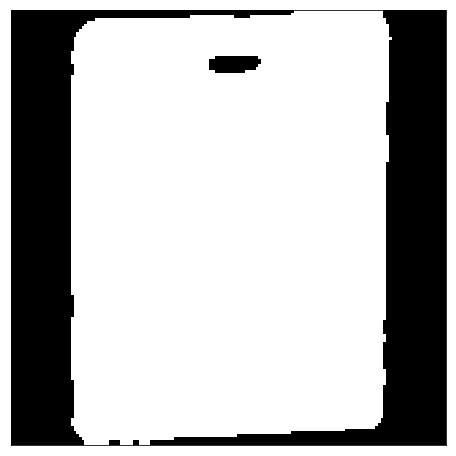

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_320.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_410.png


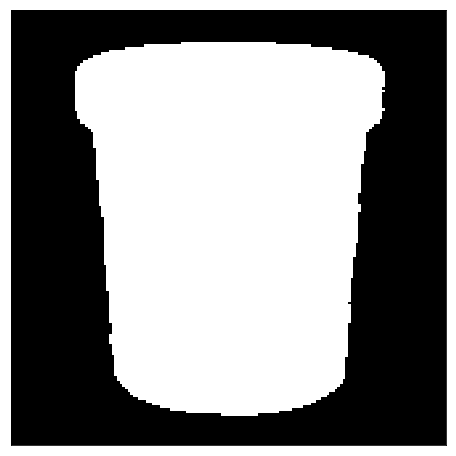

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_410.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_355.png


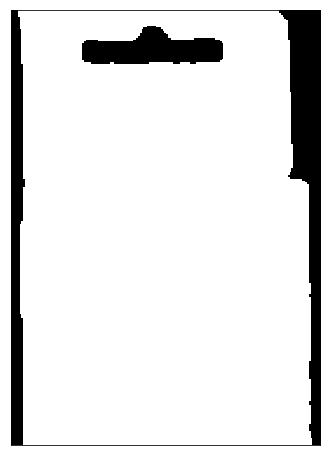

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_355.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_415.png


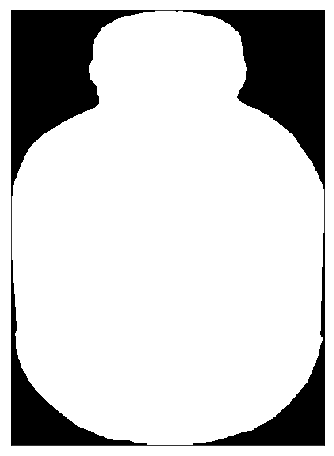

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_415.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_298.png


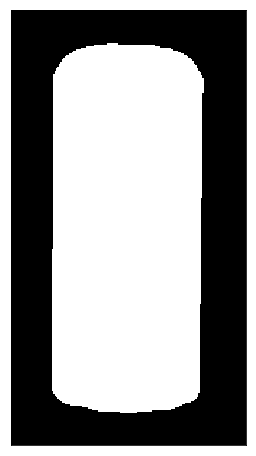

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_298.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_196.png


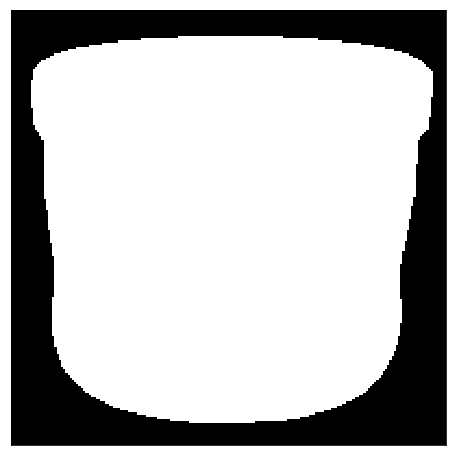

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_196.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_350.png


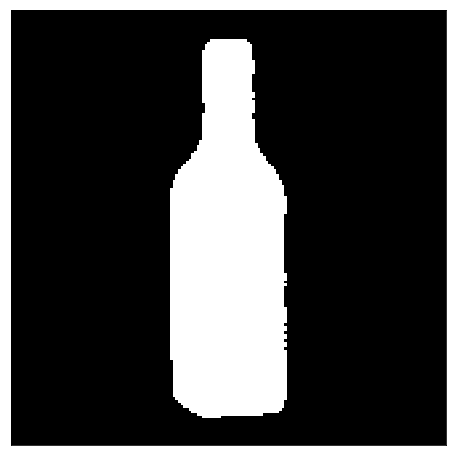

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_350.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_150.png


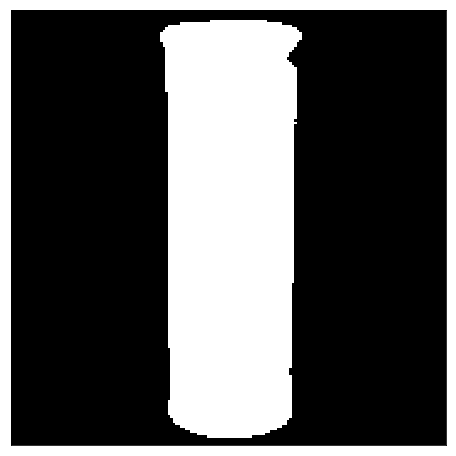

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_150.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_279.png


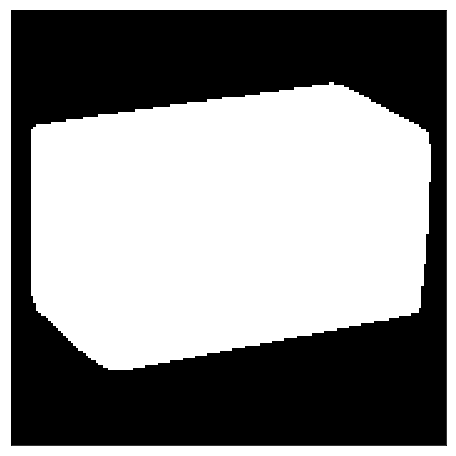

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_279.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_152.png


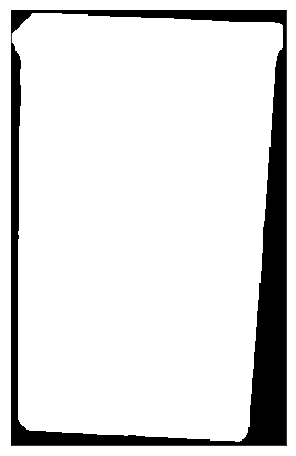

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_152.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_428.png


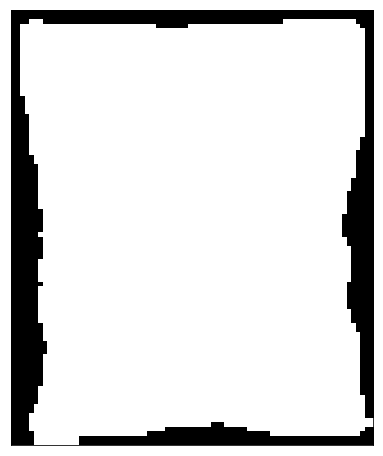

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_428.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_368.png


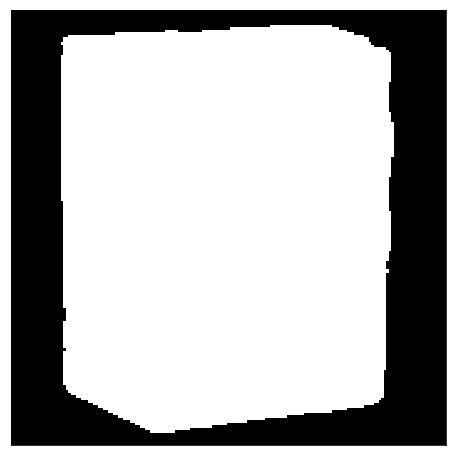

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_368.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_030.png


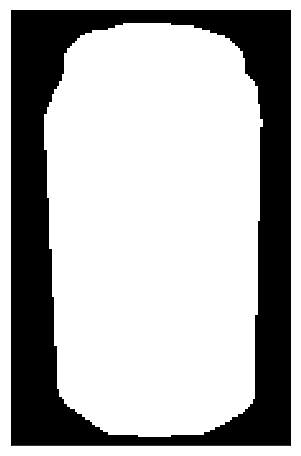

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_030.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_212.png


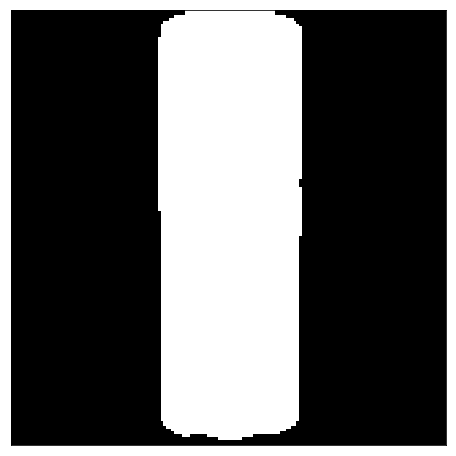

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_212.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_065.png


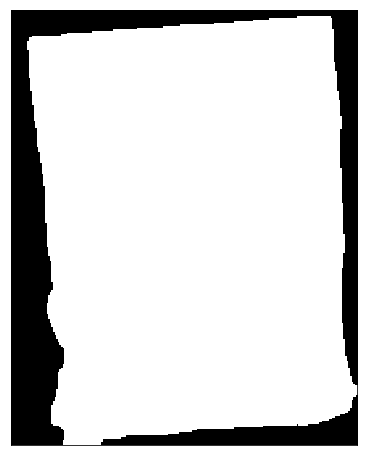

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_065.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_395.png


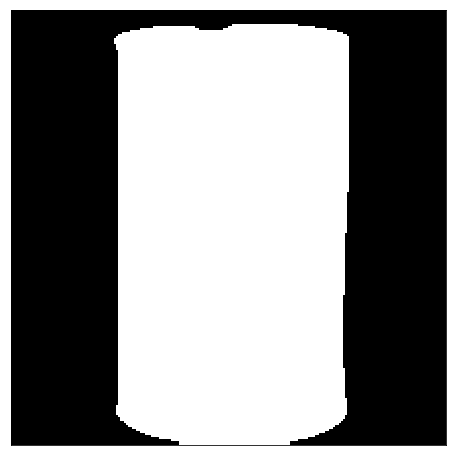

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_395.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_390.png


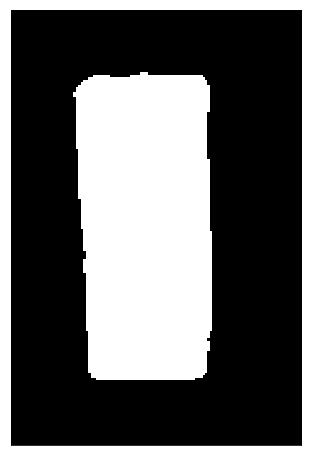

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_390.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_165.png


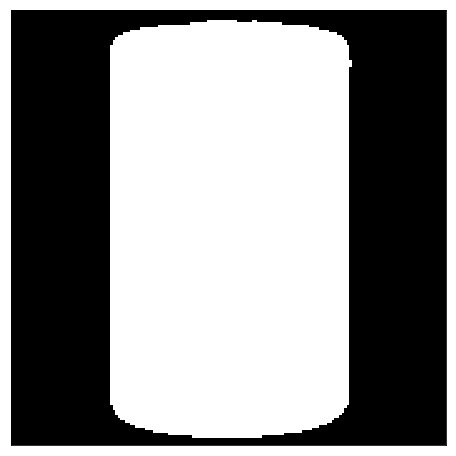

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_165.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_047.png


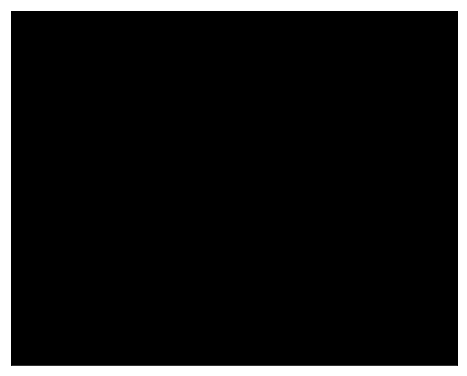

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_047.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_217.png


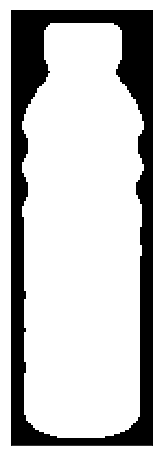

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_217.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_352.png


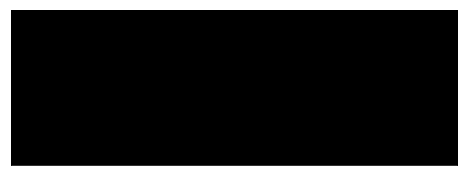

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_352.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_034.png


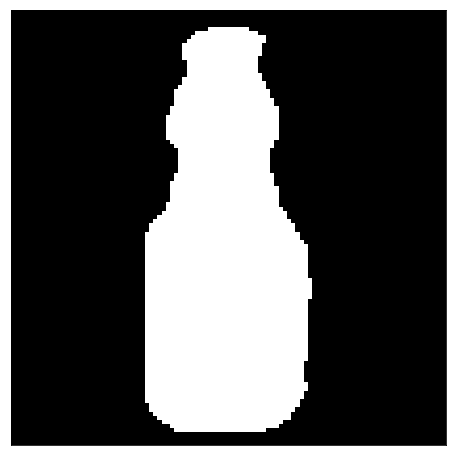

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_034.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_022.png


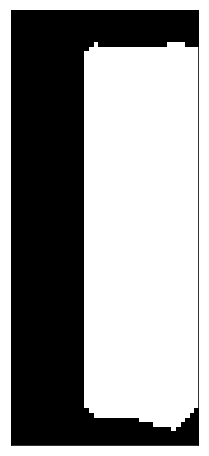

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_022.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_128.png


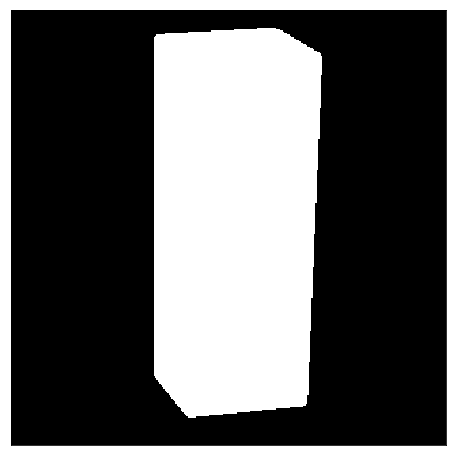

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_128.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_341.png


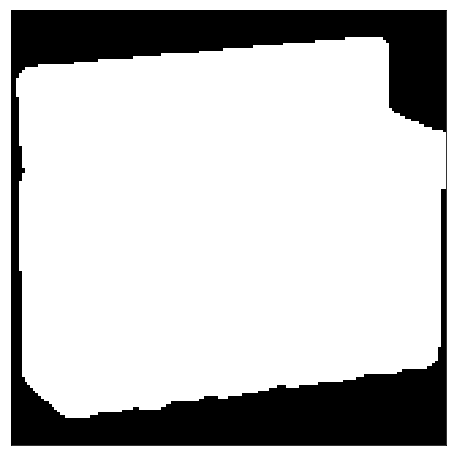

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_341.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_075.png


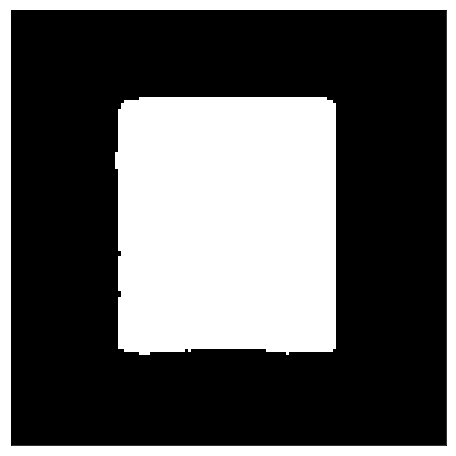

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_075.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_346.png


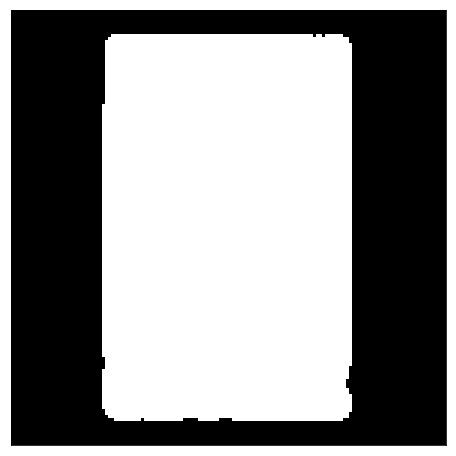

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_346.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_333.png


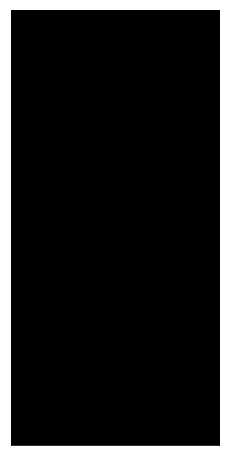

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_333.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_118.png


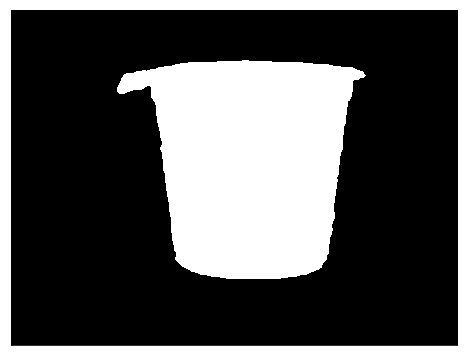

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_118.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_239.png


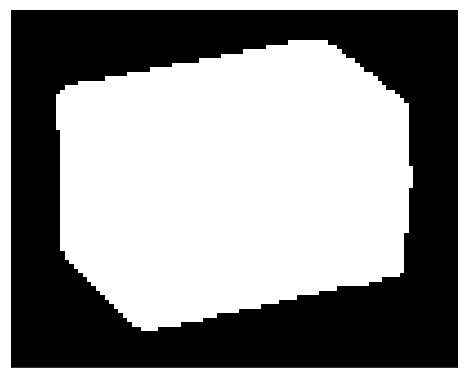

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_239.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_182.png


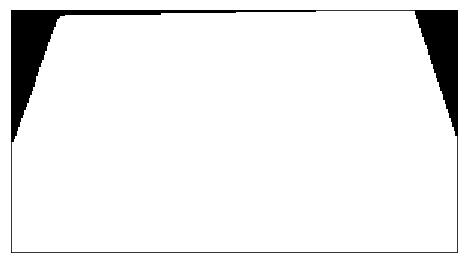

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_182.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_419.png


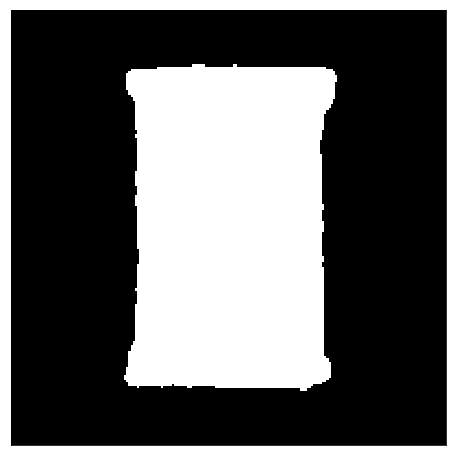

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_419.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_385.png


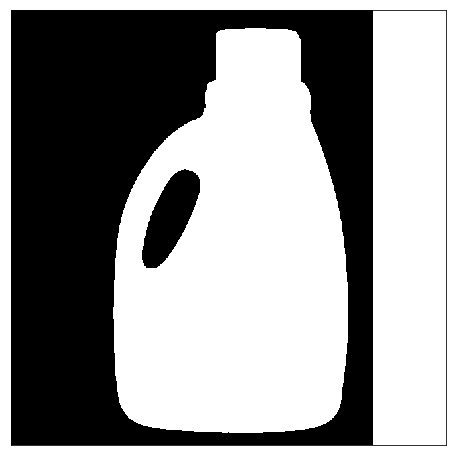

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_385.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_221.png


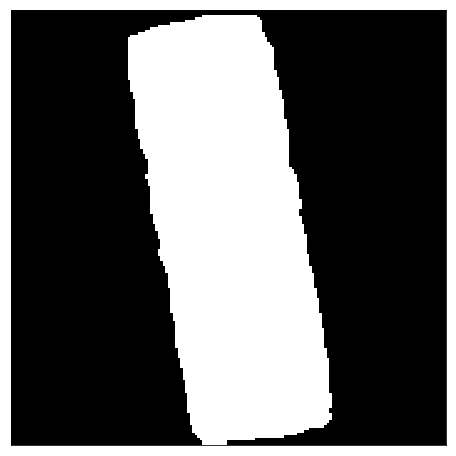

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_221.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_041.png


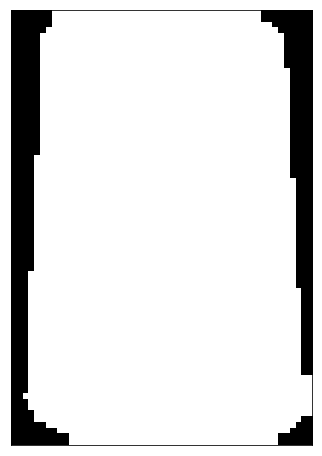

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_041.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_354.png


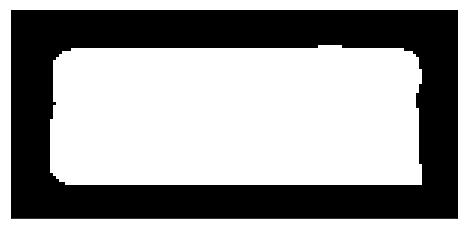

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_354.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_104.png


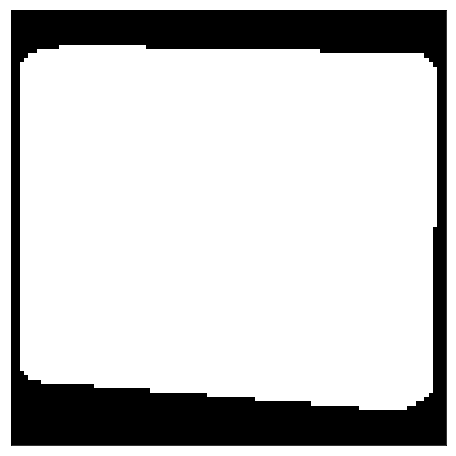

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_104.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_210.png


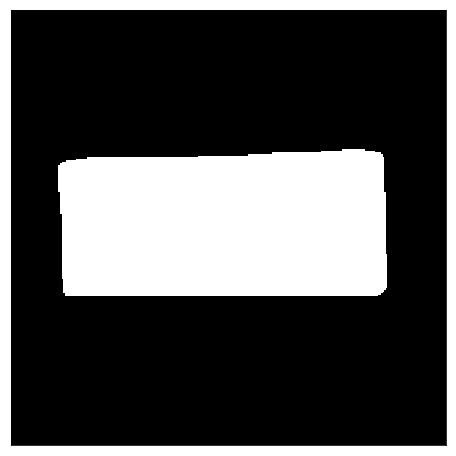

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_210.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_462.png


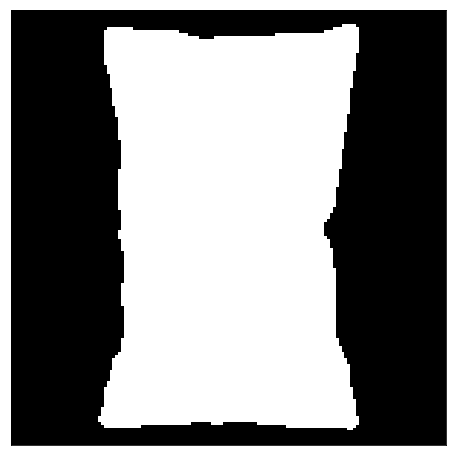

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_462.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_427.png


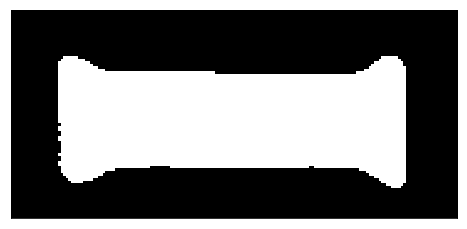

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_427.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_211.png


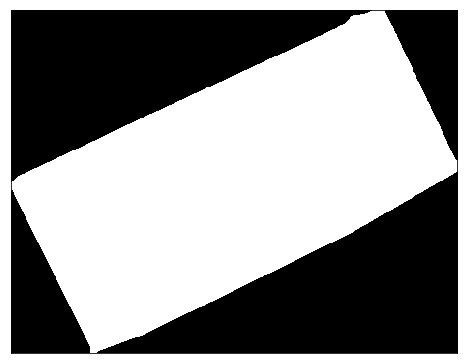

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_211.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_017.png


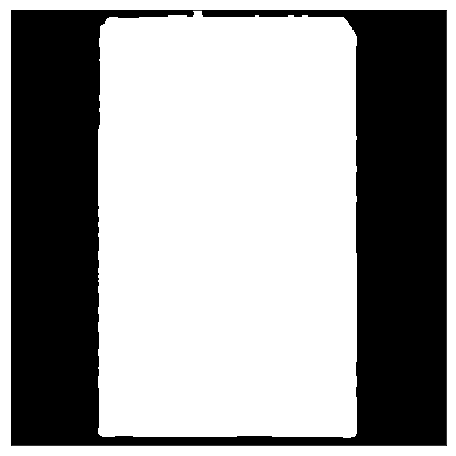

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_017.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_402.png


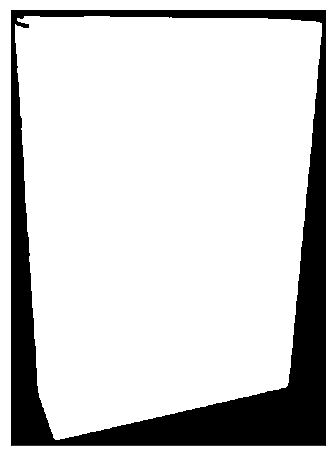

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_402.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_420.png


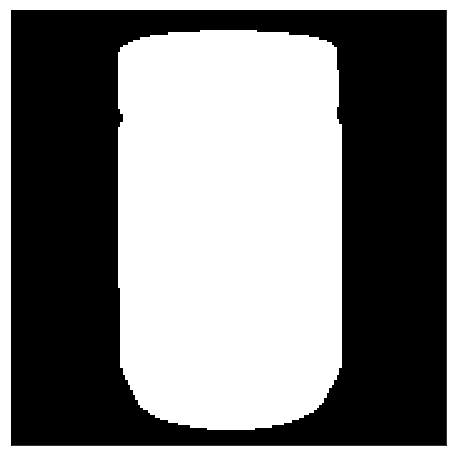

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_420.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_269.png


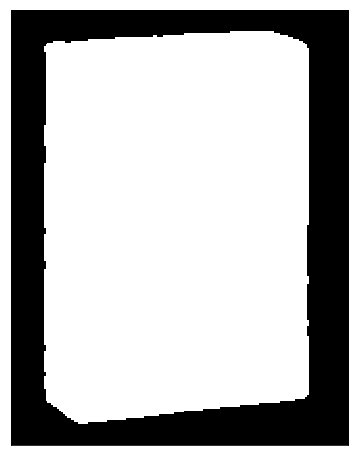

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_269.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_179.png


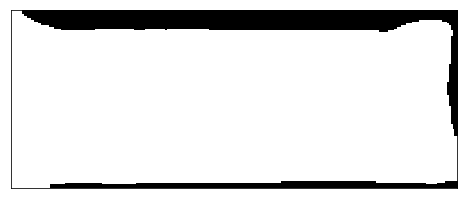

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_179.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_452.png


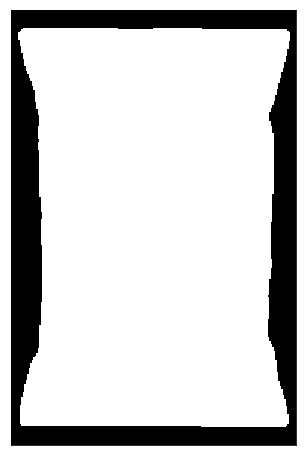

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_452.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_148.png


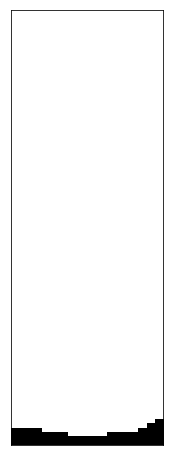

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_148.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_233.png


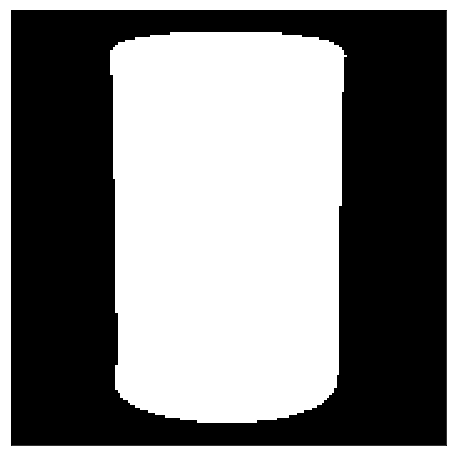

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_233.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_287.png


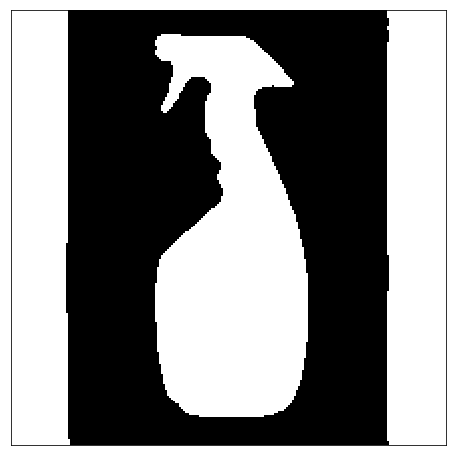

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_287.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_087.png


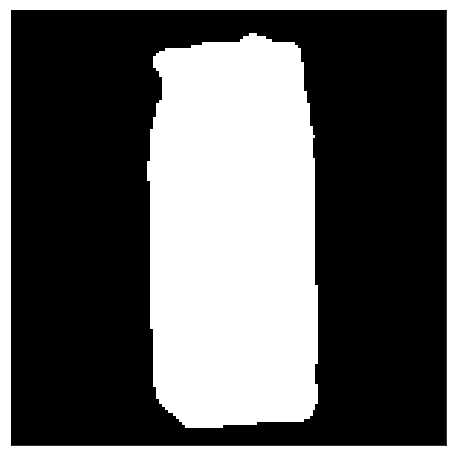

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_087.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_219.png


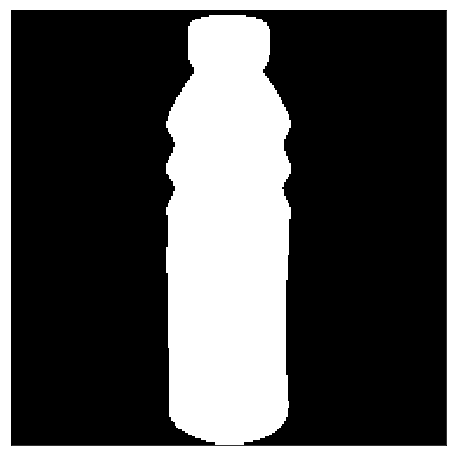

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_219.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_080.png


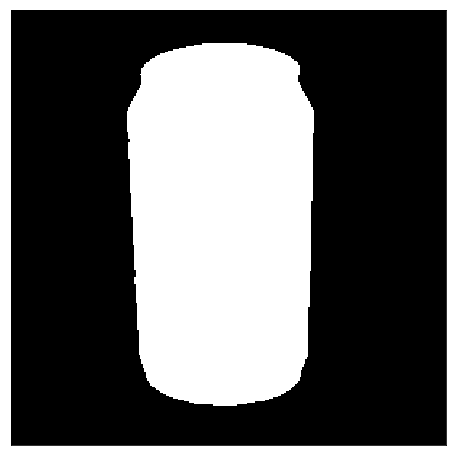

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_080.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_259.png


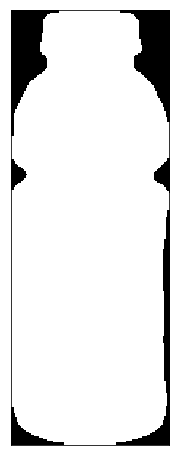

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_259.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_297.png


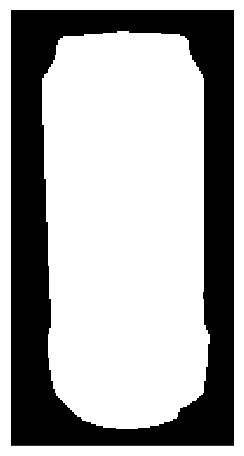

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_297.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_253.png


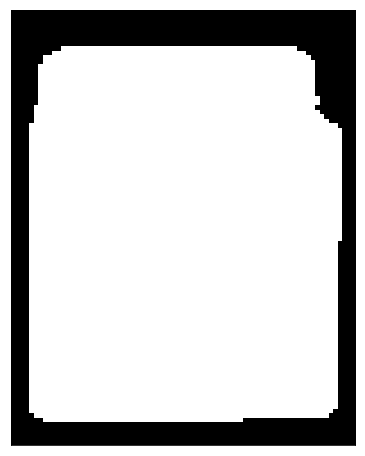

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_253.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_375.png


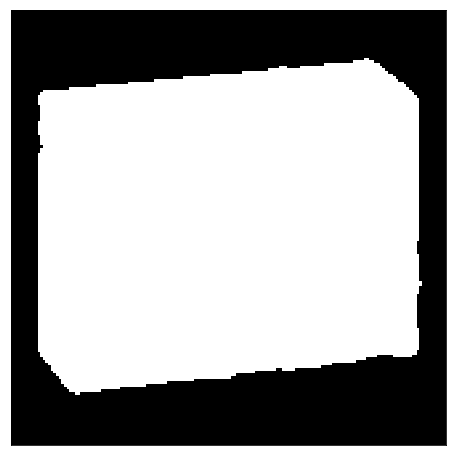

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_375.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_441.png


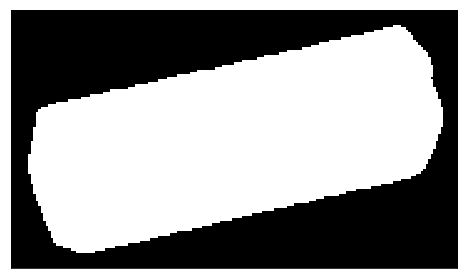

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_441.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_110.png


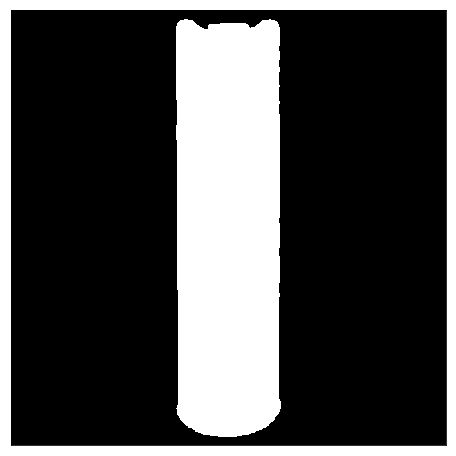

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_110.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_142.png


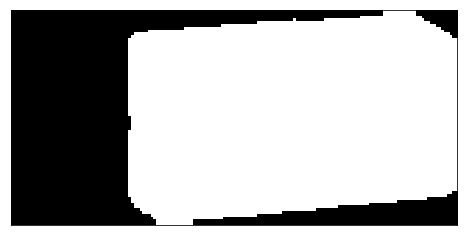

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_142.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_204.png


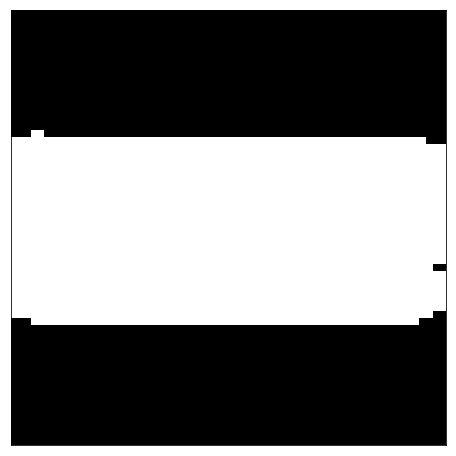

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_204.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_468.png


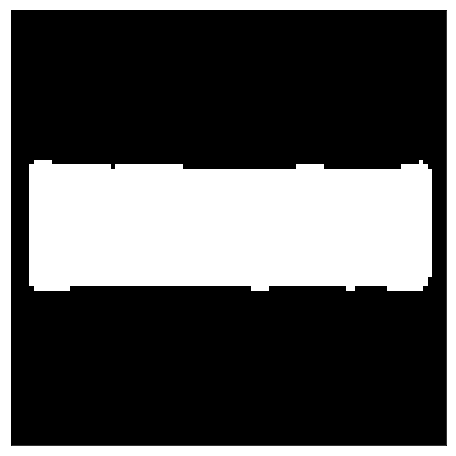

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_468.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_078.png


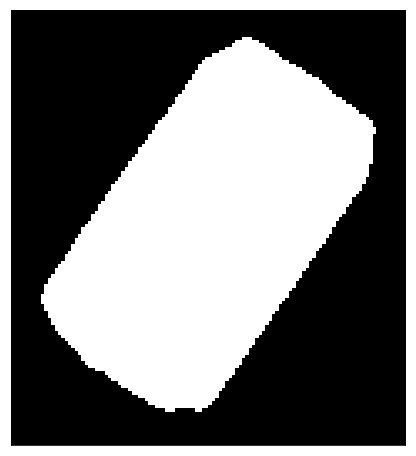

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_078.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_203.png


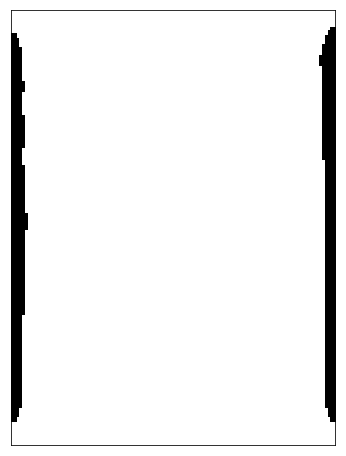

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_203.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_066.png


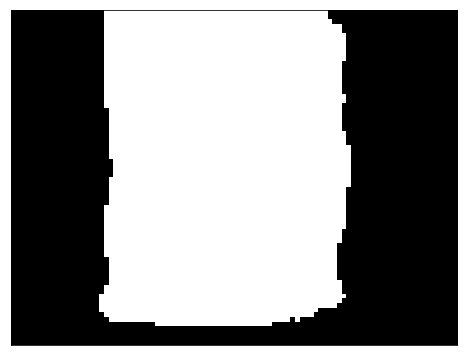

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_066.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_347.png


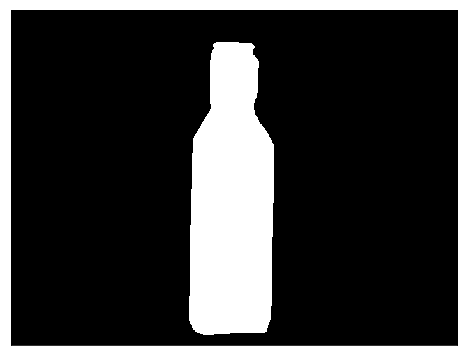

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_347.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_404.png


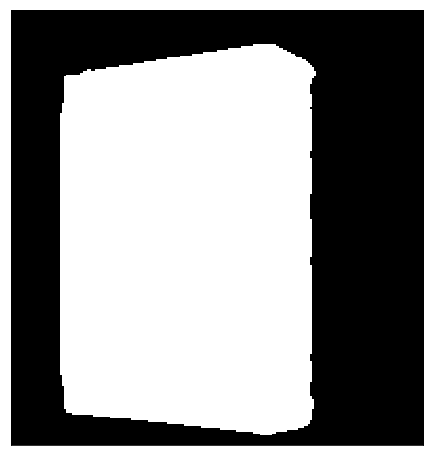

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_404.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_302.png


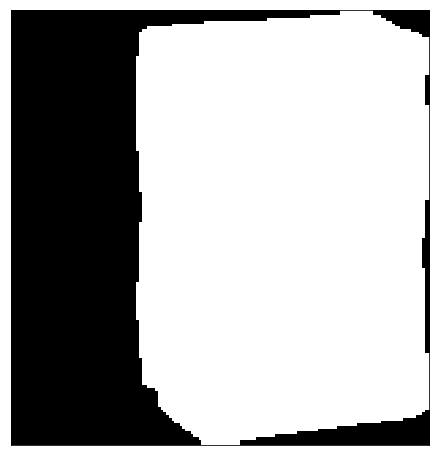

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_302.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_119.png


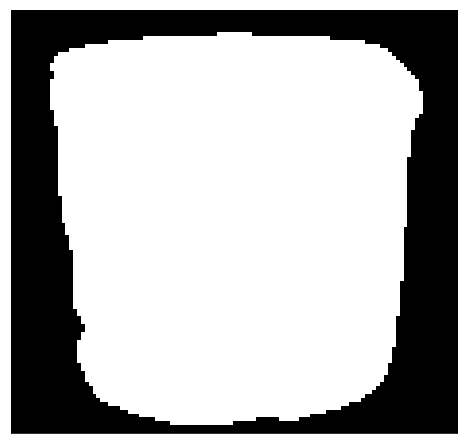

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_119.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_127.png


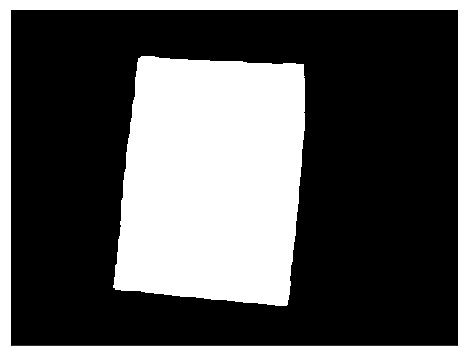

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_127.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_117.png


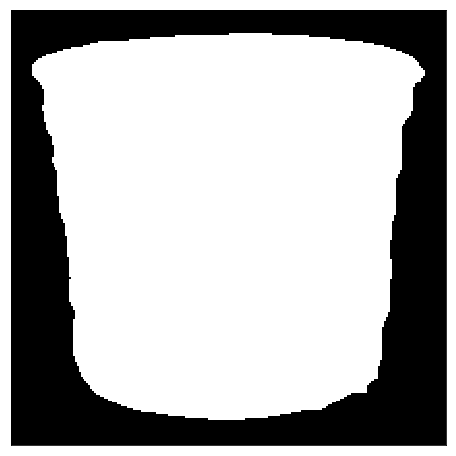

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_117.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_077.png


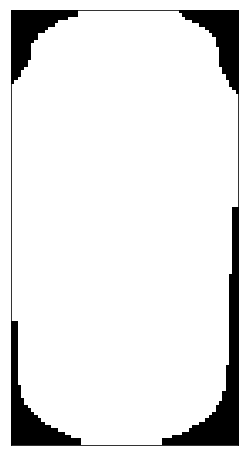

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_077.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_339.png


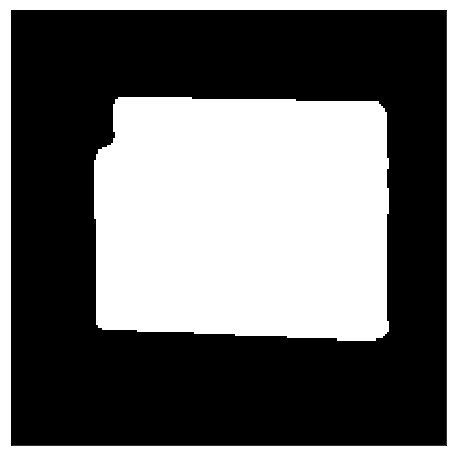

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_339.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_177.png


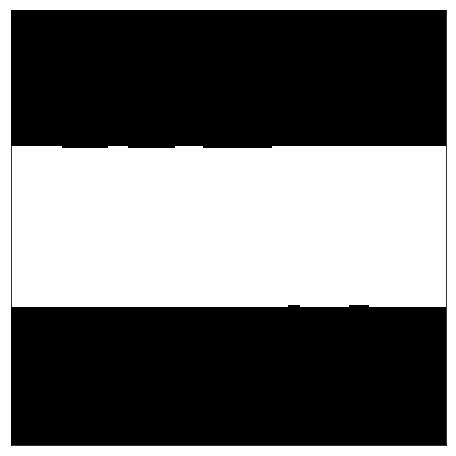

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_177.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_122.png


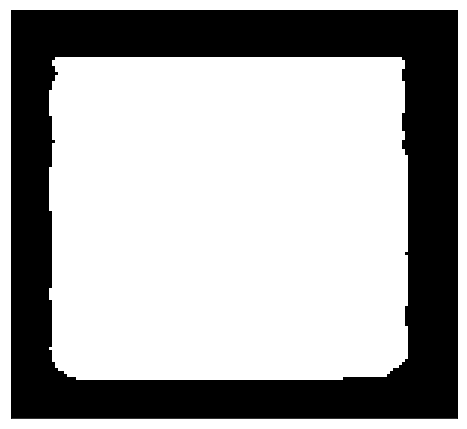

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_122.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_197.png


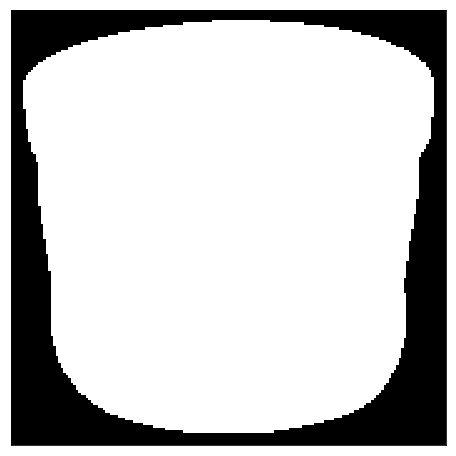

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_197.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_324.png


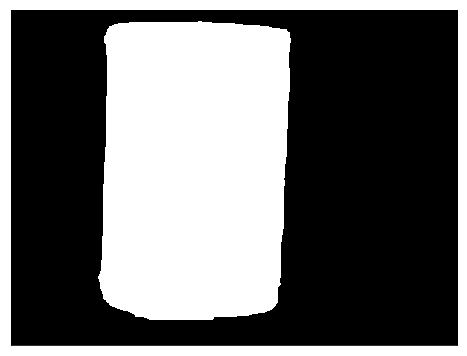

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_324.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_173.png


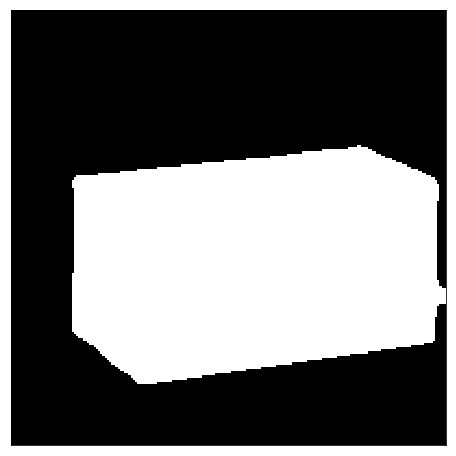

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_173.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_184.png


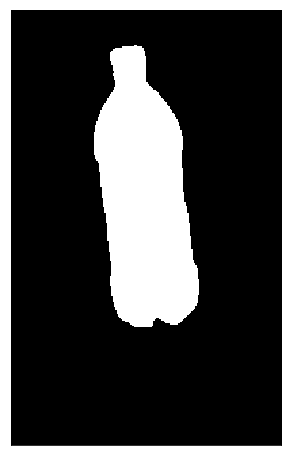

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_184.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_083.png


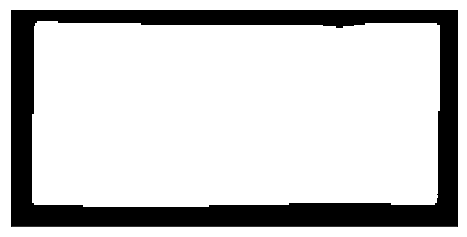

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_083.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_224.png


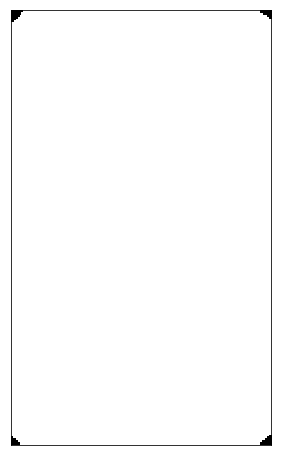

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_224.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_067.png


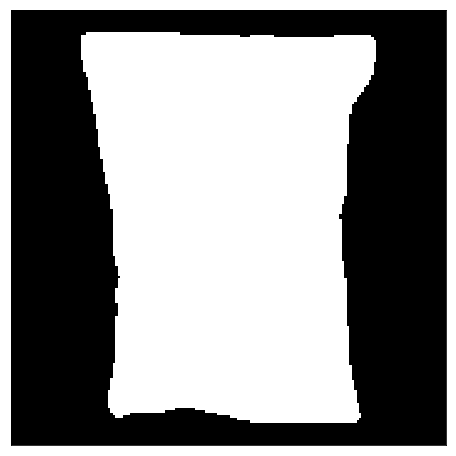

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_067.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_361.png


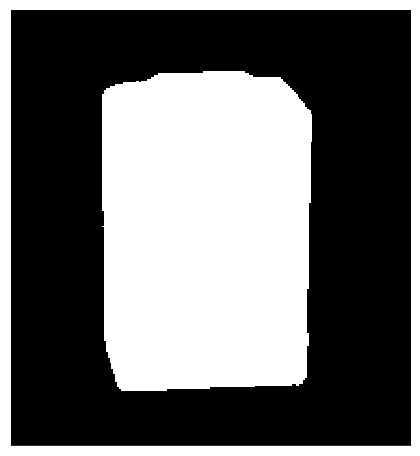

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_361.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_466.png


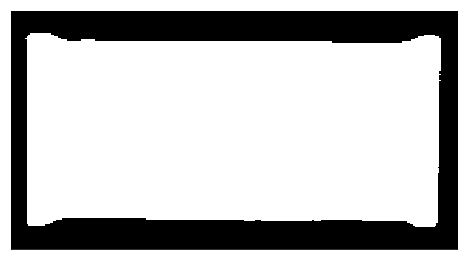

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_466.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_448.png


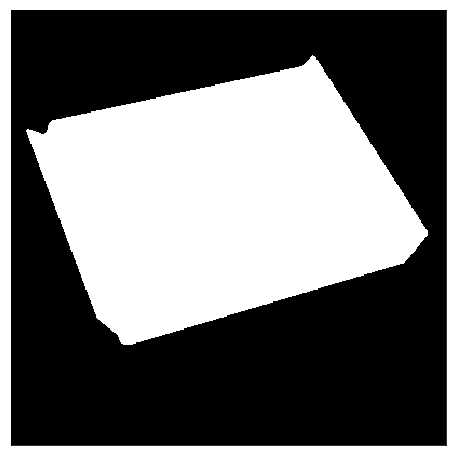

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_448.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_124.png


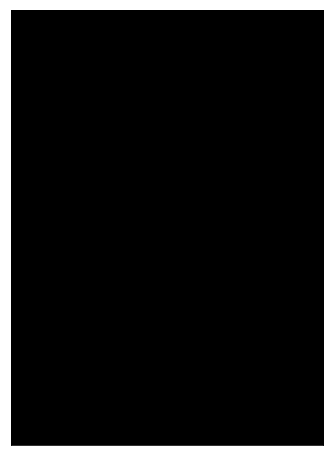

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_124.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_206.png


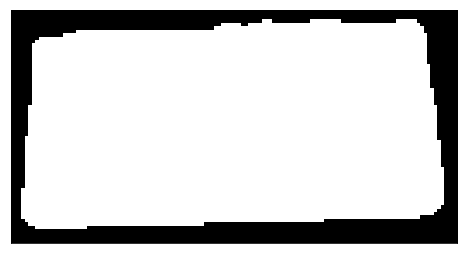

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_206.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_158.png


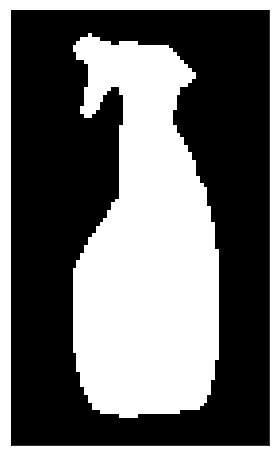

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_158.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_084.png


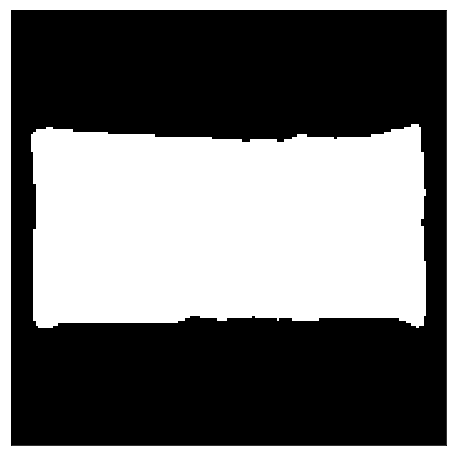

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_084.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_019.png


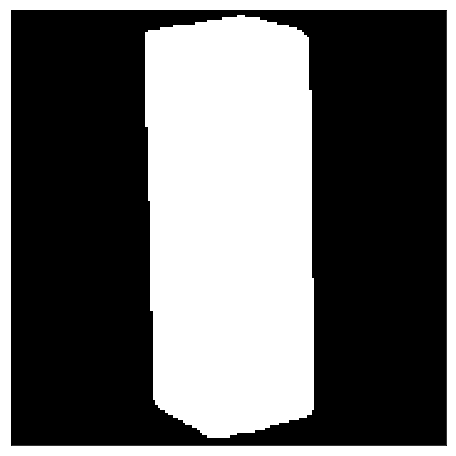

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_019.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_146.png


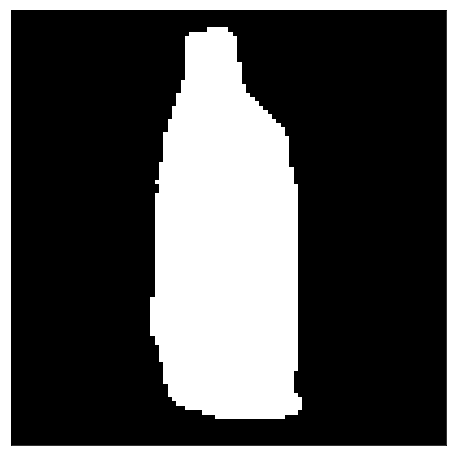

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_146.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_473.png


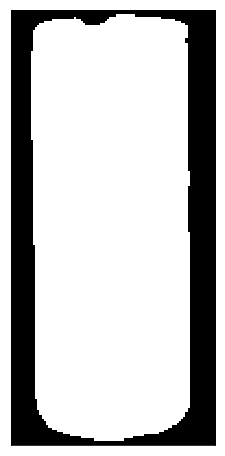

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_473.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_208.png


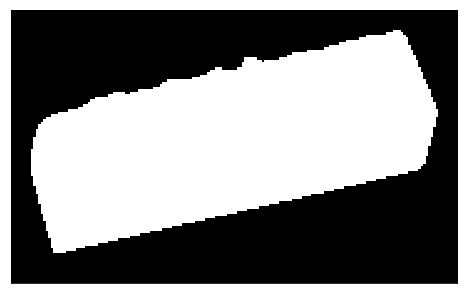

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_208.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_230.png


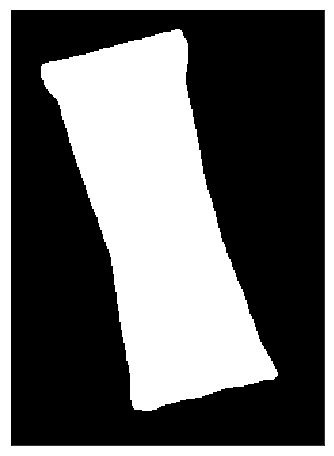

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_230.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_040.png


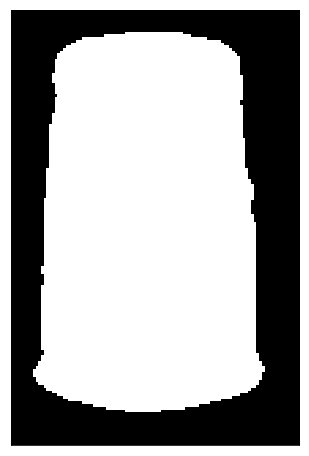

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_040.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_151.png


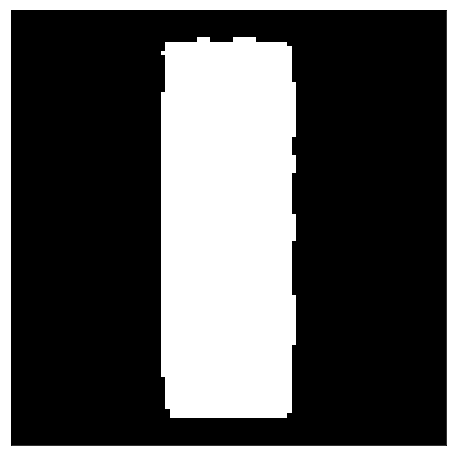

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_151.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_362.png


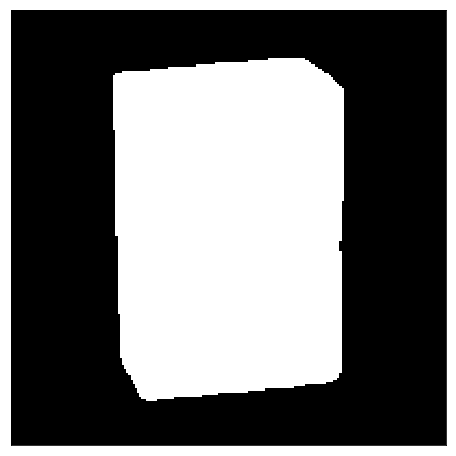

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_362.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_005.png


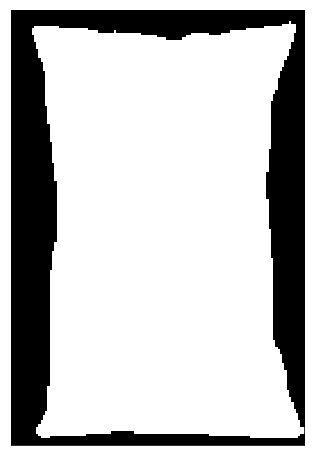

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_005.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_144.png


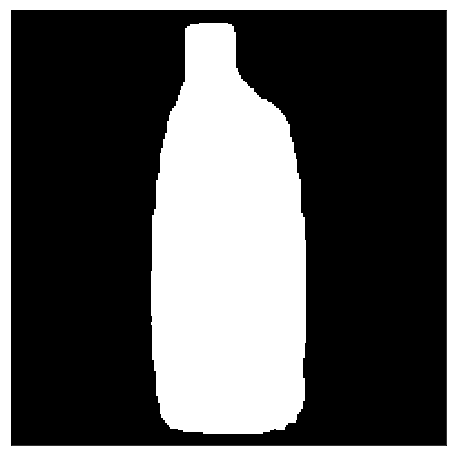

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_144.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_098.png


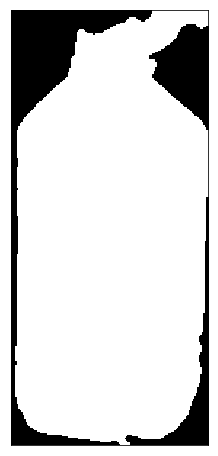

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_098.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_215.png


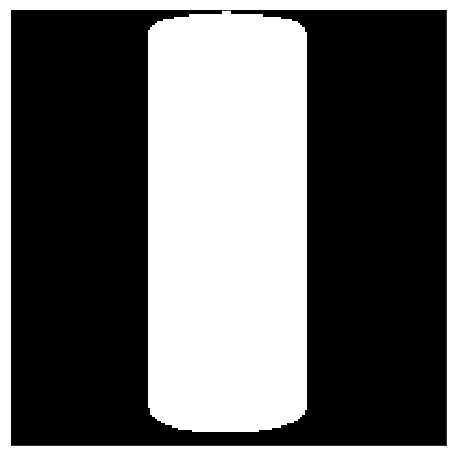

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_215.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_260.png


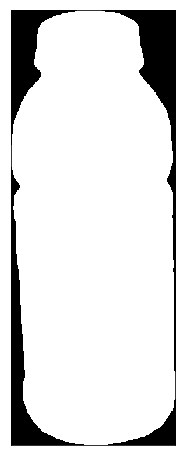

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_260.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_383.png


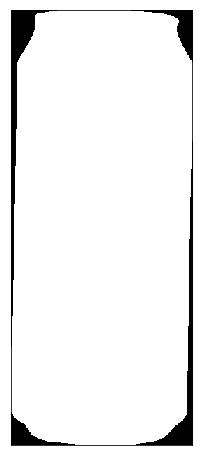

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_383.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_220.png


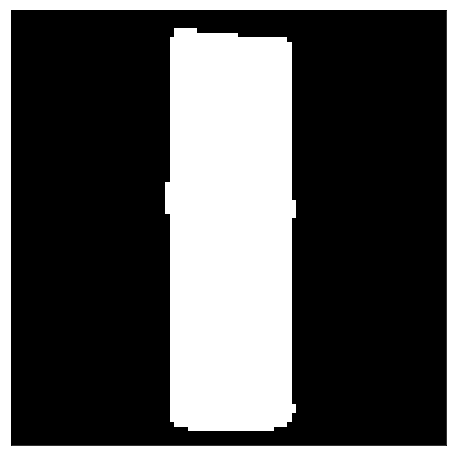

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_220.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_188.png


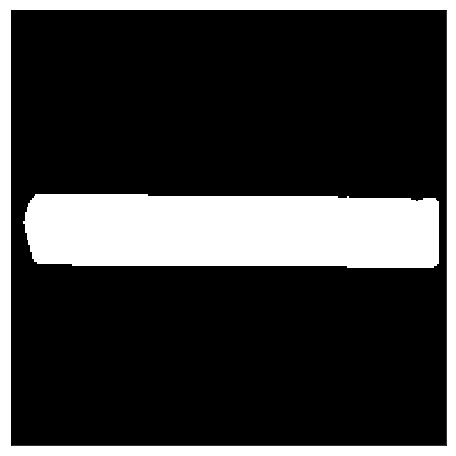

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_188.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_086.png


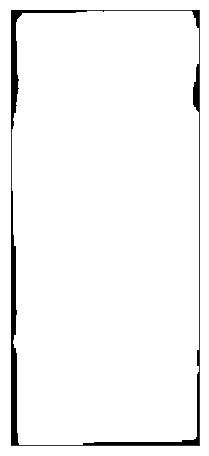

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_086.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_286.png


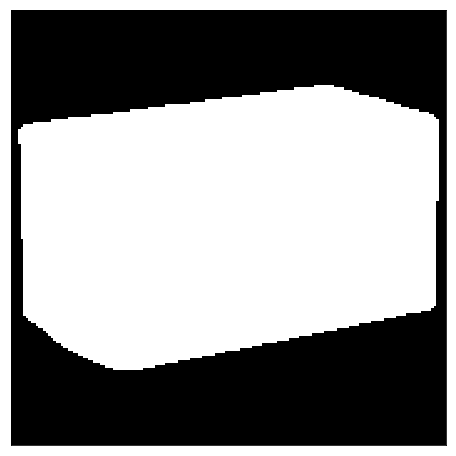

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_286.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_293.png


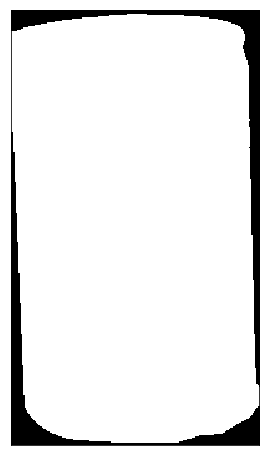

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_293.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_139.png


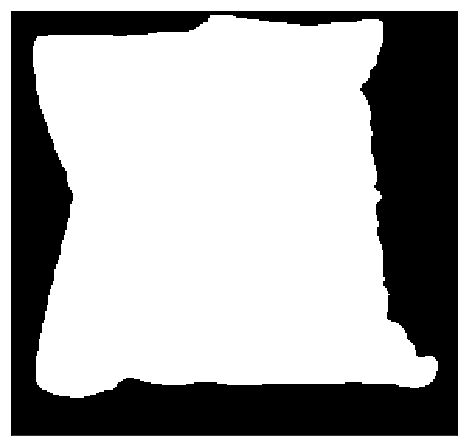

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_139.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_414.png


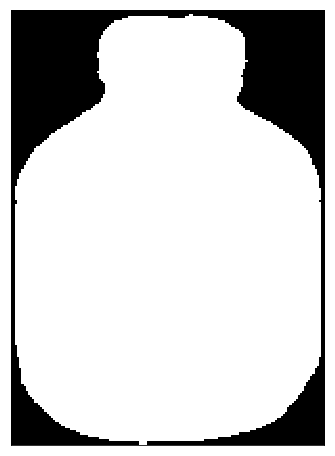

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_414.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_088.png


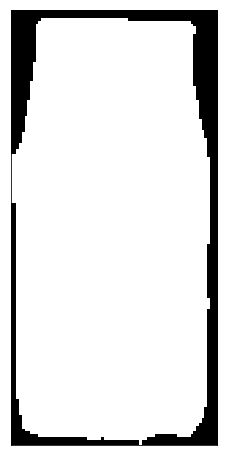

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_088.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_335.png


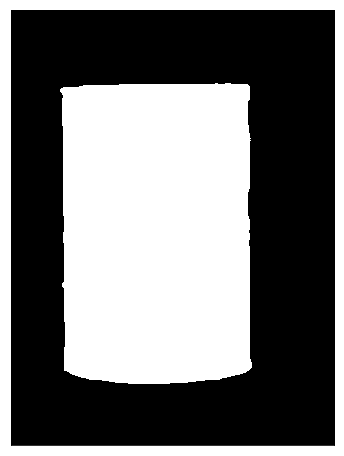

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_335.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_070.png


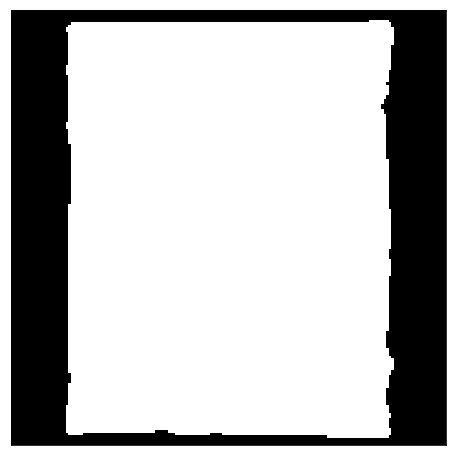

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_070.png
/home/inna/datasets/forgotten_items/grozi_png/grozi_310.png


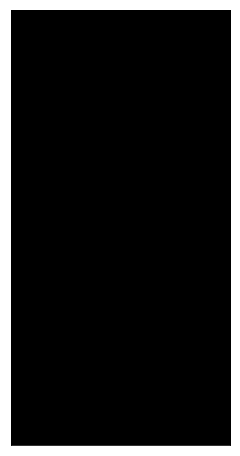

Saved /home/inna/datasets/forgotten_items/grozi_png_edit/grozi_310.png


In [59]:
kernel = np.ones((5,5),np.float32) / 25
for image_path in glob.glob(os.path.join(base_path, '*.png')):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    alpha = cv2.filter2D(image[:, :, 3], -1, kernel)
    alpha = (alpha > 120) * 255
    image[:, :, 3] = alpha
    print(image_path)
    show_image_plt(alpha)
    image = _cut_empty_transparent_border(image)
    save_path = os.path.join(base_path_new, os.path.basename(image_path))
    cv2.imwrite(save_path, image)
    print('Saved %s' % save_path)